In [24]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

##.........................

from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D

from keras import backend as K

from keras.utils import multi_gpu_model

##..................
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Multiply

#................
import tensorflow as tf

#................
from keras.utils.vis_utils import plot_model

#................
from keras.utils.vis_utils import plot_model

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [25]:
import numpy as np
from keras.preprocessing import image
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import  tensorflow as tf

from numpy.random import randn
from numpy.random import randint


# from libs.spectral_normalized_layers import Dense_SN,Conv2D_SN,Conv2DTranspose_SN

import sys

import numpy as np

## Attention Mechanism
from keras.layers import Layer,Concatenate
from keras.layers import Add
from keras import backend as K
from keras.engine import *
from keras.utils import multi_gpu_model
from keras import backend
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import AveragePooling2D

In [26]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Input

import numpy as np

In [27]:
import glob

In [28]:
def data_gen():
    
    trainA = "./dataset/train/source"
    
    trainB = "./dataset/train/target2"
    
    trainA_filenames=glob.glob(trainA+str("/*"))
    
#     print(trainA_filenames)
        
    for i in range(len(trainA_filenames)):
        
        trainA_filenames[i]=[trainA_filenames[i],str(trainB)+str('/')+str(trainA_filenames[i][23:])]
        
#     print(trainA_filenames)
        
    return trainA_filenames

In [29]:
import cv2

train_data_generator= data_gen()

In [30]:
def show_batch(image_batch, label_batch):
    image_batch = 0.5 *image_batch + 0.5  
    plt.figure(figsize=(30,30))
    for n in range(4):
        ax = plt.subplot(2,2,n+1)
        plt.imshow(image_batch[n,:,:],cmap="gray")
        
#         ax = plt.subplot(4,2,2*n+2)
#         plt.imshow(image_batch[n,:,256:])
        
#       plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

(512, 512)


255

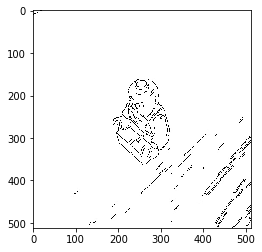

In [31]:
# print(len(train_data_generator))

G=plt.imread(train_data_generator[1][0])

plt.imshow(G[...,],cmap="gray")

print(G.shape)

np.max(G)

In [32]:
import math
import cv2

from operator import itemgetter
# select real samples
def generate_real_samples(train_data_gen, n_samples,size=64,patch_shape=16):
    # choose random instances
    
    ix = randint(0, len(train_data_gen), n_samples)
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:
            X=plt.imread(train_data_gen[i][0])
            
            print(X.shape)

            X=np.stack((X, X,X), axis=-1)
            
            print(X.shape)
                
            X_k=cv2.resize(X[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
#             X_k = np.expand_dims(X_k,axis=-1)
           
            
            Y=plt.imread(train_data_gen[i][1])
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            
            X_k=X_k/255
            
            Y_k=Y_k/255
            
            all_images.append(X_k)

            all_images_Y.append(Y_k)
            
            
        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
        
#         print(np.max(all_images))
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape*2, 72))
    return all_size_images, y

In [33]:
image_batch, label_batch = generate_real_samples(train_data_generator, 4,size=256)


# show_batch(image_batch[0][0], label_batch)

print(image_batch[0][0].shape)

print(np.max(image_batch[0][0]))

(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(512, 512)
(512, 512, 3)
(4, 64, 64, 3)
1.0


1.0


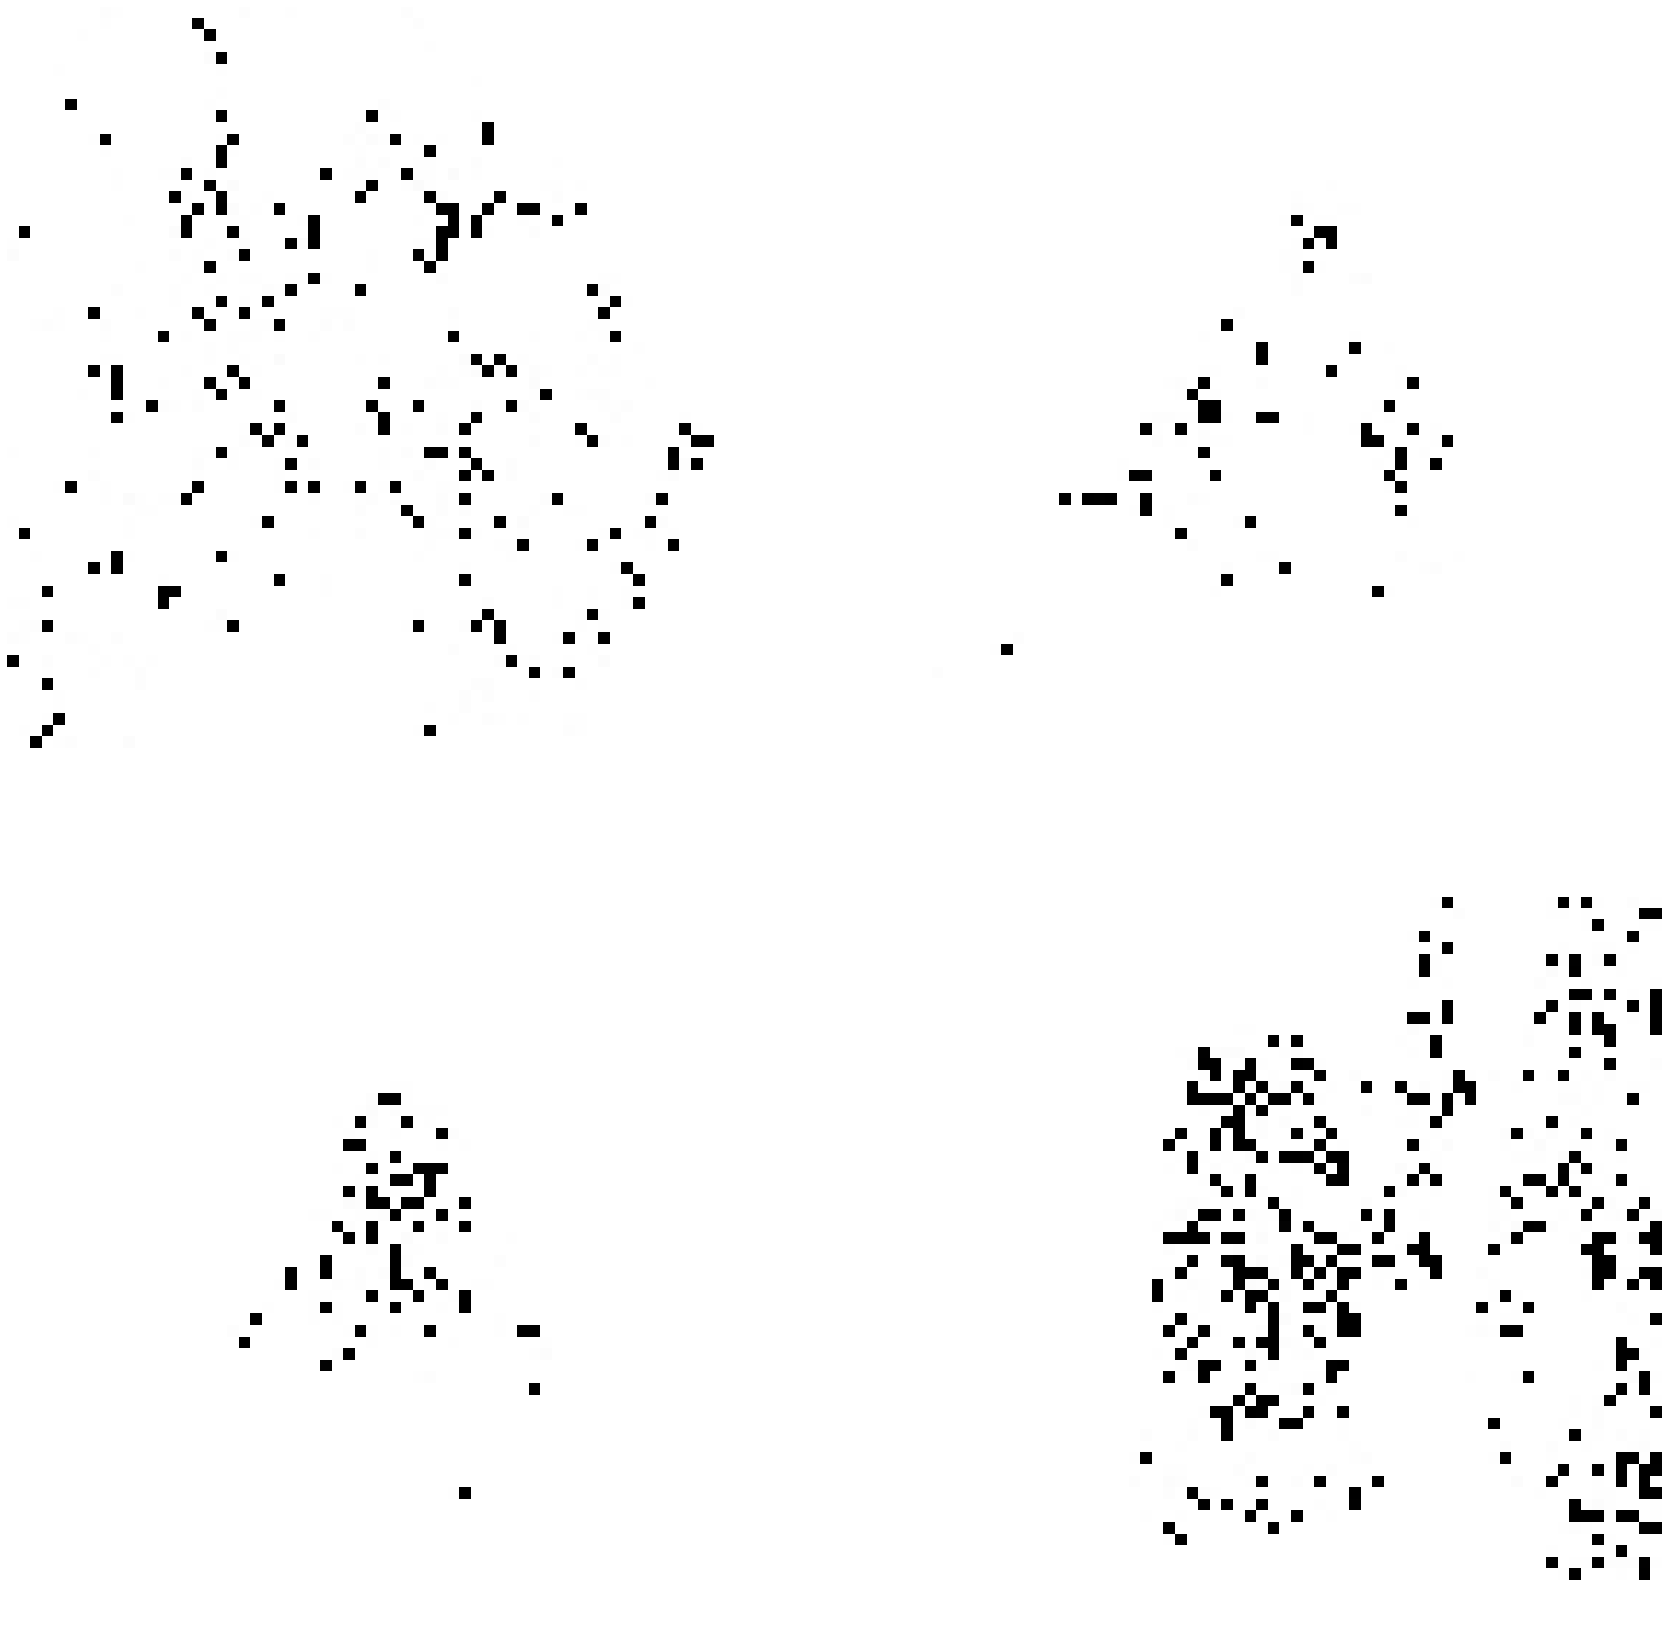

In [34]:
print(np.max(image_batch[0][0]))

show_batch(image_batch[0][0], label_batch)

1.0


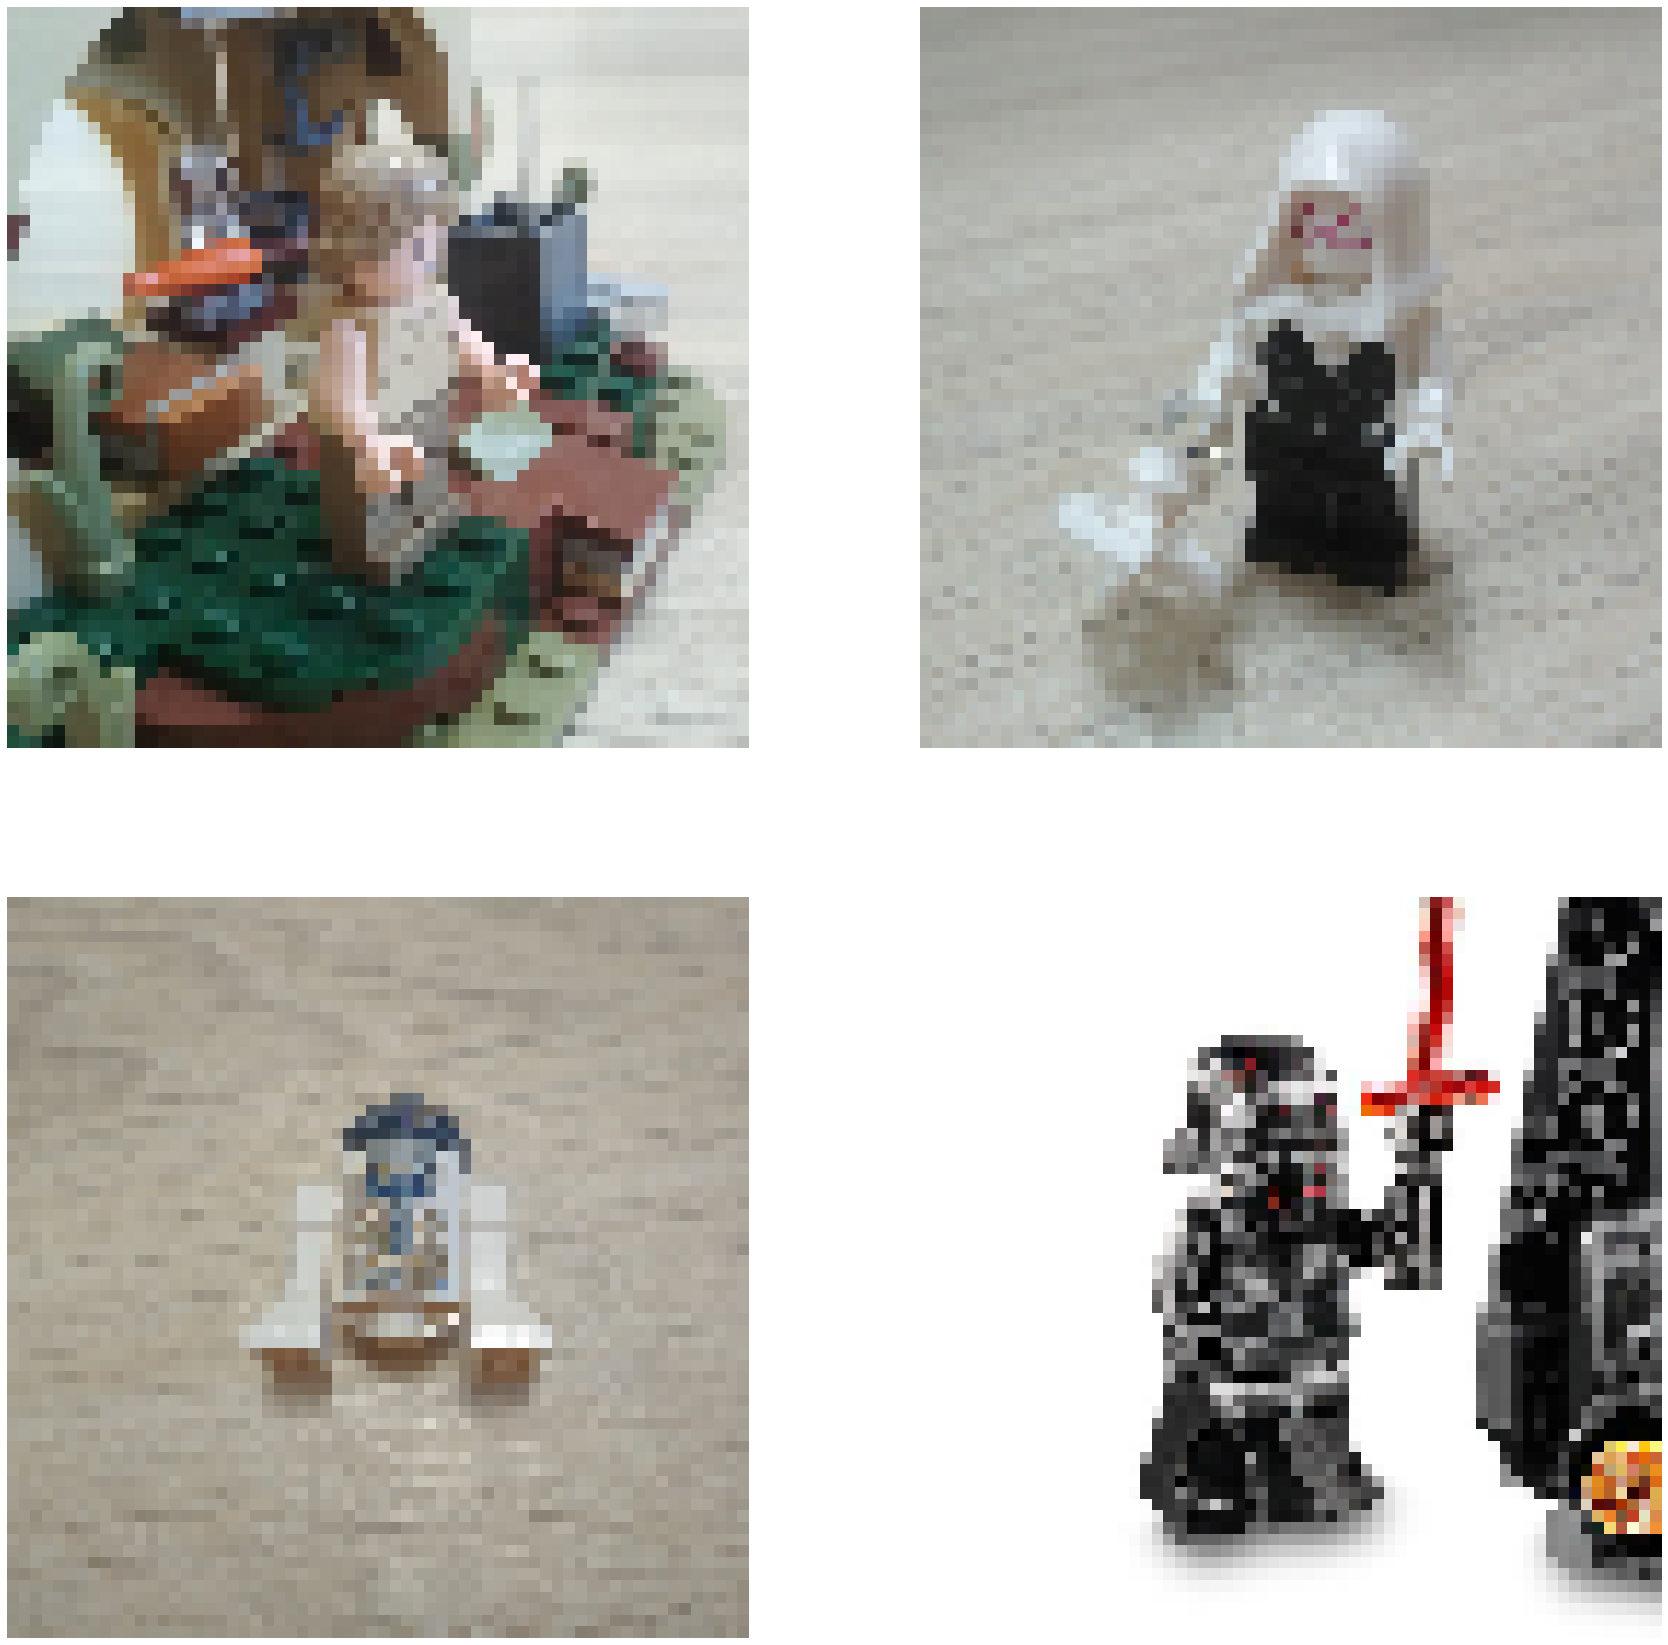

In [35]:
print(np.max(image_batch[0][1]))

show_batch(image_batch[0][1], label_batch)

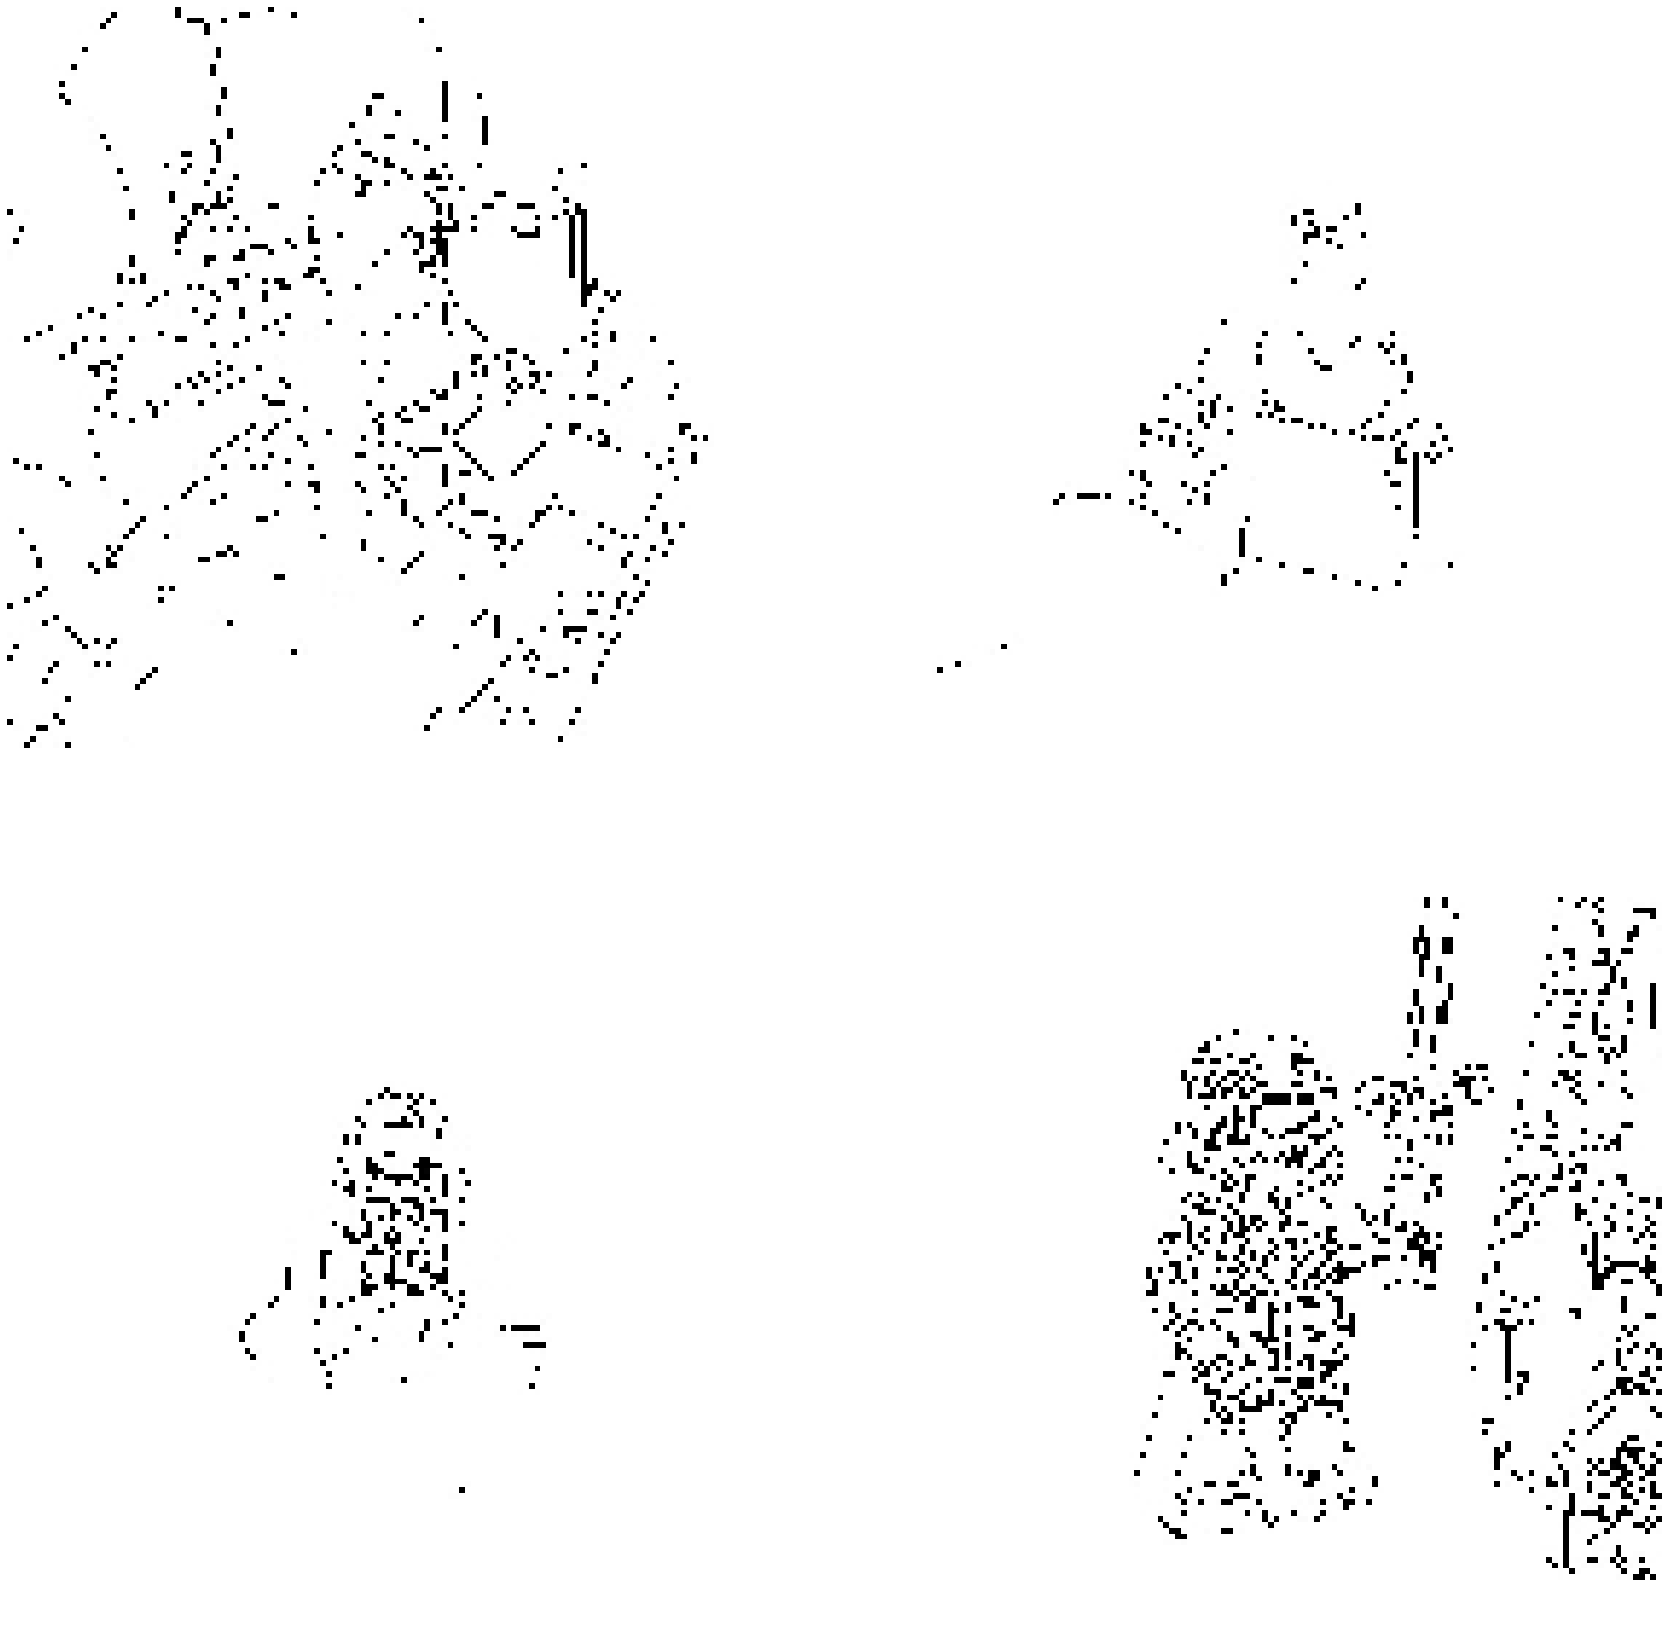

In [36]:
show_batch(image_batch[1][0], label_batch)

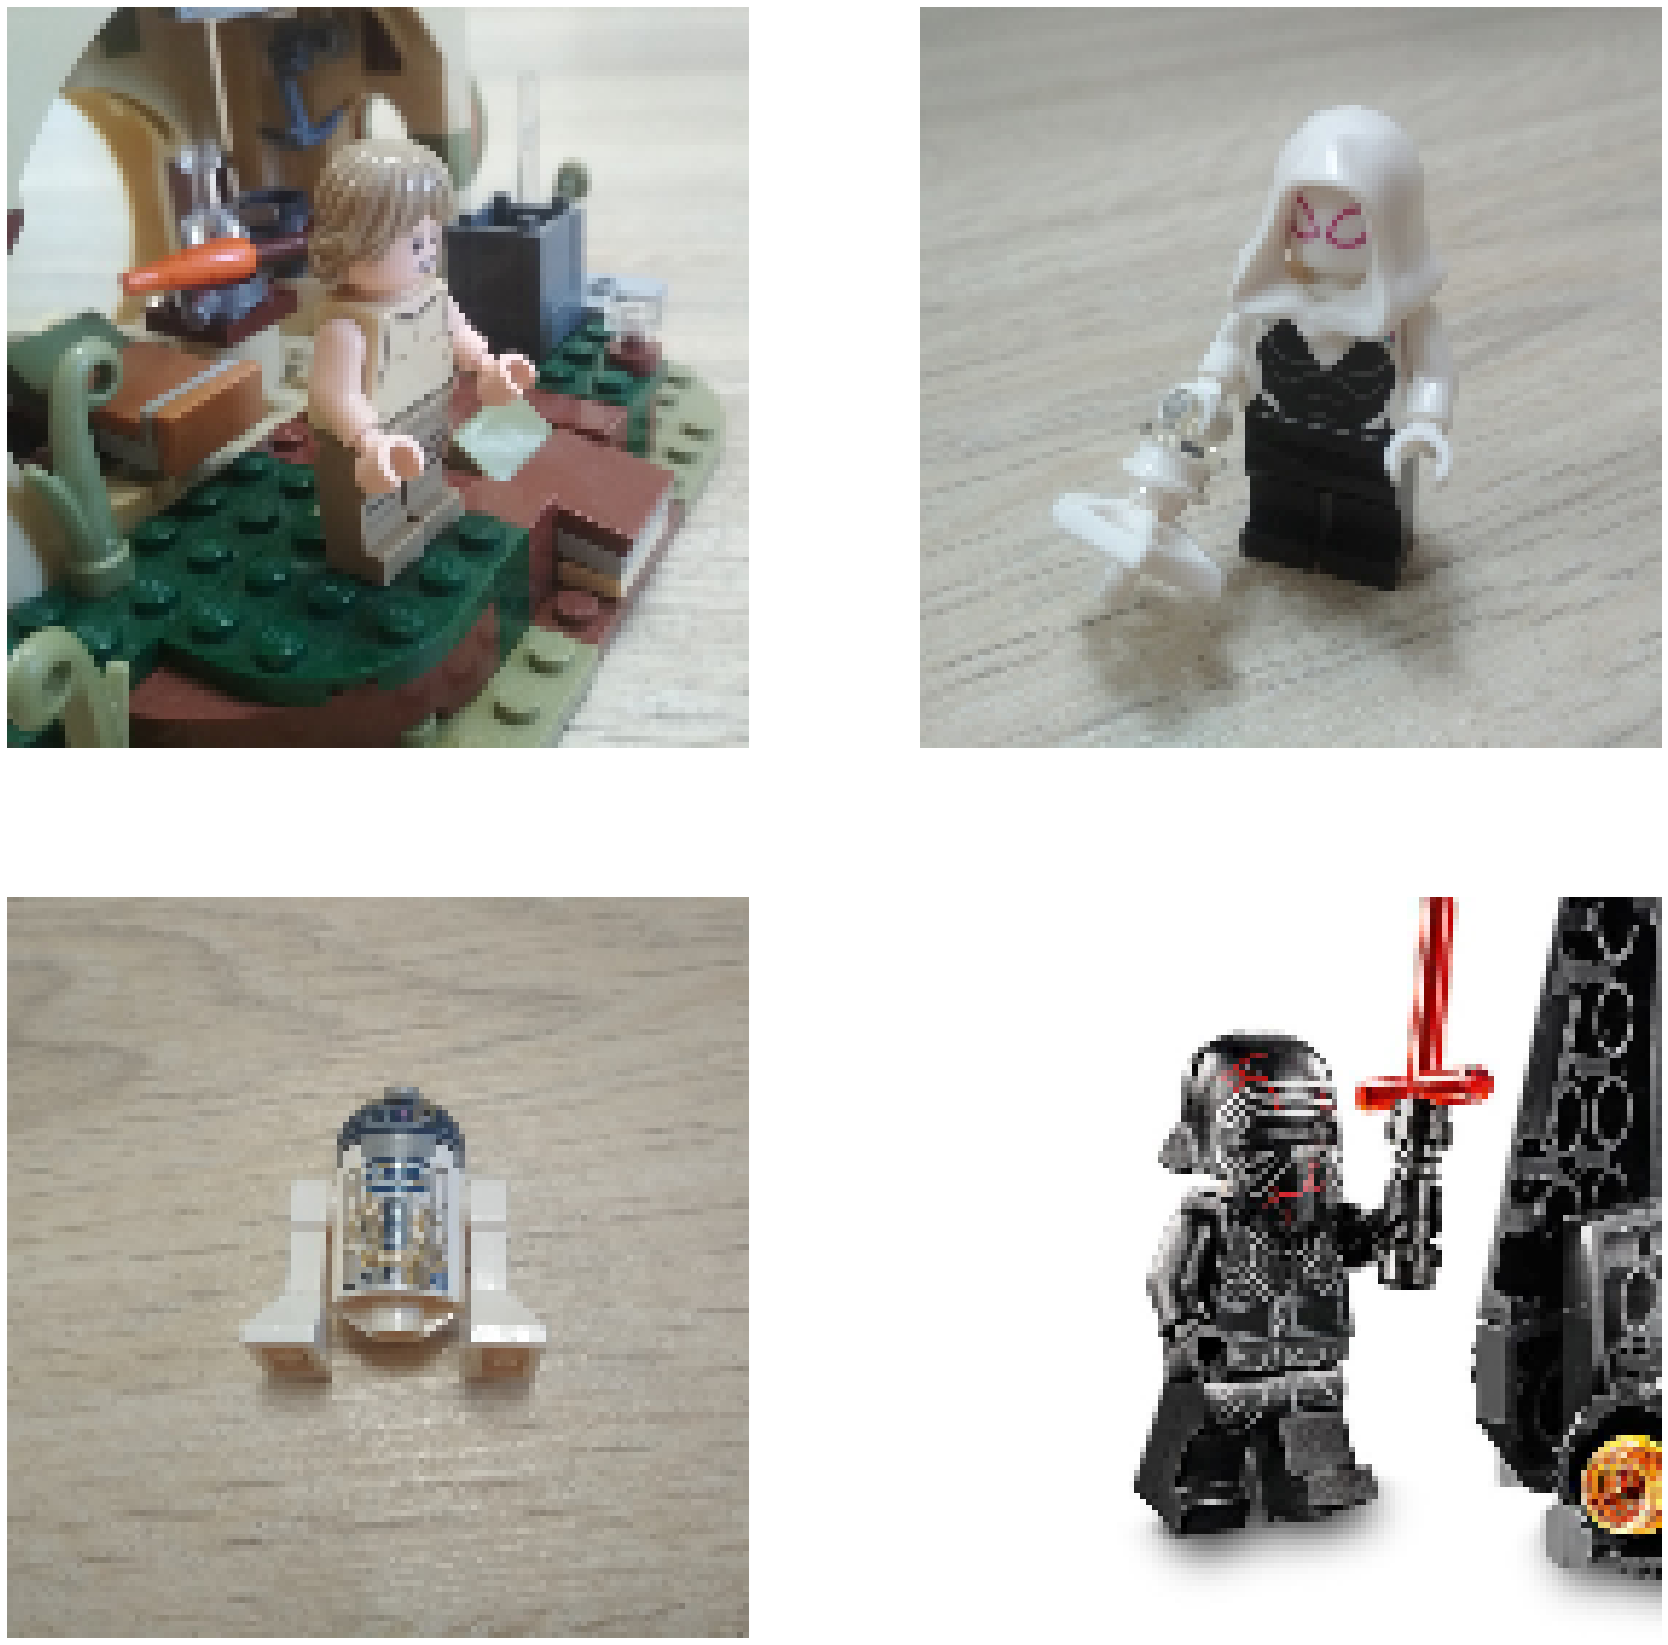

In [37]:
show_batch(image_batch[1][1], label_batch)

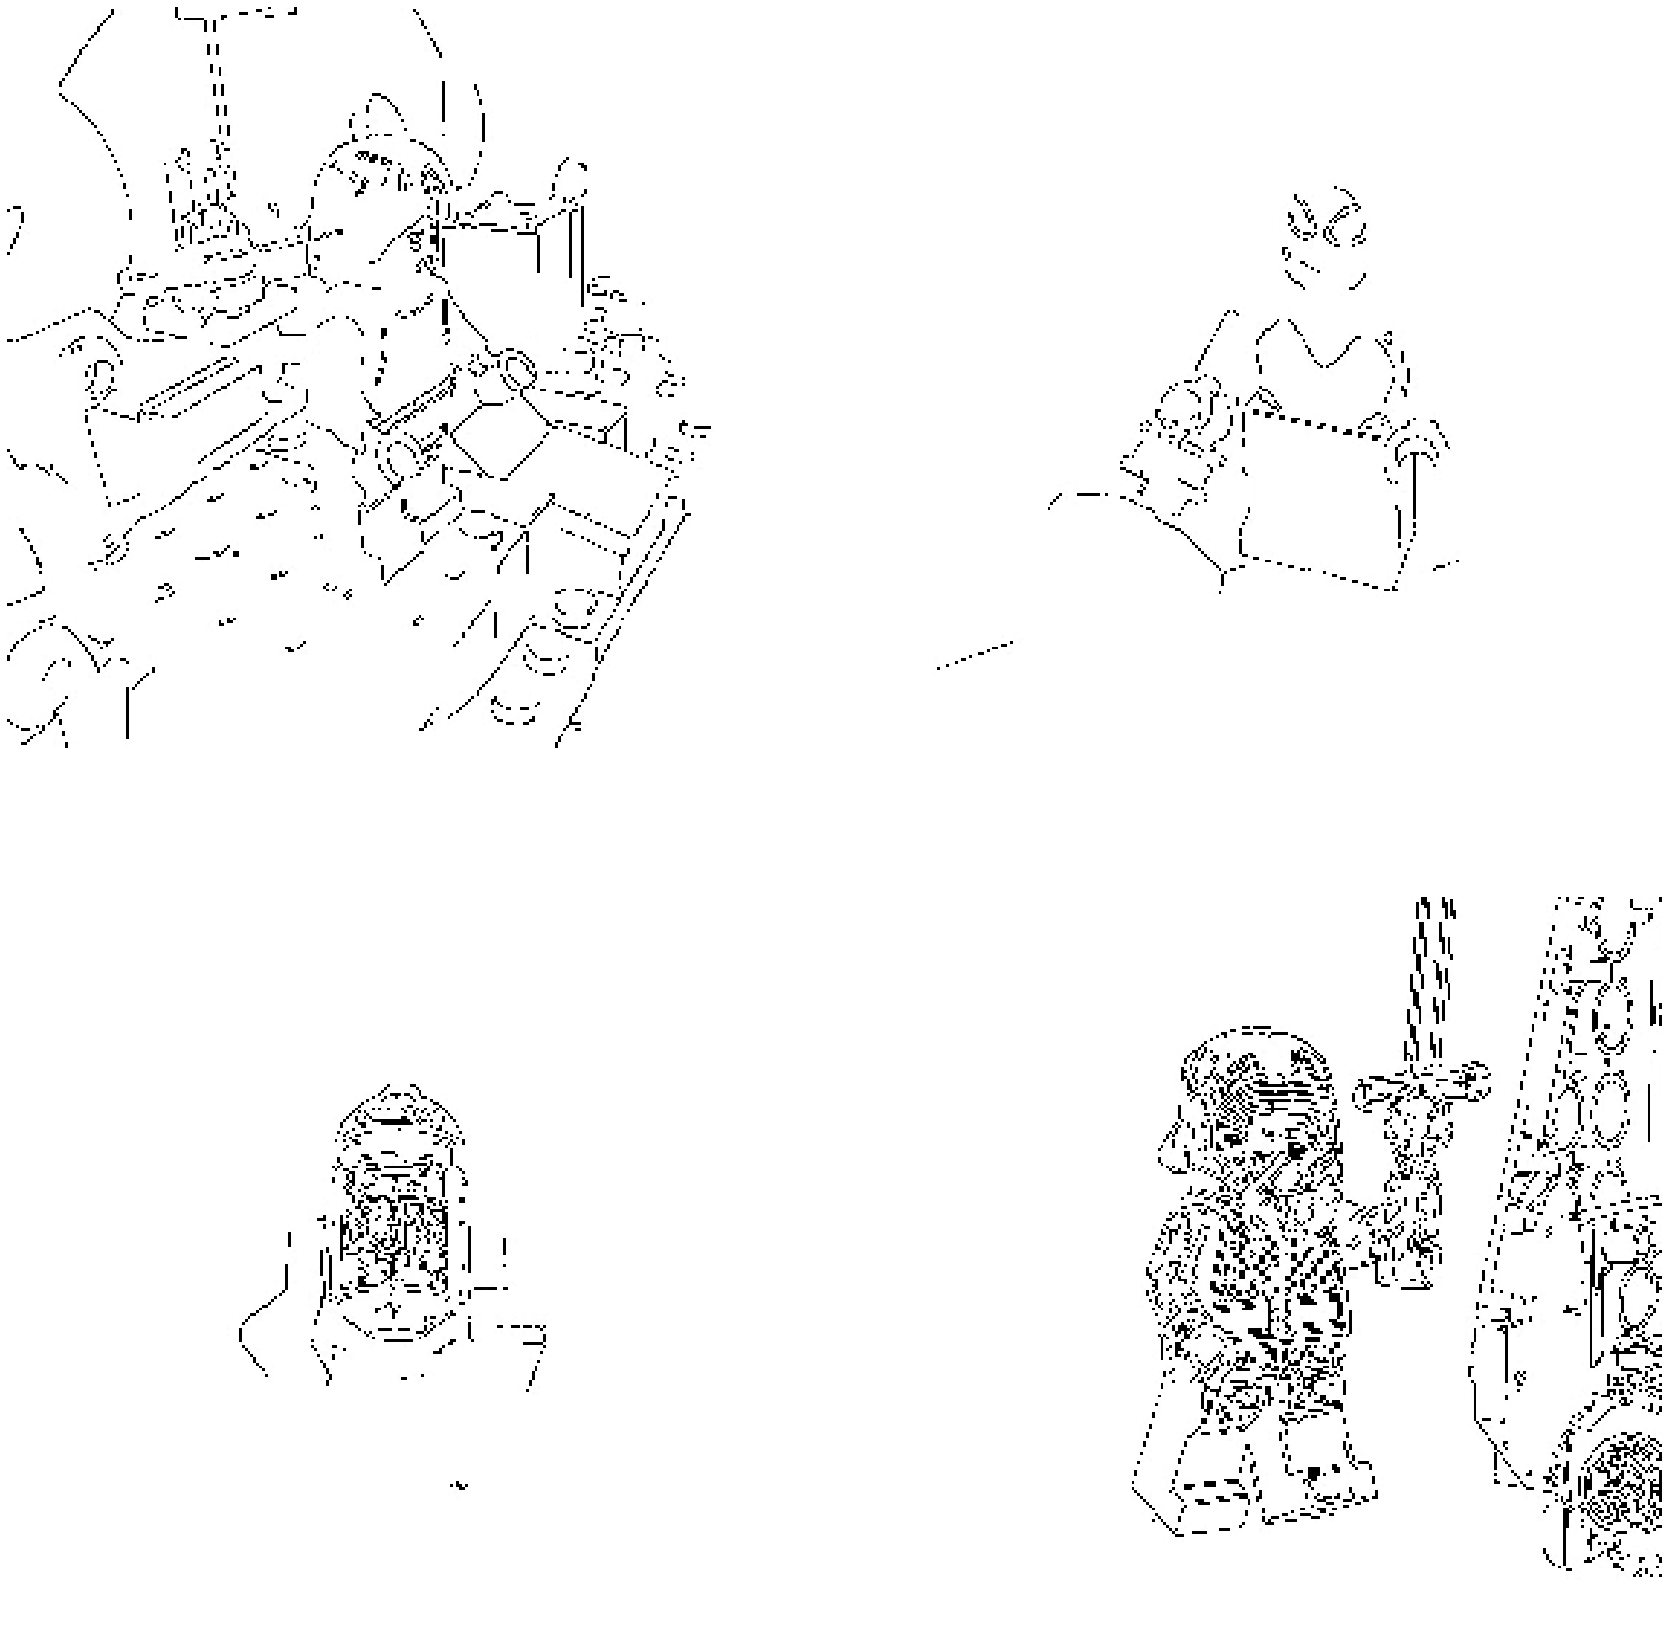

In [38]:
show_batch(image_batch[2][0], label_batch)

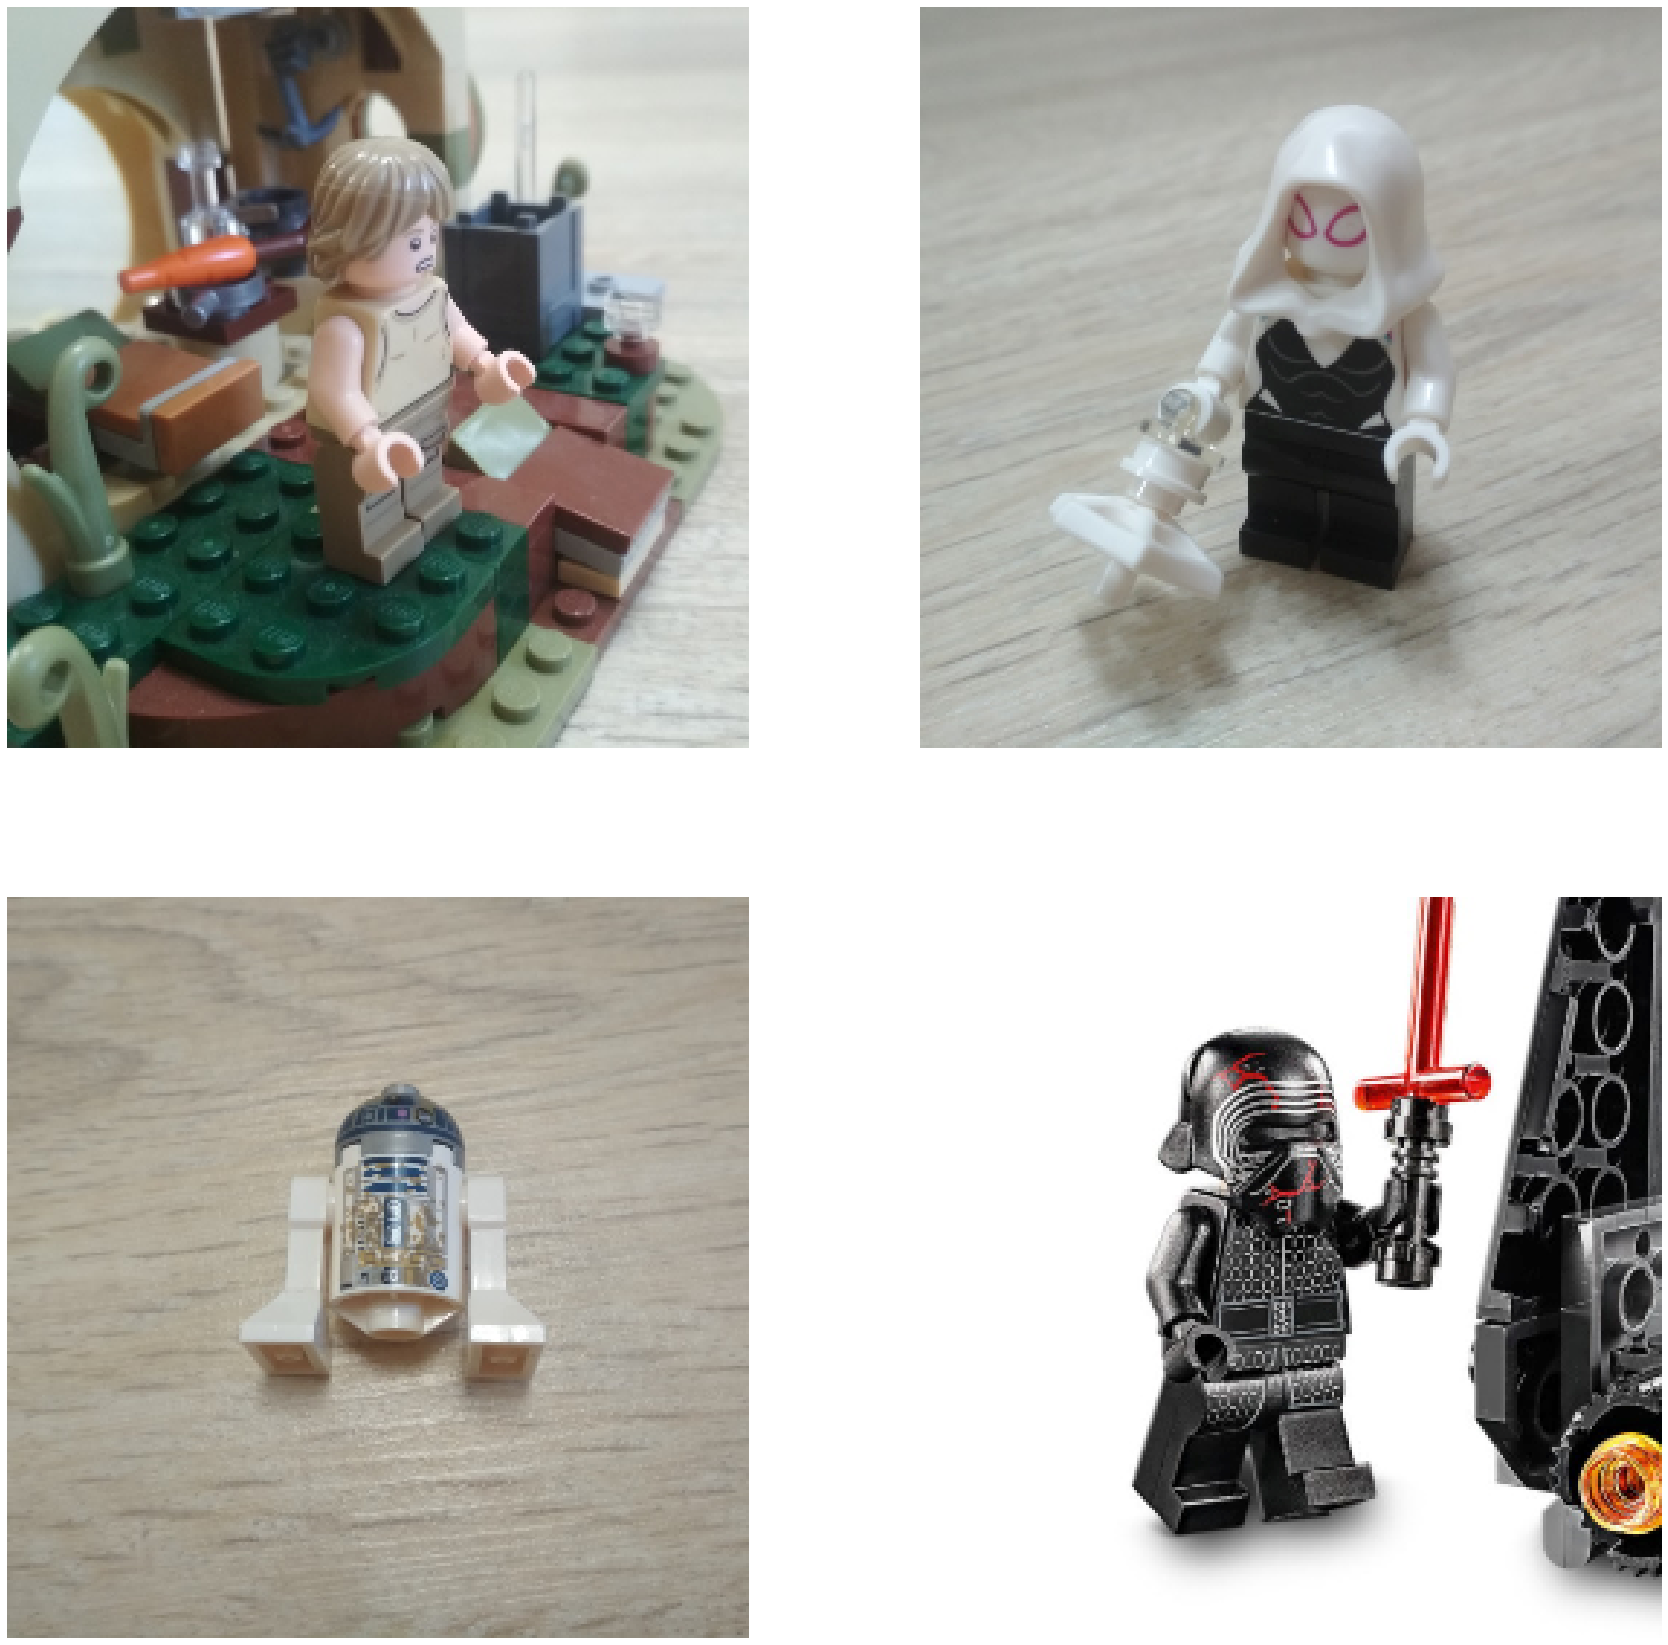

In [39]:
show_batch(image_batch[2][1], label_batch)

In [40]:
# disc.summary()

In [41]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=(image_shape,image_shape,3))
	# target image input
	in_target_image = Input(shape=(image_shape,image_shape,3))
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [42]:
discriminator=define_discriminator(image_shape=256)

discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256, 256, 6)  0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 128, 64) 6208        concatenate_7[0][0]        

In [43]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [44]:
g_model = define_generator(image_shape=(256,256,3))

g_model.summary()

# g_model=multi_gpu_model(model=g_model,gpus=8)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 128, 128, 64) 3136        input_4[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_12 (LeakyReLU)      (None, 128, 128, 64) 0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 128)  131200      leaky_re_lu_12[0][0]             
____________________________________________________________________________________________

In [45]:
# plot_model(g_model, show_shapes=True, show_layer_names=True,to_file="g_model_512.jpg")

In [46]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# define the source image
	in_src = Input(shape=(image_shape,image_shape,3))
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [47]:
gan_model = define_gan(g_model,discriminator,256)

In [48]:
# D_real_0.summary()

gan_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 256, 256, 3)  54429315    input_5[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 16, 16, 1)    6968257     input_5[0][0]                    
                                                                 model_2[1][0]                    
Total params: 61,397,572
Trainable params: 54,419,459
Non-trainable params: 6,978,113
__________________________________________________________________________________________________


In [49]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
    
# 	g_model_new= multi_gpu_model(g_model,gpus=8)
    
	# generate fake instance
	X = g_model.predict(samples)
# 	print(len(samples))    
	# create 'fake' class labels (0)
	y = zeros((len(samples), patch_shape, patch_shape,1))
	return X, y

In [50]:
import os
from matplotlib import image as mpimg

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
		# select a batch of real samples
	X_real_all , y_real = generate_real_samples(dataset, n_samples,  size=256,patch_shape=16)
        
##################################################################################


	X_real_64,X_real_128,X_real_256= tuple(X_real_all)
    



	X_realA_256,X_realB_256 = tuple(X_real_256)
	X_realA_128,X_realB_128 = tuple(X_real_128)
	X_realA_64,X_realB_64 = tuple(X_real_64)


	print(X_realA_256.shape)
	print(X_realB_256.shape)

    
    
# 	# generate a batch of fake samples
	X_fake, y_fake = generate_fake_samples(g_model ,X_realA_256,16)    
    
	X_fakeB_256=tuple(X_fake)     





    
	X_realA_256 = (X_realA_256 + 1) / 2.0
	X_realB_256 = (X_realB_256 + 1) / 2.0
	X_fakeB_256 = (X_fakeB_256 + 1) / 2.0
    

    
	path = "./images/epoch"+str(step+1)
    
	if not os.path.isdir(path+"/"):
		os.mkdir(path)
        
        
		mpimg.imsave(path+"/"+"X_realA_512_0.jpg",X_realA_256[0])
		mpimg.imsave(path+"/"+"X_realA_512_1.jpg",X_realA_256[1])
		mpimg.imsave(path+"/"+"X_realA_512_2.jpg",X_realA_256[2])
        
		mpimg.imsave(path+"/"+"X_realB_512_0.jpg",X_realB_256[0])
		mpimg.imsave(path+"/"+"X_realB_512_1.jpg",X_realB_256[1])
		mpimg.imsave(path+"/"+"X_realB_512_2.jpg",X_realB_256[2])
        
    
		mpimg.imsave(path+"/"+"X_fakeB_512_0.jpg",X_fakeB_256[0])
		mpimg.imsave(path+"/"+"X_fakeB_512_1.jpg",X_fakeB_256[1])
		mpimg.imsave(path+"/"+"X_fakeB_512_2.jpg",X_fakeB_256[2])
            
    
    
    
    

	# save the generator model
	filename2 = './weights/model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s ' %  (filename2))

In [51]:
def generate_real_samples_shuffled(train_data_gen, n_samples,members,size=64,patch_shape=16):
    # choose random instances
    
    ix = members
    
    no_of_layers=int(math.log(size)/math.log(2))
    
#     print(no_of_layers)

    all_size_images=[]

  
    for j in range(6,no_of_layers+1):
    
        all_images=[]
#         all_labels=[]
        all_images_Y=[]

        
        
        for i in ix:
            X=plt.imread(train_data_gen[i][0])
            
#             print(np.max(X))

            X=np.stack((X, X,X), axis=-1)
                
            X_k=cv2.resize(X[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
#             X_k=np.expand_dims(X_k, axis=-1)
            
            Y=plt.imread(train_data_gen[i][1])
            
            Y_k=cv2.resize(Y[...,:3], dsize=(2**(j), 2**j), interpolation=cv2.INTER_NEAREST)
            
            X_k=X_k/255
            Y_k=Y_k/255
            
            all_images.append(X_k)

            all_images_Y.append(Y_k)
        
        
        all_images= np.array(all_images)
        
        all_images_Y = np.array(all_images_Y)
    
    
        all_images=(all_images-0.5)*2
        
        all_images_Y=(all_images_Y-0.5)*(2)
        
#         print(all_images.shape)
        
        all_images = [all_images,all_images_Y]
    
        all_size_images.append(all_images)
#     X=X/255
    # generate class labels
    y = np.ones((n_samples,patch_shape,patch_shape, 1))
    return all_size_images, y

In [52]:
image_batch, label_batch = generate_real_samples_shuffled(train_data_generator, 4,[45,46,47,48],size=256)

print(np.max(image_batch[0][1]))

# show_batch(image_batch[0][0][], label_batch)

1.0


In [53]:
# summarize_performance(1, g_model, train_data_generator, n_samples=3)

In [54]:
# from openpyxl import Workbook

# import openpyxl

import random

generator=g_model


# discriminator_0.load_weights("./weapon1_discriminator_0.h5")
# discriminator_1.load_weights("./weapon1_discriminator_1.h5")
# discriminator_2.load_weights("./weapon1_discriminator_2.h5")
# discriminator_3.load_weights("./weapon1_discriminator_3.h5")
        
# generator.load_weights("./weapon1_gen_weights.h5")

print("ok")

# lists=[]

for i in range(0,100):
    
    cumulative_gloss=0
    random.shuffle(train_data_generator)
    
#     wb_obj = Workbook()
    
#     sheet = wb_obj.active
    
#     sheet.cell(row=i, column=j).value=
    for j in range(0,len(train_data_generator)):
        
        X_real_all, y_real = generate_real_samples_shuffled(train_data_generator, 1,[j],size=256,patch_shape=16)
        
        X_real_64,X_real_128,X_real_256= tuple(X_real_all)
        
        X_realA_256,X_realB_256 = tuple(X_real_256)
        
        print(X_realA_256.shape)
        print(X_realB_256.shape)
        
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA_256, 16)
        
        d_loss1 = discriminator.train_on_batch([X_realA_256, X_realB_256], y_real)
        
        d_loss2 = discriminator.train_on_batch([X_realA_256, X_fakeB], y_fake)
        
        g_loss, _, _ = gan_model.train_on_batch(X_realA_256, [y_real, X_realB_256])
        
        cumulative_gloss+=g_loss
        
        print(i,d_loss1,d_loss2,g_loss,"cumlative_loss",cumulative_gloss/(j+1))
        
    g_model.save_weights("./weights"+str(i+1)+".h5")
        
        
        


ok
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.29373833537101746 0.9814823269844055 30.25892448425293 cumlative_loss 30.25892448425293
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.5993837714195251 0.7055286169052124 33.615211486816406 cumlative_loss 31.937067985534668
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.35862821340560913 0.6412094235420227 36.49565505981445 cumlative_loss 33.456597010294594
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.48097410798072815 0.5089656710624695 40.00987243652344 cumlative_loss 35.09491586685181
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.46435025334358215 0.519014298915863 30.4025821685791 cumlative_loss 34.15644912719726
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.4440184533596039 0.47077998518943787 30.278026580810547 cumlative_loss 33.51004536946615
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.38488131761550903 0.37520891427993774 33.8458251953125 cumlative_loss 33.558013916015625
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.3917829096317291 0.3555406332015991 30.804340362548828 cumlative_loss 33.21

0 0.02525966987013817 0.4549335539340973 44.85337448120117 cumlative_loss 41.76668632391727
(1, 256, 256, 3)
(1, 256, 256, 3)
0 1.4156074523925781 0.4280422627925873 53.02458953857422 cumlative_loss 41.93471473010618
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.3653438091278076 0.3383654057979584 55.009742736816406 cumlative_loss 42.12699455373428
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.37441423535346985 0.1877550333738327 21.878259658813477 cumlative_loss 41.83353462772093
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.1340065896511078 0.13347266614437103 40.61947250366211 cumlative_loss 41.816190883091515
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.06721881031990051 0.10972602665424347 30.903409957885742 cumlative_loss 41.662489743299886
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.06735648214817047 0.03150276839733124 54.778953552246094 cumlative_loss 41.84466285175748
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.16262267529964447 0.2830006778240204 41.82426071166992 cumlative_loss 41.84438337038641
(1, 256, 256, 3)
(1,

0 1.0651763677597046 0.838697075843811 11.394613265991211 cumlative_loss 40.348368557354874
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.07217315584421158 0.537861168384552 49.40587615966797 cumlative_loss 40.41698603919058
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.8586840033531189 0.14757204055786133 22.468326568603516 cumlative_loss 40.28203371234406
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.047632716596126556 0.269352525472641 35.909332275390625 cumlative_loss 40.24940161206829
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.09692864120006561 0.05428355932235718 31.296720504760742 cumlative_loss 40.183085455717865
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.5699787139892578 0.05420709773898125 12.754297256469727 cumlative_loss 39.981403189546924
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.0478275902569294 0.08054140210151672 46.16202163696289 cumlative_loss 40.02651719281273
(1, 256, 256, 3)
(1, 256, 256, 3)
0 0.05326579138636589 0.057815827429294586 13.327397346496582 cumlative_loss 39.83304530986841
(1, 256, 256, 3)


1 0.0121868085116148 0.07254063338041306 49.685787200927734 cumlative_loss 32.65921378135681
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.09831035137176514 0.03130095824599266 9.144278526306152 cumlative_loss 31.718616371154784
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.0035800719633698463 0.008155198767781258 53.88534164428711 cumlative_loss 32.57118272781372
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.007915882393717766 0.008780734613537788 44.50675582885742 cumlative_loss 33.01324099081534
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.026035353541374207 0.03456024453043938 12.812214851379395 cumlative_loss 32.29177577154977
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.009662942960858345 0.048188965767621994 58.685237884521484 cumlative_loss 33.20189515475569
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.051397521048784256 0.008740412071347237 12.534932136535645 cumlative_loss 32.51299638748169
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.015281464904546738 0.009236141107976437 12.756104469299316 cumlative_loss 31.875677293346776


1 0.021773353219032288 0.005461310967803001 16.090848922729492 cumlative_loss 35.42910287621316
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.005658493377268314 0.00639659259468317 64.4813232421875 cumlative_loss 35.751905324723985
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.0788196250796318 0.007945780642330647 26.039403915405273 cumlative_loss 35.645174540006195
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.032806407660245895 0.009814349934458733 20.01278305053711 cumlative_loss 35.47525724120762
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.009671415202319622 0.029433347284793854 42.746376037597656 cumlative_loss 35.553441314287085
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.003751455107703805 0.10814578086137772 45.33114242553711 cumlative_loss 35.65745941121528
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.035323940217494965 0.007025622297078371 14.853055000305176 cumlative_loss 35.43846568057412
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.04611838608980179 0.011752534657716751 12.561261177062988 cumlative_loss 35.20016146699587


(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.003988069482147694 0.0028640972450375557 56.72803497314453 cumlative_loss 37.158362937129404
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.0059878029860556126 0.00759941665455699 36.726768493652344 cumlative_loss 37.15556037580812
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.002787948353216052 0.023399891331791878 54.669551849365234 cumlative_loss 37.26855386918591
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.004372222349047661 0.003662592265754938 43.123329162597656 cumlative_loss 37.306084480041115
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.005849692039191723 0.0019767112098634243 43.7137451171875 cumlative_loss 37.34689760511848
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.0031905469950288534 0.002668687142431736 86.18773651123047 cumlative_loss 37.65601683870147
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.011265954934060574 0.004307787399739027 44.3289909362793 cumlative_loss 37.69798522925227
(1, 256, 256, 3)
(1, 256, 256, 3)
1 0.004125387407839298 0.002322403946891427 49.8695869445

2 0.004114345647394657 0.005931817460805178 74.5096206665039 cumlative_loss 39.390074491500854
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.0020293407142162323 0.016060076653957367 40.041934967041016 cumlative_loss 39.404560279846194
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.005283895879983902 0.0024895716924220324 25.08753204345703 cumlative_loss 39.093320535576865
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.0008591701043769717 0.002328565577045083 54.481632232666016 cumlative_loss 39.42073142274897
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.002371903508901596 0.00239498820155859 56.06044387817383 cumlative_loss 39.767392098903656
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.0032933764159679413 0.0031088190153241158 19.824817657470703 cumlative_loss 39.36040078377237
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.0005999369896017015 0.0031099992338567972 60.221519470214844 cumlative_loss 39.77762315750122
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.011332497000694275 0.004746431950479746 20.145986557006836 cumlative_loss 39.392

2 0.01627301797270775 0.014630724675953388 56.082054138183594 cumlative_loss 38.996411350038315
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.24317079782485962 0.04758221283555031 23.775665283203125 cumlative_loss 38.856771477865514
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.014154266566038132 0.07306960225105286 18.167081832885742 cumlative_loss 38.66868339018388
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.004672253970056772 0.03242093697190285 33.643924713134766 cumlative_loss 38.62341529399425
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.028804931789636612 0.0064300065860152245 9.730489730834961 cumlative_loss 38.36544274432318
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.03986654058098793 0.01176725048571825 65.29918670654297 cumlative_loss 38.60379446080301
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.01306399330496788 0.003472169628366828 63.519859313964844 cumlative_loss 38.82235643319916
(1, 256, 256, 3)
(1, 256, 256, 3)
2 0.044571489095687866 0.003742885310202837 13.184706687927246 cumlative_loss 38.59942034845767
(

2 0.0032377380412071943 0.0020813089795410633 53.62117004394531 cumlative_loss 37.31038042001946
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.006733515299856663 0.0013824895722791553 11.562480926513672 cumlative_loss 11.562480926513672
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0024083342868834734 0.004256047774106264 50.898414611816406 cumlative_loss 31.23044776916504
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.004603285808116198 0.0016725538298487663 12.459456443786621 cumlative_loss 24.973450660705566
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.004246662836521864 0.004328333772718906 39.81504821777344 cumlative_loss 28.683850049972534
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.01922476664185524 0.0016465079970657825 19.755849838256836 cumlative_loss 26.898250007629393
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0024736819323152304 0.005239393562078476 35.29060745239258 cumlative_loss 28.29697624842326
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.001481591840274632 0.004421664867550135 37.59707260131836 cumlative_loss 29.625

3 0.006137097254395485 0.0029803793877363205 25.469635009765625 cumlative_loss 35.31727899610996
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.004567378666251898 0.00181023427285254 26.540342330932617 cumlative_loss 35.18224920126108
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0013240356929600239 0.0014636630658060312 32.198463439941406 cumlative_loss 35.13704032608957
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0022384184412658215 0.0014563050353899598 45.17591094970703 cumlative_loss 35.28687421599431
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.020047757774591446 0.001421214547008276 15.6605806350708 cumlative_loss 34.998252251568964
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0014309481484815478 0.0020694436971098185 31.380733489990234 cumlative_loss 34.94582444343014
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.003191650379449129 0.0014252380933612585 46.6081657409668 cumlative_loss 35.11242931910923
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.00796494074165821 0.0023965355940163136 27.762474060058594 cumlative_loss 35.008908

3 0.0024631237611174583 0.0021176955197006464 28.312408447265625 cumlative_loss 35.33317665040024
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0029645408503711224 0.002102233935147524 18.981966018676758 cumlative_loss 35.2054328173399
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.002356945537030697 0.004375053104013205 37.52200698852539 cumlative_loss 35.22339075665141
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0024461138527840376 0.0024535246193408966 43.1915397644043 cumlative_loss 35.2846842105572
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0014166347682476044 0.001879559364169836 50.07810974121094 cumlative_loss 35.39761112300494
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.01144474744796753 0.0020072762854397297 11.049127578735352 cumlative_loss 35.213152914336234
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.005047299433499575 0.003351894672960043 57.96743392944336 cumlative_loss 35.384237733998695
(1, 256, 256, 3)
(1, 256, 256, 3)
3 0.0009572263807058334 0.00290296645835042 41.901180267333984 cumlative_loss 35.43287163

(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.00393695617094636 0.0014978331746533513 11.280437469482422 cumlative_loss 33.94373542384098
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0005967844626866281 0.0017966881860047579 37.07949447631836 cumlative_loss 34.10052337646484
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0024284652899950743 0.001693332102149725 38.33518600463867 cumlative_loss 34.302173977806454
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0013256811071187258 0.001342225819826126 28.63530731201172 cumlative_loss 34.04458912936124
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0006700070225633681 0.0016848099185153842 30.38341522216797 cumlative_loss 33.885407655135445
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0008808610145933926 0.0017269384115934372 36.707584381103516 cumlative_loss 34.00299835205078
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0004942765226587653 0.0014342301292344928 33.38761901855469 cumlative_loss 33.978383178710935
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.000886610709130764 0.002258197870105505 29.6

4 0.002043310087174177 0.0012405742891132832 22.294918060302734 cumlative_loss 33.23522320712905
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0017491206526756287 0.0027848100289702415 34.81829833984375 cumlative_loss 33.25406933966137
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0038732714019715786 0.0007947778794914484 16.0926456451416 cumlative_loss 33.052170237372906
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0011193078244104981 0.0011232889955863357 36.8345947265625 cumlative_loss 33.09615191747976
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0012856355169788003 0.0008520981064066291 10.345104217529297 cumlative_loss 32.83464562207803
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.001007218030281365 0.0012775263749063015 30.247989654541016 cumlative_loss 32.80525180426511
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0007051462889648974 0.0017520219553261995 31.455751419067383 cumlative_loss 32.79008887858873
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0005961568676866591 0.0012024471070617437 11.196990966796875 cumlative_loss 32

4 0.0012568433303385973 0.0020545381121337414 37.45790481567383 cumlative_loss 33.281302386767244
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.002675167750567198 0.0009856383549049497 27.09680938720703 cumlative_loss 33.23923100581786
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0007151686004363 0.0016491292044520378 40.513877868652344 cumlative_loss 33.28838402516133
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.0007848317618481815 0.002303343964740634 33.62777328491211 cumlative_loss 33.290661805428115
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.005231130868196487 0.0019076624885201454 23.005006790161133 cumlative_loss 33.222090771993
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.009264116175472736 0.0038059265352785587 36.566162109375 cumlative_loss 33.244236939790234
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.00040928926318883896 0.0020698863081634045 43.13909149169922 cumlative_loss 33.309334667105425
(1, 256, 256, 3)
(1, 256, 256, 3)
4 0.000950002926401794 0.0015245170798152685 34.450870513916016 cumlative_loss 33.31679

5 0.44031208753585815 1.6544585227966309 36.889305114746094 cumlative_loss 30.69761283774125
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.14514675736427307 0.011029654182493687 15.733431816101074 cumlative_loss 30.313915888468426
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.06626277416944504 0.04477672651410103 23.179807662963867 cumlative_loss 30.13556318283081
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.024406617507338524 0.03733092546463013 12.852993965148926 cumlative_loss 29.714037104350766
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.010873773135244846 0.02827298454940319 30.680910110473633 cumlative_loss 29.73705789021083
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.012607703916728497 0.01855725795030594 41.99271774291992 cumlative_loss 30.02207323562267
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.02363438531756401 0.001486552762798965 18.684036254882812 cumlative_loss 29.764390576969493
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.006856122985482216 0.0019203933188691735 18.410175323486328 cumlative_loss 29.512074682447647


5 0.0017260077875107527 0.004722921177744865 38.483882904052734 cumlative_loss 33.218158379341794
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0034265061840415 0.0013146407436579466 27.551435470581055 cumlative_loss 33.16367065906525
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0018579314928501844 0.0079301493242383 34.58088684082031 cumlative_loss 33.177167956034346
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0023204991593956947 0.0038289513904601336 29.320781707763672 cumlative_loss 33.140786953692164
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.005857981741428375 0.0008710093097761273 70.19649505615234 cumlative_loss 33.48710198268712
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.002341276267543435 0.0012400181731209159 31.7313232421875 cumlative_loss 33.47084477212694
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.00238531781360507 0.0022612158209085464 51.869873046875 cumlative_loss 33.639643196665915
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.003995087463408709 0.0009090728126466274 30.72657585144043 cumlative_loss 33.613160766

5 0.003943922463804483 0.0005480124382302165 12.078668594360352 cumlative_loss 32.90667101580226
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0023550628684461117 0.0009476440609432757 38.58916473388672 cumlative_loss 32.94049538317181
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0030138238798826933 0.0006044429610483348 19.57689094543457 cumlative_loss 32.86142080069999
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.002114805392920971 0.0018689347198233008 33.796714782714844 cumlative_loss 32.86692253000596
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0010419645113870502 0.0011926041916012764 29.025821685791016 cumlative_loss 32.84445995196962
(1, 256, 256, 3)
(1, 256, 256, 3)
5 0.0029690368101000786 0.0012264223769307137 50.78456497192383 cumlative_loss 32.94876288813214
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.01139111164957285 0.002428651787340641 21.633024215698242 cumlative_loss 21.633024215698242
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0015351733891293406 0.0009696792112663388 11.057414054870605 cumlative_loss 16.

6 0.0007148133590817451 0.0013541362714022398 33.41376876831055 cumlative_loss 30.613845113980567
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0024820533581078053 0.0006525028147734702 53.00910949707031 cumlative_loss 30.987099520365398
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0030831529293209314 0.001244931248947978 25.82443618774414 cumlative_loss 30.90246569524046
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0030914987437427044 0.0008579789428040385 31.451107025146484 cumlative_loss 30.91131474894862
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0019254351500421762 0.000433086883276701 11.911905288696289 cumlative_loss 30.609736821008106
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0007474336307495832 0.0008347990806214511 23.698986053466797 cumlative_loss 30.501756340265274
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0007644598372280598 0.0005784825189039111 25.248638153076172 cumlative_loss 30.420939137385442
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0012519184965640306 0.0006710115121677518 17.998619079589844 cumlative_l

6 0.0010649969335645437 0.0012699480867013335 30.38091278076172 cumlative_loss 29.82848122449425
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.00042638936429284513 0.0008688107482157648 14.967537879943848 cumlative_loss 29.70863490719949
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0028917528688907623 0.00048660050379112363 17.38937759399414 cumlative_loss 29.610080848693848
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.001968469237908721 0.0006618858897127211 23.731836318969727 cumlative_loss 29.563428114330957
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0015367885353043675 0.0014571722131222486 38.369712829589844 cumlative_loss 29.632768938860554
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0015267586568370461 0.0011903541162610054 27.20514678955078 cumlative_loss 29.613803140819073
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.000964977836702019 0.0009235166944563389 31.488460540771484 cumlative_loss 29.62833536872568
(1, 256, 256, 3)
(1, 256, 256, 3)
6 0.0011844848049804568 0.0025193726178258657 32.80953598022461 cumlative_l

7 0.0007362827309407294 0.001083575189113617 30.343032836914062 cumlative_loss 34.52846431732178
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.001267767045646906 0.0005183836910873652 15.365066528320312 cumlative_loss 33.25090446472168
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.001394373830407858 0.0005655185668729246 21.107290267944336 cumlative_loss 32.491928577423096
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0015899819554761052 0.00042358736391179264 21.245779037475586 cumlative_loss 31.83039036919089
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0011405840050429106 0.0003771773772314191 19.616846084594727 cumlative_loss 31.15186013115777
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0005784891545772552 0.0008835888002067804 28.294586181640625 cumlative_loss 31.0014772917095
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.001566386315971613 0.0005731420824304223 28.988479614257812 cumlative_loss 30.900827407836914
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0003986041701864451 0.0006421030266210437 25.554771423339844 cumlative_los

7 0.0006605790113098919 0.000513258739374578 42.532169342041016 cumlative_loss 28.742776920920925
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.003238745266571641 0.0004261926223989576 31.916906356811523 cumlative_loss 28.783999381127295
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0004816476139239967 0.0008025114657357335 31.90350914001465 cumlative_loss 28.823993095984825
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0005271335830911994 0.0006822410505264997 25.905941009521484 cumlative_loss 28.787055727801746
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0035361587069928646 0.0004429322434589267 19.18250846862793 cumlative_loss 28.66699888706207
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0005754577578045428 0.0011457210639491677 23.14630889892578 cumlative_loss 28.598842220541872
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0006605586968362331 0.0009788565803319216 26.37193489074707 cumlative_loss 28.57168481408096
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0005811175215058029 0.0009435359388589859 34.45719528198242 cumlative_los

7 0.001048254081979394 0.0005288445390760899 32.14573287963867 cumlative_loss 27.63883869253474
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0011787068797275424 0.0027528691571205854 29.620344161987305 cumlative_loss 27.652992303030832
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.00036124989856034517 0.0002871660399250686 26.77981185913086 cumlative_loss 27.646799533925158
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.000509900797624141 0.0006104912608861923 39.05034255981445 cumlative_loss 27.727106174952546
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0008358702762052417 0.0003885111946146935 36.74475860595703 cumlative_loss 27.790166681463067
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.00046503733028657734 0.00026150967460125685 27.262819290161133 cumlative_loss 27.78650454680125
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.0006671157316304743 0.0010853803250938654 29.252559661865234 cumlative_loss 27.796615271732726
(1, 256, 256, 3)
(1, 256, 256, 3)
7 0.00047182512935251 0.002095698146149516 26.35076332092285 cumlative_los

8 0.0004139931406825781 0.0005059205577708781 36.13719177246094 cumlative_loss 27.453353023529054
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.00033002131385728717 0.001424545655027032 28.154855728149414 cumlative_loss 27.475982143032937
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006701366510242224 0.00037255609640851617 20.36037826538086 cumlative_loss 27.253619521856308
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006546711083501577 0.0014217509888112545 22.344385147094727 cumlative_loss 27.10485484383323
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0003153705329168588 0.000737407011911273 57.16070556640625 cumlative_loss 27.988850453320673
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.00033574196277186275 0.00168135785497725 16.5025634765625 cumlative_loss 27.660670825413295
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0007663083961233497 0.0007924768724478781 20.772186279296875 cumlative_loss 27.469324032465618
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006675951299257576 0.0021220215130597353 20.296876907348633 cumlative_l

8 0.00047246163012459874 0.0003318421368021518 12.264670372009277 cumlative_loss 26.06326905540798
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0002413384208921343 0.0003935371059924364 18.646692276000977 cumlative_loss 25.983520917995
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.000927504850551486 0.0002971189678646624 11.37873649597168 cumlative_loss 25.8281508709522
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006973568233661354 0.0005561246071010828 26.144533157348633 cumlative_loss 25.831481210809006
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0008349963463842869 0.0004073070886079222 20.528770446777344 cumlative_loss 25.776244640350342
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006079713348299265 0.00037158234044909477 19.335670471191406 cumlative_loss 25.709846968503342
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0005537018878385425 0.00034476356813684106 19.312490463256836 cumlative_loss 25.64456782049062
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0004084609681740403 0.0003311267646495253 18.79739761352539 cumlative_l

8 0.0004183050477877259 0.0002447192382533103 18.775182723999023 cumlative_loss 25.16484109457437
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0003151469863951206 0.000252161524258554 18.800575256347656 cumlative_loss 25.12378131497291
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.00033573427936062217 0.00026548889582045376 25.850461959838867 cumlative_loss 25.12843952423487
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.00047583290142938495 0.00023885061091277748 10.635191917419434 cumlative_loss 25.036125845210567
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.00022404157789424062 0.0003715314087457955 25.41376495361328 cumlative_loss 25.038515966149824
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0003502186154946685 0.0004592326586134732 27.047590255737305 cumlative_loss 25.05115165350572
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.0006359418039210141 0.00021355864009819925 18.449865341186523 cumlative_loss 25.009893614053727
(1, 256, 256, 3)
(1, 256, 256, 3)
8 0.000283882487565279 0.0003075574350077659 13.521764755249023 cumla

9 0.0006810635677538812 0.000497513625305146 14.637921333312988 cumlative_loss 22.28846467336019
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0006974672432988882 0.0004344178887549788 21.774141311645508 cumlative_loss 22.277283730714217
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0002509503101464361 0.00035481894155964255 17.572147369384766 cumlative_loss 22.177174446430612
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.00023804692318663 0.0005568816559389234 46.71358108520508 cumlative_loss 22.688349584738415
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.000711541622877121 0.00047469179844483733 13.876555442810059 cumlative_loss 22.50851705122967
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.00017993792425841093 0.0006131036207079887 25.68812370300293 cumlative_loss 22.572109184265138
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.000818859611172229 0.0007576862117275596 14.70770263671875 cumlative_loss 22.417905134313248
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.00042424252023920417 0.0004850089899264276 25.897083282470703 cumlative_

9 0.0001994056219700724 0.0006611975259147584 8.950939178466797 cumlative_loss 22.57961680510334
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0003433933015912771 0.0002853632322512567 13.841045379638672 cumlative_loss 22.498704106719405
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0004097401106264442 0.0005522143910638988 23.1584529876709 cumlative_loss 22.504756848746485
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0001613162603462115 0.0003504747583065182 32.16240692138672 cumlative_loss 22.592553667588668
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0003161004278808832 0.0003564275975804776 21.799846649169922 cumlative_loss 22.585412162918228
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0006347908638417721 0.0005509971524588764 29.316246032714844 cumlative_loss 22.645508893898555
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.000737715803552419 0.0003388788318261504 20.980703353881836 cumlative_loss 22.630776101509028
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.0002744309022091329 0.00044351612450554967 14.836480140686035 cumlative

9 0.037613436579704285 0.03626523166894913 45.62891387939453 cumlative_loss 24.082554990088035
(1, 256, 256, 3)
(1, 256, 256, 3)
9 0.05173874646425247 0.0015908500645309687 22.18311882019043 cumlative_loss 24.07151175654212
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.026131151244044304 0.012881802394986153 32.76289749145508 cumlative_loss 32.76289749145508
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.010145105421543121 0.003155089681968093 20.446491241455078 cumlative_loss 26.604694366455078
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.012337716296315193 0.00196614651940763 32.32422637939453 cumlative_loss 28.511205037434895
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.01437720749527216 0.0013672790955752134 11.168835639953613 cumlative_loss 24.175612688064575
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.027580425143241882 0.0028421469032764435 20.44993782043457 cumlative_loss 23.430477714538576
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.00494834128767252 0.002282144734635949 40.438289642333984 cumlative_loss 26.26511

10 0.03205552324652672 0.0032058688811957836 12.218466758728027 cumlative_loss 21.973010724590672
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.03865927830338478 0.006366591900587082 23.986623764038086 cumlative_loss 22.00497283632793
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.10715988278388977 0.011517745442688465 17.905696868896484 cumlative_loss 21.940921649336815
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.011324094608426094 0.0059926463291049 18.212289810180664 cumlative_loss 21.883558082580567
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.02558358758687973 0.006698128301650286 18.270156860351562 cumlative_loss 21.82880957921346
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.020625965669751167 0.011529671959578991 10.439779281616211 cumlative_loss 21.65882405238365
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.0034002724569290876 0.02737046778202057 26.63318634033203 cumlative_loss 21.731976438971127
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.03499109670519829 0.007939878851175308 18.45687484741211 cumlative_loss 21.68451

10 0.005165649577975273 0.002266682917252183 27.261524200439453 cumlative_loss 21.47466300201416
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.006400369107723236 0.016809359192848206 20.073692321777344 cumlative_loss 21.463544187091646
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.002233118750154972 0.0028458526358008385 27.14975357055664 cumlative_loss 21.508317489323655
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.002537765307351947 0.004568254575133324 19.275545120239258 cumlative_loss 21.49087395519018
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.006947795860469341 0.0010940884239971638 16.12450408935547 cumlative_loss 21.449274188788362
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.005350462161004543 0.0029875594191253185 20.559179306030273 cumlative_loss 21.442427305074837
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.02563587762415409 0.003972370643168688 29.270509719848633 cumlative_loss 21.502183659386088
(1, 256, 256, 3)
(1, 256, 256, 3)
10 0.007161119021475315 0.007420098874717951 14.865311622619629 cumlative_loss

11 0.001962111098691821 0.002496839966624975 13.926947593688965 cumlative_loss 19.837026715278625
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0037981534842401743 0.0008915934595279396 9.839879989624023 cumlative_loss 19.248959260828354
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.02366139180958271 0.0014886425342410803 19.34236717224121 cumlative_loss 19.25414858924018
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.009363825432956219 0.006616740487515926 20.998018264770508 cumlative_loss 19.345931203741777
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0025636975187808275 0.007879061624407768 45.276363372802734 cumlative_loss 20.642452812194826
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0022589024156332016 0.0004694885283242911 9.549820899963379 cumlative_loss 20.114232244945708
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0014908117009326816 0.003541770623996854 15.570123672485352 cumlative_loss 19.90768185528842
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0009655351168476045 0.00039169995579868555 31.092763900756836 cumlativ

11 0.000561283843126148 0.0018325858982279897 14.518786430358887 cumlative_loss 20.363650358640232
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.000384958868380636 0.0022752617951482534 26.32306480407715 cumlative_loss 20.439085984531836
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.002679354278370738 0.0004636732046492398 15.47141170501709 cumlative_loss 20.376990056037904
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.001588808256201446 0.0005517336539924145 27.759742736816406 cumlative_loss 20.468135150862327
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0004957879427820444 0.00044329423690214753 24.88079071044922 cumlative_loss 20.52194802354022
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.002846242394298315 0.0008195754489861429 17.320566177368164 cumlative_loss 20.483377157923687
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0007386929355561733 0.0009404622833244503 23.42305564880371 cumlative_loss 20.518373330434162
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0009954816196113825 0.0003526693908497691 11.105878829956055 cumla

11 0.003358098678290844 0.03271152451634407 22.87994384765625 cumlative_loss 20.526059004238675
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.003194916993379593 0.004547395743429661 23.470890045166016 cumlative_loss 20.546944330770074
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.00419319374486804 0.0014966086018830538 21.541196823120117 cumlative_loss 20.553946108885214
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0038627218455076218 0.002906366251409054 11.439554214477539 cumlative_loss 20.490209102630615
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.001792648108676076 0.016439687460660934 27.531572341918945 cumlative_loss 20.539107458459007
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0006556661683134735 0.0016222299309447408 18.69223403930664 cumlative_loss 20.526370400395887
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.0033768313005566597 0.005866366438567638 39.854225158691406 cumlative_loss 20.65875296723353
(1, 256, 256, 3)
(1, 256, 256, 3)
11 0.004906076937913895 0.00035632948856800795 13.852775573730469 cumlative_

12 0.007544247433543205 0.000277105689747259 14.550427436828613 cumlative_loss 20.421544628758586
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.002186158439144492 0.00029707932844758034 10.351471900939941 cumlative_loss 20.10685485601425
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0005798349156975746 0.00041319624870084226 19.163822174072266 cumlative_loss 20.078278108076617
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0005125728202983737 0.0019732273649424314 26.210805892944336 cumlative_loss 20.25864657233743
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.002360015409067273 0.0009534698911011219 13.26325798034668 cumlative_loss 20.058778326851982
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0007019345066510141 0.0004678928235080093 22.599164962768555 cumlative_loss 20.12934462229411
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0025152326561510563 0.0002818503708112985 10.636601448059082 cumlative_loss 19.87278399596343
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.00345683959312737 0.0006419404526241124 13.468681335449219 cumla

12 0.0017331186681985855 0.0003090556710958481 11.540263175964355 cumlative_loss 19.366253112224822
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.001630714163184166 0.00029898231150582433 8.637746810913086 cumlative_loss 19.253321466947856
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0009178074542433023 0.0002188481012126431 14.059599876403809 cumlative_loss 19.19922020037969
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0041333818808197975 0.00031207254505716264 8.522820472717285 cumlative_loss 19.08915422380585
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.00048169458750635386 0.00030995969427749515 27.2023983001709 cumlative_loss 19.171942428666718
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0009733710903674364 0.0002652044640854001 21.079896926879883 cumlative_loss 19.19121469632544
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0015137875452637672 0.0003726895956788212 25.67471694946289 cumlative_loss 19.25604971885681
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0005094080697745085 0.004112440627068281 15.6898832321167 cumla

12 0.00408390536904335 0.0005610685329884291 11.32666301727295 cumlative_loss 19.36268489375995
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0006566664669662714 0.00041999094537459314 9.661550521850586 cumlative_loss 19.301285309127614
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0004266881151124835 0.0009215475292876363 16.820846557617188 cumlative_loss 19.285685065407424
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0024153131525963545 0.00027056405087932944 14.916380882263184 cumlative_loss 19.258376914262772
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0004374379641376436 0.0003303381963633001 13.779641151428223 cumlative_loss 19.22434749958678
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0005938364774920046 0.0008704980718903244 15.437125205993652 cumlative_loss 19.20096958419423
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0011018960503861308 0.00031842768657952547 9.953615188598633 cumlative_loss 19.14423734863843
(1, 256, 256, 3)
(1, 256, 256, 3)
12 0.0012479157885536551 0.00021803472191095352 31.49525260925293 cu

(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0009124273201450706 0.00024923781165853143 12.178892135620117 cumlative_loss 18.63494751850764
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0010893865255638957 0.0002579083957243711 10.521072387695312 cumlative_loss 18.469358230123714
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.00037573190638795495 0.00023141491692513227 15.300430297851562 cumlative_loss 18.40597967147827
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0003252983442507684 0.00024434845545329154 10.476541519165039 cumlative_loss 18.25050049202115
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0009514607954770327 0.0005529518821276724 16.229448318481445 cumlative_loss 18.211634104068462
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0006258825305849314 0.000619355880189687 18.325820922851562 cumlative_loss 18.21378857234739
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0003723895351868123 0.0005938006215728819 18.743331909179688 cumlative_loss 18.223594930436875
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0002462972770445049 0.00

13 9.148162644123659e-05 0.0002334282617084682 27.655078887939453 cumlative_loss 18.04376137364018
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0004832322592847049 0.00026725881616584957 21.448888778686523 cumlative_loss 18.07416429689952
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0007164282142184675 0.00035411620046943426 11.622323036193848 cumlative_loss 18.017068356539294
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0003108915698248893 0.00027433724608272314 12.823175430297852 cumlative_loss 17.97150789227402
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.00018738202925305814 0.002554553095251322 21.0168514251709 cumlative_loss 17.997989140386167
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0009846598841249943 0.0002839760563801974 13.820721626281738 cumlative_loss 17.96197821354044
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.0004954164614900947 0.0003752036136575043 13.066034317016602 cumlative_loss 17.920132539211174
(1, 256, 256, 3)
(1, 256, 256, 3)
13 0.00026460381923243403 0.00024946517078205943 12.5281496047973

(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0004640973056666553 0.0002674771239981055 13.453059196472168 cumlative_loss 13.453059196472168
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0002390512527199462 0.0002679677854757756 12.913564682006836 cumlative_loss 13.183311939239502
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0002614136319607496 0.0002837881038431078 27.284379959106445 cumlative_loss 17.883667945861816
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00025911579723469913 0.00021712927264161408 15.264020919799805 cumlative_loss 17.228756189346313
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0004815674328710884 0.00021578332234639674 14.624906539916992 cumlative_loss 16.707986259460448
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0016510302666574717 0.00029196563991717994 10.00495433807373 cumlative_loss 15.590814272562662
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0012318992521613836 0.00023452808090951294 28.53268051147461 cumlative_loss 17.439652306692942
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00041827239328995347

14 0.0009108604281209409 0.00018926823395304382 11.632561683654785 cumlative_loss 17.1659791128976
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00034179515205323696 0.00019137942581437528 15.920000076293945 cumlative_loss 17.14651069045067
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0002688064123503864 0.00016278322436846793 18.93318748474121 cumlative_loss 17.173998025747444
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00045763858361169696 0.0003117342130281031 22.91786003112793 cumlative_loss 17.26102623795018
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0006258225766941905 0.0001740284205880016 17.949607849121094 cumlative_loss 17.271303575430345
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00032290283706970513 0.00018248704145662487 19.989246368408203 cumlative_loss 17.3112733223859
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00036779989022761583 0.00024159088206943125 19.018146514892578 cumlative_loss 17.336010615030926
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00014874925545882434 0.00018681801157072186 19.862224578

14 8.926000737119466e-05 0.000324330001603812 26.853866577148438 cumlative_loss 18.04965603540814
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0004183934652246535 0.00021771437604911625 17.879398345947266 cumlative_loss 18.0483154236801
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0008555558742955327 0.00018337657093070447 9.1732177734375 cumlative_loss 17.978978723287582
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00027442374266684055 0.00015586087829433382 29.370834350585938 cumlative_loss 18.06728768163873
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.001390865771099925 0.00020818979828618467 12.509615898132324 cumlative_loss 18.024536360227145
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.0001548229338368401 0.0002769123238977045 16.85286521911621 cumlative_loss 18.015592305714847
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00022633966000285 0.0002493410720489919 13.597628593444824 cumlative_loss 17.982122883652195
(1, 256, 256, 3)
(1, 256, 256, 3)
14 0.00041166748269461095 0.00014543016732204705 11.883355140686035 c

15 0.0014508622698485851 0.0003385415766388178 8.515442848205566 cumlative_loss 16.674990117549896
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00024156189465429634 0.00045338680502027273 10.579350471496582 cumlative_loss 16.31642307954676
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0008679395541548729 0.0006639256025664508 8.604116439819336 cumlative_loss 15.887961599561903
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00025770405773073435 0.00032054405892267823 14.620763778686523 cumlative_loss 15.821266977410568
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0006021008593961596 0.00045800645602867007 16.633407592773438 cumlative_loss 15.861874008178711
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00022768494090996683 0.00028511497657746077 18.47574806213379 cumlative_loss 15.98634420122419
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0015550965908914804 0.0002306434471393004 8.627354621887207 cumlative_loss 15.651844674890691
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0004319938598200679 0.0003482840256765485 22.66668510437

15 0.0005054081557318568 0.00021696556359529495 20.03874397277832 cumlative_loss 16.010675895063184
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0003361334966029972 0.00022500674822367728 11.019091606140137 cumlative_loss 15.948281091451644
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00013771624071523547 0.00024576240684837103 32.02589416503906 cumlative_loss 16.14677014174285
(1, 256, 256, 3)
(1, 256, 256, 3)
15 9.146914817392826e-05 0.00030108753708191216 16.923885345458984 cumlative_loss 16.156247156422314
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00014129470218904316 0.0002140258438885212 13.506038665771484 cumlative_loss 16.12431693364339
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00015157376765273511 0.00016412301920354366 21.663877487182617 cumlative_loss 16.190264083090284
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.000245678675128147 0.0004547376884147525 20.151762008666992 cumlative_loss 16.236869941038243
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0005690368125215173 0.00015322171384468675 19.87441444

15 0.0006212711450643837 0.0002712561981752515 11.502843856811523 cumlative_loss 15.817687809044587
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0005513721844181418 0.00012857085675932467 8.875343322753906 cumlative_loss 15.768798059141131
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0001293501554755494 0.00032217628904618323 17.315410614013672 cumlative_loss 15.779613531552828
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.00037152052391320467 0.00012526642240118235 12.588278770446777 cumlative_loss 15.757451484600702
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0006021960289217532 0.00013114963076077402 14.148008346557617 cumlative_loss 15.74635187675213
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0002401322708465159 0.001127823255956173 22.385873794555664 cumlative_loss 15.791828054271333
(1, 256, 256, 3)
(1, 256, 256, 3)
15 4.2183186451438814e-05 0.000262617104453966 35.43613052368164 cumlative_loss 15.925462764947593
(1, 256, 256, 3)
(1, 256, 256, 3)
15 0.0002541147405281663 0.0001263381855096668 11.77014636993

16 0.00010210005711996928 0.000105793857073877 21.36591911315918 cumlative_loss 18.343513058077903
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00023602298460900784 0.0001416977756889537 11.609113693237305 cumlative_loss 18.133063077926636
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0003056266577914357 0.00024658505572006106 11.402132034301758 cumlative_loss 17.929095470544063
(1, 256, 256, 3)
(1, 256, 256, 3)
16 4.463713048608042e-05 0.0002070316404569894 23.71312141418457 cumlative_loss 18.09921388065114
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00017173645028378814 0.0002545345632825047 21.380901336669922 cumlative_loss 18.19297637939453
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002103500737575814 0.0001988830917980522 18.405094146728516 cumlative_loss 18.19886853959825
(1, 256, 256, 3)
(1, 256, 256, 3)
16 6.407214095816016e-05 0.00033444081782363355 22.27375602722168 cumlative_loss 18.309000633858346
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002180565643357113 0.0001259792479686439 10.71173763275146

(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002038760867435485 0.0005350339342840016 18.513410568237305 cumlative_loss 16.98827201762098
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00011279790487606078 0.00017595975077711046 15.479324340820312 cumlative_loss 16.97238835786518
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002269059041282162 0.00011578146950341761 19.115488052368164 cumlative_loss 16.994712313016255
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00035412225406616926 0.00011219506995985284 18.2288875579834 cumlative_loss 17.007435769149936
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00012583717762026936 0.00014658636064268649 27.334184646606445 cumlative_loss 17.112810757695414
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002139977877959609 9.238190978066996e-05 15.076766014099121 cumlative_loss 17.092244649174237
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00010863247734960169 7.851270493119955e-05 17.702716827392578 cumlative_loss 17.09834937095642
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0003871791122946888 

16 0.0008423363324254751 0.00020884315017610788 10.7847318649292 cumlative_loss 16.497673926814908
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00012587284436449409 0.0001445218949811533 10.719138145446777 cumlative_loss 16.4606320307805
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00012726601562462747 9.174531442113221e-05 13.259695053100586 cumlative_loss 16.440243897164702
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002530027995817363 9.1747053375002e-05 9.459897994995117 cumlative_loss 16.39606449272059
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0005623106262646616 0.00011589359928620979 11.18460750579834 cumlative_loss 16.363288033683347
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.0002527825708966702 0.00013590457092504948 9.655045509338379 cumlative_loss 16.32136151790619
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00010737492266343907 0.00013596181815955788 16.81913185119629 cumlative_loss 16.324453259106747
(1, 256, 256, 3)
(1, 256, 256, 3)
16 0.00011522185377543792 0.0002999446587637067 12.039423942565918 

17 0.00023171301290858537 0.0002857109939213842 22.07426643371582 cumlative_loss 15.965716444927713
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00015687724226154387 0.000334846816258505 18.03868865966797 cumlative_loss 16.0098222367307
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.0005518887774087489 0.0001547522406326607 10.404669761657715 cumlative_loss 15.893048226833344
(1, 256, 256, 3)
(1, 256, 256, 3)
17 9.495853737462312e-05 0.00014022793038748205 26.014066696166992 cumlative_loss 16.099599624166682
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00017064418352674693 0.00024059218412730843 11.103216171264648 cumlative_loss 15.999671955108642
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.0002361572696827352 0.00016051885904744267 15.373059272766113 cumlative_loss 15.987385431925455
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.0001696771796559915 0.00017457407375331968 17.272281646728516 cumlative_loss 16.012094974517822
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00017777259927242994 0.0001082628732547164 9.7346782684

17 6.111797847552225e-05 0.00011294356954749674 13.549772262573242 cumlative_loss 15.707576519852385
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00047141307732090354 0.0001271422515856102 8.030543327331543 cumlative_loss 15.637785309011287
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00011756106687244028 0.00016783409228082746 16.256181716918945 cumlative_loss 15.643356447821265
(1, 256, 256, 3)
(1, 256, 256, 3)
17 7.711196667514741e-05 0.0002450746251270175 11.34850025177002 cumlative_loss 15.60500951749938
(1, 256, 256, 3)
(1, 256, 256, 3)
17 8.529672777513042e-05 0.000190627237316221 14.646700859069824 cumlative_loss 15.596528909902657
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00021886851754970849 0.00012138559395680204 11.197125434875488 cumlative_loss 15.557937651349787
(1, 256, 256, 3)
(1, 256, 256, 3)
17 8.68476927280426e-05 0.00030818572849966586 18.549110412597656 cumlative_loss 15.583947849273681
(1, 256, 256, 3)
(1, 256, 256, 3)
17 8.059046376729384e-05 0.00011772774450946599 20.988641738

17 0.00017640326404944062 6.611447315663099e-05 8.976441383361816 cumlative_loss 15.673100100623238
(1, 256, 256, 3)
(1, 256, 256, 3)
17 0.00015837879618629813 8.232428081100807e-05 12.367081642150879 cumlative_loss 15.65387906307398
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00016217122902162373 0.00016890453116502613 17.440322875976562 cumlative_loss 17.440322875976562
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00017587088223081082 0.00016477491590194404 15.081061363220215 cumlative_loss 16.26069211959839
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00011838292994070798 0.00038981882971711457 8.338907241821289 cumlative_loss 13.620097160339355
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.0015075383707880974 7.782176544424146e-05 8.770437240600586 cumlative_loss 12.407682180404663
(1, 256, 256, 3)
(1, 256, 256, 3)
18 6.9019639340695e-05 7.144133269321173e-05 26.848411560058594 cumlative_loss 15.295828056335449
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.0001278221607208252 8.073094068095088e-05 16.60372924804

18 4.930233262712136e-05 7.327582716243342e-05 19.755081176757812 cumlative_loss 15.198486515733062
(1, 256, 256, 3)
(1, 256, 256, 3)
18 7.887293759267777e-05 0.00011940287367906421 17.096797943115234 cumlative_loss 15.229104441981162
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.0001494541356805712 6.848738848930225e-05 8.766877174377441 cumlative_loss 15.126529405987451
(1, 256, 256, 3)
(1, 256, 256, 3)
18 7.99325862317346e-05 8.24111994006671e-05 15.408218383789062 cumlative_loss 15.130930796265602
(1, 256, 256, 3)
(1, 256, 256, 3)
18 7.469255069736391e-05 0.00011486866424093023 11.440633773803711 cumlative_loss 15.074156995920035
(1, 256, 256, 3)
(1, 256, 256, 3)
18 4.541873568086885e-05 0.0006250995211303234 19.76887321472168 cumlative_loss 15.145289059841271
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.0002586694899946451 6.618894985876977e-05 10.536075592041016 cumlative_loss 15.076494828978582
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00022804697800893337 7.183870184235275e-05 10.5528907775878

18 5.543290899368003e-05 0.0001171747426269576 19.056827545166016 cumlative_loss 14.920640226333372
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00010968661081278697 6.405116437235847e-05 22.954191207885742 cumlative_loss 14.98490863418579
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00023111644259188324 8.87103087734431e-05 16.928680419921875 cumlative_loss 15.000335394390046
(1, 256, 256, 3)
(1, 256, 256, 3)
18 5.2380455599632114e-05 6.455342372646555e-05 17.243045806884766 cumlative_loss 15.017994531496303
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00012585415970534086 5.4790416470495984e-05 9.256658554077148 cumlative_loss 14.972984094172716
(1, 256, 256, 3)
(1, 256, 256, 3)
18 6.216079782461748e-05 0.00010600066161714494 12.345508575439453 cumlative_loss 14.952616066895715
(1, 256, 256, 3)
(1, 256, 256, 3)
18 0.00012054384569637477 0.0001660834241192788 13.658690452575684 cumlative_loss 14.942662792939407
(1, 256, 256, 3)
(1, 256, 256, 3)
18 6.92812682245858e-05 9.251875599147752e-05 9.9644279479

19 0.00013428169768303633 7.996812928467989e-05 9.540541648864746 cumlative_loss 12.771663188934326
(1, 256, 256, 3)
(1, 256, 256, 3)
19 4.692668517236598e-05 7.028578693279997e-05 13.014318466186523 cumlative_loss 12.787840207417807
(1, 256, 256, 3)
(1, 256, 256, 3)
19 4.776111745741218e-05 0.00013367929204832762 20.045930862426758 cumlative_loss 13.241470873355865
(1, 256, 256, 3)
(1, 256, 256, 3)
19 5.9865156799787655e-05 6.0397378547349945e-05 16.751815795898438 cumlative_loss 13.447961751152487
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.00026654015528038144 7.95093656051904e-05 7.678605556488037 cumlative_loss 13.127441962560018
(1, 256, 256, 3)
(1, 256, 256, 3)
19 3.971876867581159e-05 0.00015849582268856466 20.86089515686035 cumlative_loss 13.534465814891615
(1, 256, 256, 3)
(1, 256, 256, 3)
19 6.061875319574028e-05 0.00010977820784319192 22.253681182861328 cumlative_loss 13.9704265832901
(1, 256, 256, 3)
(1, 256, 256, 3)
19 6.872106314403936e-05 0.00015029568749014288 23.6239871978

19 0.0010656144004315138 0.00038308423245325685 12.113265991210938 cumlative_loss 15.327145225123354
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.001956914784386754 0.0004056499747093767 17.228378295898438 cumlative_loss 15.35183656370485
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0021534287370741367 0.00021337682846933603 8.50156021118164 cumlative_loss 15.26401250790327
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0006084159249439836 0.0008889210294000804 23.951011657714844 cumlative_loss 15.373974522457846
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0004878196050412953 0.0007620063261128962 15.819869995117188 cumlative_loss 15.37954821586609
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0010205041617155075 0.000254961138125509 13.783774375915527 cumlative_loss 15.359847304261761
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0015540780732408166 0.0005881066317670047 16.03002166748047 cumlative_loss 15.368020162349794
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.005573621951043606 0.00016766547923907638 10.544862747192383 cu

19 0.015414780005812645 0.00023138304823078215 15.22258472442627 cumlative_loss 14.890469347221265
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0003734954516403377 0.00018312892643734813 21.320209503173828 cumlative_loss 14.936726470645382
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.00014175110845826566 0.005319895222783089 31.73445701599121 cumlative_loss 15.056710260254997
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.002797687891870737 0.00019292648357804865 8.48835563659668 cumlative_loss 15.010126184909902
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0003309702151454985 0.00042695083539001644 20.146442413330078 cumlative_loss 15.046297425955114
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0014296011067926884 0.0003271110472269356 6.425119400024414 cumlative_loss 14.986009467731822
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0009862910956144333 0.0003402526199351996 13.928417205810547 cumlative_loss 14.978665077024036
(1, 256, 256, 3)
(1, 256, 256, 3)
19 0.0016928522381931543 0.0005461986875161529 26.363323211669922

20 0.0016635437496006489 0.0009317078511230648 12.463418960571289 cumlative_loss 15.314989944984173
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0007499386556446552 0.00024274538736790419 9.109613418579102 cumlative_loss 15.108144060770671
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0005511516355909407 0.00022506932145915926 12.095131874084473 cumlative_loss 15.010950119264665
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0027576214633882046 0.00016823605983518064 9.01529598236084 cumlative_loss 14.82358592748642
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00044285549665801227 0.00021706783445551991 19.675430297851562 cumlative_loss 14.970611514467182
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.000579602608922869 0.00013167629367671907 15.849661827087402 cumlative_loss 14.996465935426599
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0010641939006745815 0.00013516198669094592 7.0797648429870605 cumlative_loss 14.770274475642614
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00021355965873226523 0.00037873469409532845 19.40152549

20 0.0008090382907539606 0.00017093884525820613 9.842424392700195 cumlative_loss 13.901213478256057
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00022153787722345442 0.0006276514614000916 15.51615047454834 cumlative_loss 13.918767141259234
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0002049670583801344 0.000338578422088176 10.878071784973145 cumlative_loss 13.886071492266911
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0003996175655629486 0.00025037414161488414 15.270182609558105 cumlative_loss 13.900796078621074
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0057015265338122845 0.0001967170974239707 9.617785453796387 cumlative_loss 13.855711756254497
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00089030631352216 0.00032029044814407825 18.148204803466797 cumlative_loss 13.900425225496292
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0020897146314382553 0.0001967519783647731 9.291706085205078 cumlative_loss 13.852912657039681
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00040170957800000906 0.0002360038342885673 16.89738464355468

20 0.0003954270505346358 0.0002917129313573241 13.074877738952637 cumlative_loss 13.893033800561444
(1, 256, 256, 3)
(1, 256, 256, 3)
20 8.217709546443075e-05 9.688308637123555e-05 18.856760025024414 cumlative_loss 13.925265789031982
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00012707783025689423 0.00032755386200733483 23.068401336669922 cumlative_loss 13.984253760307066
(1, 256, 256, 3)
(1, 256, 256, 3)
20 8.801919466350228e-05 0.00022168982832226902 16.783775329589844 cumlative_loss 14.002199411392212
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.001066202181391418 0.00011428807920310646 10.363484382629395 cumlative_loss 13.97902288254659
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.0016492509748786688 0.000178362664883025 8.402226448059082 cumlative_loss 13.943726702581477
(1, 256, 256, 3)
(1, 256, 256, 3)
20 0.00010015866428148001 0.00011271850962657481 14.18246078491211 cumlative_loss 13.945228174797395
(1, 256, 256, 3)
(1, 256, 256, 3)
20 9.485946065979078e-05 0.00046243006363511086 17.9130744934

21 0.0012328814482316375 0.0003064081247430295 10.0256929397583 cumlative_loss 13.794785477394282
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.0002373254974372685 0.0012702032690867782 13.864338874816895 cumlative_loss 13.796366236426614
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00018798340170178562 0.0013987960992380977 17.23777198791504 cumlative_loss 13.872841919793023
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00015207892283797264 0.00024820558610372245 16.202192306518555 cumlative_loss 13.923479971678361
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00021388115419540554 0.00016332781524397433 15.965554237365723 cumlative_loss 13.966928360310007
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00029503193218261003 0.00024841632694005966 7.079845905303955 cumlative_loss 13.823447475830713
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00016968059935607016 0.0002017647202592343 11.123001098632812 cumlative_loss 13.768336325275655
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00014639541041105986 0.0001576981449034065 18.0415554

21 0.00032869691494852304 0.00011140648712171242 15.56701374053955 cumlative_loss 13.783462825811133
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00014578818809241056 0.00011556773097254336 13.956762313842773 cumlative_loss 13.785082447194608
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00022421867470256984 0.000173433349118568 14.432249069213867 cumlative_loss 13.791074730731824
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00024355173809453845 0.00014710624236613512 8.801823616027832 cumlative_loss 13.745301784725363
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00011533882934600115 0.0028689736500382423 13.326324462890625 cumlative_loss 13.741492899981411
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00017032276082318276 0.00020375946769490838 22.133811950683594 cumlative_loss 13.817099377915666
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.0001539913355372846 0.00010655343066900969 12.331486701965332 cumlative_loss 13.803834979023252
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00027158058946952224 0.00012649071868509054 12.27

21 0.0013638784876093268 0.0002197390713263303 8.793989181518555 cumlative_loss 13.913500499157678
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.001775588491000235 9.78340394794941e-05 10.009378433227539 cumlative_loss 13.890399185158092
(1, 256, 256, 3)
(1, 256, 256, 3)
21 4.4506308768177405e-05 0.0004908782429993153 28.568254470825195 cumlative_loss 13.976739510367898
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.00038417679024860263 8.893158519640565e-05 9.309163093566895 cumlative_loss 13.949443741848594
(1, 256, 256, 3)
(1, 256, 256, 3)
21 0.0002625540946610272 8.87027126736939e-05 10.900922775268555 cumlative_loss 13.93171978274057
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0002580384025350213 0.00012314447667449713 13.75869369506836 cumlative_loss 13.75869369506836
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.00039315069443546236 7.460126653313637e-05 8.033238410949707 cumlative_loss 10.895966053009033
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0006035047117620707 0.00010617409134283662 8.16611385345459 cu

22 0.0009846960892900825 0.00012038444401696324 9.601665496826172 cumlative_loss 13.17399439569247
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0005016286158934236 9.433829836780205e-05 8.8342866897583 cumlative_loss 13.1016659339269
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.001121779903769493 7.053823355818167e-05 7.0543212890625 cumlative_loss 13.002529136470107
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0001788767403922975 7.465457019861788e-05 8.88996410369873 cumlative_loss 12.93619744239315
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0002323425724171102 0.0001166648871731013 10.52450180053711 cumlative_loss 12.897916559189085
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0006028452189639211 0.00032751174876466393 6.809668064117432 cumlative_loss 12.80278767645359
(1, 256, 256, 3)
(1, 256, 256, 3)
22 4.0627339330967516e-05 0.00047736422857269645 7.72641658782959 cumlative_loss 12.724689659705529
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0005169734358787537 0.00037950740079395473 8.518404006958008 cumlative_l

22 0.00032772048143669963 0.00011658709991024807 10.68506145477295 cumlative_loss 13.460366045842406
(1, 256, 256, 3)
(1, 256, 256, 3)
22 6.683010724373162e-05 0.00023004143440630287 23.146963119506836 cumlative_loss 13.539118867579514
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.00018294225446879864 6.75816772854887e-05 7.639731407165527 cumlative_loss 13.491543162253596
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0003502521140035242 0.0001038191985571757 12.2921724319458 cumlative_loss 13.481948196411134
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0002401404781267047 0.00010309615754522383 9.104013442993164 cumlative_loss 13.447202682495117
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.0011481913970783353 7.767391798552126e-05 9.377546310424805 cumlative_loss 13.41515814413236
(1, 256, 256, 3)
(1, 256, 256, 3)
22 0.00018077436834573746 0.00022886371880304068 20.59060287475586 cumlative_loss 13.471216306090355
(1, 256, 256, 3)
(1, 256, 256, 3)
22 6.249718717299402e-05 0.00013844171189703047 11.7489128112792

23 0.00021258430206216872 0.00011807667760876939 14.06509017944336 cumlative_loss 12.996074477831522
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0006031154771335423 0.00011524464935064316 10.814857482910156 cumlative_loss 12.828288555145264
(1, 256, 256, 3)
(1, 256, 256, 3)
23 4.983391772839241e-05 0.00012518423318397254 20.82184410095215 cumlative_loss 13.399256808417183
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00010477963951416314 0.00018689502030611038 13.629646301269531 cumlative_loss 13.414616107940674
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00015965230704750866 6.108325760578737e-05 11.383465766906738 cumlative_loss 13.287669211626053
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00010188203305006027 0.00012701704690698534 20.610071182250977 cumlative_loss 13.718398739309873
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00019665685249492526 0.00012034505198244005 13.032894134521484 cumlative_loss 13.68031515015496
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00012544702622108161 8.45583708724007e-05 12.2758

23 8.680838800501078e-05 0.0001104828916140832 21.81061363220215 cumlative_loss 13.402848008473715
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00012266459816601127 9.710380982141942e-05 10.656989097595215 cumlative_loss 13.366718285962156
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00023146596504375339 0.0005620820447802544 17.53614044189453 cumlative_loss 13.42086662564959
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00039468309842050076 4.549794539343566e-05 9.643854141235352 cumlative_loss 13.372443388669918
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00010669542825780809 5.416902786237188e-05 9.631978988647461 cumlative_loss 13.325095738036723
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0003370000922586769 4.743790486827493e-05 8.28420352935791 cumlative_loss 13.262084585428237
(1, 256, 256, 3)
(1, 256, 256, 3)
23 7.549118890892714e-05 5.901597978663631e-05 13.575221061706543 cumlative_loss 13.265950467851427
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.00012268565478734672 0.00017279548046644777 15.4731187820434

23 0.00021591605036519468 7.941976946312934e-05 14.81769847869873 cumlative_loss 13.494270021898034
(1, 256, 256, 3)
(1, 256, 256, 3)
23 4.906909089186229e-05 7.411478145513684e-05 12.231110572814941 cumlative_loss 13.48511669255685
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0001830447872634977 4.416551018948667e-05 8.752232551574707 cumlative_loss 13.451067166362735
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0003405519528314471 0.0009191827848553658 10.269026756286621 cumlative_loss 13.428338306290764
(1, 256, 256, 3)
(1, 256, 256, 3)
23 7.404179632430896e-05 7.346893835347146e-05 15.042455673217773 cumlative_loss 13.439785947190954
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0002504237345419824 6.084675987949595e-05 8.108505249023438 cumlative_loss 13.40224171692217
(1, 256, 256, 3)
(1, 256, 256, 3)
23 0.0005849959561601281 0.00011790917778853327 17.965885162353516 cumlative_loss 13.434155307449661
(1, 256, 256, 3)
(1, 256, 256, 3)
23 2.163895987905562e-05 0.00014316217857412994 26.11767959594726

24 0.12626005709171295 0.0003666974953375757 12.194659233093262 cumlative_loss 12.974482672555107
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.034059077501297 0.00251593766734004 15.340425491333008 cumlative_loss 13.056066907685379
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.00852871872484684 0.0014816105831414461 8.845498085021973 cumlative_loss 12.915714613596599
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.005763104651123285 0.0009838516125455499 6.896146297454834 cumlative_loss 12.72153499049525
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.027266554534435272 0.0009116580476984382 21.303190231323242 cumlative_loss 12.989711716771126
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.03498297929763794 0.0008127392502501607 11.098967552185059 cumlative_loss 12.932416439056396
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.023007556796073914 0.005032347049564123 12.722249031066895 cumlative_loss 12.926235044703764
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0022960335481911898 0.0016255422960966825 12.554150581359863 cumlative_loss 

24 0.0014636525884270668 0.0010208355961367488 11.606337547302246 cumlative_loss 13.713078768356986
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.005119504872709513 0.00021416554227471352 10.046859741210938 cumlative_loss 13.673657058387674
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0005920565454289317 0.00014455927885137498 8.340055465698242 cumlative_loss 13.616916615912254
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.007355842739343643 0.001293638488277793 14.572210311889648 cumlative_loss 13.626972339027807
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.020303525030612946 0.0001538075302960351 11.368435859680176 cumlative_loss 13.603445917367935
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0029130298644304276 0.03308548033237457 7.7939229011535645 cumlative_loss 13.543553927510056
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0016364805633202195 0.0001773674739524722 9.057882308959961 cumlative_loss 13.497781768137095
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0020274543203413486 0.00015276037447620183 19.43071937561035 cu

24 0.0035797804594039917 0.00023168364714365453 8.962681770324707 cumlative_loss 13.468797278094602
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0009483635658398271 7.629817264387384e-05 6.913611888885498 cumlative_loss 13.426505759454542
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0006339731626212597 7.519970677094534e-05 8.673008918762207 cumlative_loss 13.396034625860361
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0006673299358226359 0.00031515868613496423 8.20699405670166 cumlative_loss 13.362983412044063
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.00229082303121686 5.1612940296763554e-05 8.829216003417969 cumlative_loss 13.33428868160972
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0016061475034803152 0.0008579099667258561 15.404017448425293 cumlative_loss 13.347305843665165
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.00103597657289356 0.0004899593186564744 15.560215950012207 cumlative_loss 13.361136531829834
(1, 256, 256, 3)
(1, 256, 256, 3)
24 0.0005574127426370978 0.00041188328759744763 18.1048641204834 cumla

25 0.0006371341878548265 0.04002568870782852 24.202392578125 cumlative_loss 14.814129493453287
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.006045745685696602 0.0010270965285599232 19.300018310546875 cumlative_loss 14.913815911610921
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.003368527162820101 0.0001875543821370229 9.862589836120605 cumlative_loss 14.804006649100263
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0072566792368888855 6.630805000895634e-05 17.580020904541016 cumlative_loss 14.863070782194747
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.00860102940350771 0.0021801411639899015 10.551417350769043 cumlative_loss 14.773244669040045
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.021526196971535683 6.547690281877294e-05 8.913908004760742 cumlative_loss 14.653666369769038
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.00687415711581707 0.00020995084196329117 10.024516105651855 cumlative_loss 14.561083364486695
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0004730039509013295 0.04770946502685547 20.91576385498047 cumlative_lo

25 0.00047224824083968997 0.00018851453205570579 15.856776237487793 cumlative_loss 13.699452242761287
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0010419923346489668 0.00011790159624069929 12.135720252990723 cumlative_loss 13.684837925099881
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0003792302741203457 0.000219255787669681 8.25784969329834 cumlative_loss 13.63458803406468
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.00036916087265126407 7.98417822807096e-05 6.251363277435303 cumlative_loss 13.566852027123128
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.003059147857129574 5.5909196817083284e-05 11.280664443969727 cumlative_loss 13.546068503639916
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0009321788093075156 7.619595999130979e-05 8.291938781738281 cumlative_loss 13.4987340016408
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0008222669712267816 0.0005672108381986618 16.27805519104004 cumlative_loss 13.523549369403295
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0015639789635315537 6.888718053232878e-05 11.428218841552734 cu

25 0.000431893568020314 0.00028689883765764534 13.68851375579834 cumlative_loss 13.374783391044254
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.00024503484019078314 0.00010778327123261988 12.184938430786133 cumlative_loss 13.367742888320832
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0011443225666880608 0.00010047802788903937 7.6696343421936035 cumlative_loss 13.334224602755379
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.00041033807792700827 0.0001534844923298806 8.049966812133789 cumlative_loss 13.303322510412562
(1, 256, 256, 3)
(1, 256, 256, 3)
25 0.0006284681148827076 0.0007048861589282751 11.59555435180664 cumlative_loss 13.293393625769504
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.00011414360778871924 0.0002190687955589965 16.969205856323242 cumlative_loss 16.969205856323242
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.000630578026175499 0.0021063964813947678 13.078361511230469 cumlative_loss 15.023783683776855
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0004241536953486502 0.00010100079816766083 12.6155233383

26 0.00017078721430152655 0.0001263478334294632 10.030604362487793 cumlative_loss 13.391954082553669
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0004943173844367266 5.5074793635867536e-05 5.259546279907227 cumlative_loss 13.256413952509563
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.00016120912914630026 0.0005113033694215119 11.0590181350708 cumlative_loss 13.220391070256468
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.00010190859757130966 0.0005090981139801443 16.40242576599121 cumlative_loss 13.271714210510254
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.00013580851373262703 0.6106770634651184 15.505576133728027 cumlative_loss 13.307172336275615
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.3044271767139435 0.00097661220934242 15.442424774169922 cumlative_loss 13.340535655617714
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.006217794958502054 0.00013156264321878552 8.439029693603516 cumlative_loss 13.265127871586726
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.002691742032766342 0.001326744444668293 9.191680908203125 cumlati

26 0.005064894445240498 0.0028782368171960115 8.726665496826172 cumlative_loss 13.657210206597801
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0006910924566909671 0.0011384288081899285 12.882633209228516 cumlative_loss 13.650963617909339
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.004878080915659666 0.002204444259405136 8.208146095275879 cumlative_loss 13.607421077728272
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.002186935395002365 0.0004910953575745225 11.843158721923828 cumlative_loss 13.593418995539347
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0007513337768614292 0.0003115705621894449 15.66232967376709 cumlative_loss 13.609709630800984
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0021760493982583284 0.0001059914065990597 12.231111526489258 cumlative_loss 13.598939333111048
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.0025899203028529882 0.009885713458061218 9.431205749511719 cumlative_loss 13.566631320835084
(1, 256, 256, 3)
(1, 256, 256, 3)
26 0.016202585771679878 0.0016607356956228614 6.644360065460205 cumlati

27 0.06680584698915482 0.002745047677308321 11.639328956604004 cumlative_loss 15.33565870920817
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.033860884606838226 0.013086257502436638 13.978550910949707 cumlative_loss 15.250839471817017
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.026261303573846817 0.0011883858824148774 16.852298736572266 cumlative_loss 15.34504295797909
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.00611779373139143 0.0020953044295310974 8.959504127502441 cumlative_loss 14.990290800730387
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.01784520596265793 0.0019296787213534117 7.4409284591674805 cumlative_loss 14.59295594064813
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0071265809237957 0.0034866014029830694 15.28931999206543 cumlative_loss 14.627774143218994
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.004977836273610592 0.0852503851056099 11.263331413269043 cumlative_loss 14.467562584649949
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.019085286185145378 0.0004544869880191982 7.066715240478516 cumlative_loss 14.13

27 0.001549359760247171 0.0004400019533932209 20.72759246826172 cumlative_loss 13.046214855634249
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0012952156830579042 0.001859819982200861 16.016756057739258 cumlative_loss 13.083816643002667
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.020080868154764175 0.0017703142948448658 7.307767868041992 cumlative_loss 13.011616033315658
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.005041297525167465 0.0006857527187094092 11.17979907989502 cumlative_loss 12.989001009199354
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.00366447982378304 0.0019375139381736517 12.251548767089844 cumlative_loss 12.980007689173629
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0014550497289747 0.050289444625377655 7.961717128753662 cumlative_loss 12.919546357120376
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0013400537427514791 0.004180079326033592 13.633508682250977 cumlative_loss 12.928045908610025
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.002482824493199587 0.0003921928000636399 22.629474639892578 cumlative_lo

27 0.0038797834422439337 0.0006615461898036301 14.74298095703125 cumlative_loss 12.777040903908865
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.021684175357222557 0.0004818363522645086 16.5278263092041 cumlative_loss 12.803642218840038
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.001780601334758103 0.0001303039607591927 8.286103248596191 cumlative_loss 12.77182856412001
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0009354740031994879 0.0002987993066199124 23.35147476196289 cumlative_loss 12.845812103965066
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.008390221744775772 0.0003738774103112519 7.607045650482178 cumlative_loss 12.809431781371435
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0006576125742867589 0.005455749109387398 10.70833683013916 cumlative_loss 12.794941471362936
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0022429553791880608 0.00021272407320793718 9.937664985656738 cumlative_loss 12.775371084474537
(1, 256, 256, 3)
(1, 256, 256, 3)
27 0.0005604788893833756 0.0003081428585574031 19.43602752685547 cumlative

28 0.0002851665485650301 0.000892595446202904 20.33188247680664 cumlative_loss 13.300444332758586
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0016337040578946471 0.0006490676896646619 14.852048873901367 cumlative_loss 13.350496092150289
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0006675943150185049 0.00033786697895266116 7.7316789627075195 cumlative_loss 13.174908056855202
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0009277944918721914 0.00016697149840183556 15.357671737670898 cumlative_loss 13.241052410819314
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0016043116338551044 0.00010985930566675961 9.352046012878418 cumlative_loss 13.126669869703406
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0009510634117759764 0.0015807654708623886 13.739533424377441 cumlative_loss 13.144180256979807
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0022930533159524202 0.00036853490746580064 8.451128005981445 cumlative_loss 13.013817694452074
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0006060146261006594 0.0004346503410488367 8.5267486572265

28 0.00038651813520118594 0.24038565158843994 17.154186248779297 cumlative_loss 12.46322714385166
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0007917653420008719 0.002069592708721757 18.209266662597656 cumlative_loss 12.524355223838318
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0036736316978931427 0.0005005612620152533 7.2047247886657715 cumlative_loss 12.468359113994397
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0021548899821937084 0.0007223963621072471 8.350828170776367 cumlative_loss 12.42546816666921
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0027688639238476753 0.0008361728978343308 10.869648933410645 cumlative_loss 12.409428793130461
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.00854323897510767 0.0003845180617645383 14.976008415222168 cumlative_loss 12.43561838111099
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0011350334389135242 0.0004592847253661603 15.877243995666504 cumlative_loss 12.47038227620751
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.006917197722941637 0.00045264256186783314 13.29296588897705 cumlat

28 0.00037049141246825457 0.00016858236631378531 16.15481948852539 cumlative_loss 12.107164059915851
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0006200975039973855 0.0003352492640260607 13.370122909545898 cumlative_loss 12.115259949977581
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0003524782950989902 0.00022149774304125458 15.991097450256348 cumlative_loss 12.139946813036682
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.00018665508832782507 0.00041422751382924616 20.557674407958984 cumlative_loss 12.19322356996657
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0007490116986446083 0.0003330379258841276 16.098007202148438 cumlative_loss 12.217781957590356
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.00028861791361123323 0.00013345881598070264 25.63916015625 cumlative_loss 12.301665571331977
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0013417897280305624 0.00011998842819593847 10.408438682556152 cumlative_loss 12.289906398109768
(1, 256, 256, 3)
(1, 256, 256, 3)
28 0.0010361631866544485 0.00042220152681693435 10.778042793

29 0.0012417188845574856 0.00021197735622990876 12.165618896484375 cumlative_loss 11.936347785203353
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0002548789489082992 0.0003103245981037617 12.267484664916992 cumlative_loss 11.943393250729175
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0018770681926980615 0.00027871568454429507 6.620363235473633 cumlative_loss 11.832496792078018
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0002844985283445567 0.00045201071770861745 17.034391403198242 cumlative_loss 11.938657906590675
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0017220622394233942 0.0017265465576201677 5.166242599487305 cumlative_loss 11.803209600448609
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0005989762721583247 0.00038302550092339516 8.508262634277344 cumlative_loss 11.738602797190348
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0004421923076733947 0.0256423968821764 19.95940589904785 cumlative_loss 11.896695164533762
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0002738719922490418 0.0003079684101976454 16.525590896606445

29 0.00023719773162156343 0.00015468495257664472 13.170989990234375 cumlative_loss 11.940286583370632
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0004218264948576689 9.150993719231337e-05 15.254044532775879 cumlative_loss 11.970688032447745
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0007157946238294244 0.00013719068374484777 12.230721473693848 cumlative_loss 11.97305197282271
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.00026897230418398976 0.00020785009837709367 8.33414077758789 cumlative_loss 11.940268989081856
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.000523707247339189 8.639912266517058e-05 7.459031105041504 cumlative_loss 11.900257936545781
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.00029986005392856896 0.00047107585123740137 11.312363624572754 cumlative_loss 11.895055332015046
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0002477644302416593 0.00011850257578771561 8.461771965026855 cumlative_loss 11.864938811251992
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0024406176526099443 0.00018263848323840648 13.044471740

29 0.0003278748190496117 0.00015459262067452073 11.310697555541992 cumlative_loss 12.085098109525793
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0001915327156893909 9.691470768302679e-05 18.59698486328125 cumlative_loss 12.123179318612081
(1, 256, 256, 3)
(1, 256, 256, 3)
29 0.0016676337691023946 0.00019033146963920444 9.027496337890625 cumlative_loss 12.105181161747423
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00015823959256522357 0.00010081968503072858 20.507925033569336 cumlative_loss 20.507925033569336
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00048207963118329644 0.0001693982630968094 8.369911193847656 cumlative_loss 14.438918113708496
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00029754501883871853 0.00026900717057287693 9.72885513305664 cumlative_loss 12.868897120157877
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0011585579486563802 0.00018628212274052203 9.575408935546875 cumlative_loss 12.045525074005127
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00036032445495948195 9.133121056947857e-05 7.4264922142

30 0.000229817524086684 0.0023452879395335913 34.474205017089844 cumlative_loss 12.41975585749892
(1, 256, 256, 3)
(1, 256, 256, 3)
30 8.185597835108638e-05 0.0002575247490312904 22.002628326416016 cumlative_loss 12.574318316675
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0005136056570336223 8.666509529575706e-05 11.39630126953125 cumlative_loss 12.555619633387005
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00024912584922276437 0.00022287839965429157 11.492812156677246 cumlative_loss 12.539013266563416
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00014829104475211352 0.00016137096099555492 7.347264766693115 cumlative_loss 12.459140212719257
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00011766391253331676 0.0001332959218416363 19.217605590820312 cumlative_loss 12.561541203296546
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0002495656372047961 0.00012527484796009958 12.277173042297363 cumlative_loss 12.55729690238611
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0002869865274988115 0.00010258932888973504 7.34491014480590

30 0.0003638578637037426 0.0002148855128325522 9.87691593170166 cumlative_loss 12.328593065661769
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0005378576461225748 0.00020157243125140667 11.250112533569336 cumlative_loss 12.31996522140503
(1, 256, 256, 3)
(1, 256, 256, 3)
30 7.448639371432364e-05 0.0003308418672531843 14.355133056640625 cumlative_loss 12.336117347081503
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.00010007678065449 0.003419597400352359 10.164144515991211 cumlative_loss 12.3190151988052
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0004743097524624318 7.048268162179738e-05 12.850229263305664 cumlative_loss 12.32316530868411
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.000230291741900146 0.000170239363797009 10.854490280151367 cumlative_loss 12.311780230943548
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0001820054167183116 0.00012699791113846004 18.279979705810547 cumlative_loss 12.357689457673294
(1, 256, 256, 3)
(1, 256, 256, 3)
30 0.0002358912315685302 0.00010215945803793147 7.577625274658203 cumla

31 0.000211111648241058 5.6803441111696884e-05 15.66388988494873 cumlative_loss 12.545841630299886
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00028218363877385855 0.00012091589451301843 13.083585739135742 cumlative_loss 12.579450637102127
(1, 256, 256, 3)
(1, 256, 256, 3)
31 4.624055145541206e-05 9.213565499521792e-05 13.900177001953125 cumlative_loss 12.657140423269833
(1, 256, 256, 3)
(1, 256, 256, 3)
31 6.17783225607127e-05 0.00015295916819013655 17.166545867919922 cumlative_loss 12.907662947972616
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00041289193904958665 8.380383223993704e-05 9.612878799438477 cumlative_loss 12.734253255944504
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0006576849846169353 7.980139343999326e-05 8.414305686950684 cumlative_loss 12.518255877494813
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00010781613673316315 0.000550202326849103 9.016098976135254 cumlative_loss 12.351486501239595
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00013068171392660588 6.529402890009806e-05 6.9944519996643

31 0.00011117203393951058 0.0001317278074566275 18.981399536132812 cumlative_loss 12.135259016966208
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0002785962715279311 0.0001267943298444152 11.517861366271973 cumlative_loss 12.127443856830839
(1, 256, 256, 3)
(1, 256, 256, 3)
31 6.97344439686276e-05 0.00013052808935754 21.71273422241211 cumlative_loss 12.247259986400604
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0002540115383453667 0.00018367019947618246 6.5194292068481445 cumlative_loss 12.176546026159215
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00016281334683299065 0.0004215222434140742 14.048727035522461 cumlative_loss 12.199377501883157
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0004370927345007658 0.00012788493768312037 8.032914161682129 cumlative_loss 12.149179148386759
(1, 256, 256, 3)
(1, 256, 256, 3)
31 7.592262409161776e-05 8.296140003949404e-05 8.766782760620117 cumlative_loss 12.108912524722871
(1, 256, 256, 3)
(1, 256, 256, 3)
31 7.360673043876886e-05 8.494336361763999e-05 7.516374588012695

31 0.00012540214811451733 0.00023082265397533774 8.253488540649414 cumlative_loss 11.98085720657457
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00047789080417715013 0.000131112989038229 5.748655319213867 cumlative_loss 11.936968460888929
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0002611963718663901 0.00012757470540236682 8.535512924194336 cumlative_loss 11.913182058534423
(1, 256, 256, 3)
(1, 256, 256, 3)
31 7.735917461104691e-05 8.219439041567966e-05 7.462601184844971 cumlative_loss 11.882275246911579
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00018167476810049266 0.00010458188626216725 7.742606163024902 cumlative_loss 11.85372580495374
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.00034679315285757184 8.82986350916326e-05 9.167163848876953 cumlative_loss 11.835324695665543
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0006201427895575762 0.0002086731547024101 13.256572723388672 cumlative_loss 11.844993049595631
(1, 256, 256, 3)
(1, 256, 256, 3)
31 0.0003358619869686663 0.00016381527530029416 14.28091144561767

32 8.383950626011938e-05 0.00013769556244369596 14.065091133117676 cumlative_loss 11.751673206206291
(1, 256, 256, 3)
(1, 256, 256, 3)
32 6.924445187905803e-05 0.00021108690998516977 8.21993637084961 cumlative_loss 11.641306430101395
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00037495195283554494 6.040246080374345e-05 10.82397747039795 cumlative_loss 11.616538885867957
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0001264383172383532 6.430545909097418e-05 10.961942672729492 cumlative_loss 11.597286056069766
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00013648407184518874 0.00014321831986308098 5.556066989898682 cumlative_loss 11.424679797036307
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00020493264310061932 6.887414929224178e-05 5.309546947479248 cumlative_loss 11.254814995659721
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00013595558993984014 0.00012355974467936903 8.718205451965332 cumlative_loss 11.18625798096528
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00015951134264469147 0.00016165031411219388 9.0944423675

32 4.303392779547721e-05 9.78058305918239e-05 21.218517303466797 cumlative_loss 11.451691673647973
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0002949087065644562 8.029556192923337e-05 9.810650825500488 cumlative_loss 11.434233792284703
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0002566695911809802 8.449269807897508e-05 8.195189476013184 cumlative_loss 11.400138588955528
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0001738904684316367 5.71393538848497e-05 6.66407585144043 cumlative_loss 11.350804602106413
(1, 256, 256, 3)
(1, 256, 256, 3)
32 4.333778633736074e-05 9.311630128649995e-05 21.611255645751953 cumlative_loss 11.45658244791719
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0003853728121612221 7.66050216043368e-05 7.299452304840088 cumlative_loss 11.414162752579669
(1, 256, 256, 3)
(1, 256, 256, 3)
32 8.727250678930432e-05 5.895435606362298e-05 11.72850513458252 cumlative_loss 11.417337928155456
(1, 256, 256, 3)
(1, 256, 256, 3)
32 5.6145639973692596e-05 6.609049160033464e-05 15.408293724060059 cumla

32 0.00018374990031588823 0.00016811730165500194 6.756092548370361 cumlative_loss 11.35695743868428
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.0003898188006132841 6.835114618297666e-05 5.529487133026123 cumlative_loss 11.319601859801855
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00023427209816873074 0.00010689209739211947 15.354574203491211 cumlative_loss 11.345302320589685
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00014046518481336534 5.381850860430859e-05 9.230863571166992 cumlative_loss 11.331919796859161
(1, 256, 256, 3)
(1, 256, 256, 3)
32 5.197700374992564e-05 7.142135291360319e-05 14.311591148376465 cumlative_loss 11.350659868252352
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00011638799333013594 0.00010097624908667058 11.80288028717041 cumlative_loss 11.35348624587059
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00029906845884397626 6.105833017500117e-05 10.386322975158691 cumlative_loss 11.347479020586665
(1, 256, 256, 3)
(1, 256, 256, 3)
32 0.00012362930283416063 0.00010746900807134807 9.269975662

33 0.0003535778960213065 5.941084964433685e-05 10.052062034606934 cumlative_loss 10.62451039420234
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00017796686734072864 8.6571293650195e-05 10.469613075256348 cumlative_loss 10.621143061181773
(1, 256, 256, 3)
(1, 256, 256, 3)
33 7.153254409786314e-05 0.00011547547182999551 7.144631862640381 cumlative_loss 10.547174737808552
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.0001426382368663326 9.607095853425562e-05 6.604546546936035 cumlative_loss 10.465036650498709
(1, 256, 256, 3)
(1, 256, 256, 3)
33 7.88549950812012e-05 4.007478491985239e-05 5.967851638793945 cumlative_loss 10.37325736454555
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00019306695321574807 8.928120951168239e-05 19.191017150878906 cumlative_loss 10.549612560272216
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.0004930124850943685 7.606286089867353e-05 5.795197010040283 cumlative_loss 10.456388725953943
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00040919193997979164 7.535435725003481e-05 6.398094654083252 cu

33 0.00010846626537386328 5.283930295263417e-05 14.419710159301758 cumlative_loss 10.750879786838995
(1, 256, 256, 3)
(1, 256, 256, 3)
33 7.115649350453168e-05 6.947551446501166e-05 17.113744735717773 cumlative_loss 10.809795203032317
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.0007727699121460319 6.14702221355401e-05 8.796846389770508 cumlative_loss 10.791327782727162
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.0004044678353238851 0.00016102158406283706 13.711976051330566 cumlative_loss 10.817879130623558
(1, 256, 256, 3)
(1, 256, 256, 3)
33 3.8572608900722116e-05 0.00011107189493486658 14.187597274780273 cumlative_loss 10.848236951742086
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00020418794883880764 4.896604150417261e-05 7.862581729888916 cumlative_loss 10.821579315832683
(1, 256, 256, 3)
(1, 256, 256, 3)
33 6.430094799725339e-05 7.003208884270862e-05 10.250024795532227 cumlative_loss 10.816521311228254
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00010950987052638084 0.0011912807822227478 13.175754547

33 5.45976945431903e-05 8.167870691977441e-05 20.013225555419922 cumlative_loss 11.270786153568942
(1, 256, 256, 3)
(1, 256, 256, 3)
33 0.00021586859656963497 8.553534280508757e-05 12.770132064819336 cumlative_loss 11.279554258313095
(1, 256, 256, 3)
(1, 256, 256, 3)
33 3.5318465961609036e-05 0.00011270112008787692 13.44126033782959 cumlative_loss 11.292122316914936
(1, 256, 256, 3)
(1, 256, 256, 3)
34 3.39481484843418e-05 7.937044574646279e-05 12.582403182983398 cumlative_loss 12.582403182983398
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0002420461387373507 0.00011521514534251764 16.451051712036133 cumlative_loss 14.516727447509766
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0001484350359532982 9.896202391246334e-05 14.066003799438477 cumlative_loss 14.366486231486002
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.00011228746734559536 8.482554403599352e-05 9.941272735595703 cumlative_loss 13.260182857513428
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0001912702136905864 5.252622941043228e-05 11.24814224243

34 3.7543417420238256e-05 0.00016618853260297328 13.449875831604004 cumlative_loss 12.040910963152276
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.00010725056927185506 0.00010895470040850341 10.942800521850586 cumlative_loss 12.023199504421603
(1, 256, 256, 3)
(1, 256, 256, 3)
34 3.890741936629638e-05 9.230971045326442e-05 17.480205535888672 cumlative_loss 12.109818647778223
(1, 256, 256, 3)
(1, 256, 256, 3)
34 9.724305709823966e-05 5.608336141449399e-05 14.147159576416016 cumlative_loss 12.141652099788189
(1, 256, 256, 3)
(1, 256, 256, 3)
34 5.990092540741898e-05 4.7605317377019674e-05 15.445250511169434 cumlative_loss 12.192476690732516
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0004561730311252177 0.00011644959886325523 11.361502647399902 cumlative_loss 12.179886174924446
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.00011807501141447574 0.00010741440200945362 4.988107204437256 cumlative_loss 12.072546190290309
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.00019382408936508 0.0002537601685617119 8.62018013

34 6.641320942435414e-05 0.00014331012789625674 7.233058929443359 cumlative_loss 12.018132895958132
(1, 256, 256, 3)
(1, 256, 256, 3)
34 7.475478923879564e-05 5.1723192882491276e-05 6.605709075927734 cumlative_loss 11.97448431676434
(1, 256, 256, 3)
(1, 256, 256, 3)
34 5.406893615145236e-05 4.679368794313632e-05 10.652822494506836 cumlative_loss 11.963911022186279
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0001410254481015727 6.662496889475733e-05 19.777027130126953 cumlative_loss 12.025919880185809
(1, 256, 256, 3)
(1, 256, 256, 3)
34 4.7915862523950636e-05 9.463825699640438e-05 14.418061256408691 cumlative_loss 12.044755639053704
(1, 256, 256, 3)
(1, 256, 256, 3)
34 4.3335778173059225e-05 0.00023026330745778978 22.274791717529297 cumlative_loss 12.124677795916796
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.00016296208195853978 9.83986392384395e-05 19.528730392456055 cumlative_loss 12.182073552479116
(1, 256, 256, 3)
(1, 256, 256, 3)
34 0.0002358682977501303 4.1228609916288406e-05 9.5906705856

35 9.131572733167559e-05 9.552854317007586e-05 9.618901252746582 cumlative_loss 13.755375091846172
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.00016289541963487864 7.107434794306755e-05 13.950923919677734 cumlative_loss 13.769342865262713
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.00021889811614528298 5.7081866543740034e-05 10.036362648010254 cumlative_loss 13.520477517445881
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0003528197412379086 3.95076276618056e-05 5.599597454071045 cumlative_loss 13.025422513484955
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0002741135540418327 9.188250987790525e-05 8.66777229309082 cumlative_loss 12.769090147579417
(1, 256, 256, 3)
(1, 256, 256, 3)
35 7.587157597299665e-05 9.678514470579103e-05 9.908851623535156 cumlative_loss 12.610188007354736
(1, 256, 256, 3)
(1, 256, 256, 3)
35 7.70365513744764e-05 4.988720684195869e-05 14.70376968383789 cumlative_loss 12.720376516643324
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0001530503504909575 0.00011382500815670937 8.345967292785645 c

35 3.190045754308812e-05 4.292908124625683e-05 16.70476722717285 cumlative_loss 12.810724798001742
(1, 256, 256, 3)
(1, 256, 256, 3)
35 2.1962448954582214e-05 0.00010800406744237989 16.673053741455078 cumlative_loss 12.860884914150486
(1, 256, 256, 3)
(1, 256, 256, 3)
35 3.19401515298523e-05 0.00011204546899534762 15.85562515258789 cumlative_loss 12.899279019771479
(1, 256, 256, 3)
(1, 256, 256, 3)
35 1.906734541989863e-05 6.732752081006765e-05 17.04473304748535 cumlative_loss 12.95175312138811
(1, 256, 256, 3)
(1, 256, 256, 3)
35 6.80011507938616e-05 0.00010099161590915173 11.29747486114502 cumlative_loss 12.931074643135071
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0001327652862528339 7.347769860643893e-05 7.407376766204834 cumlative_loss 12.862880842185314
(1, 256, 256, 3)
(1, 256, 256, 3)
35 8.376284677069634e-05 5.768566916231066e-05 14.031089782714844 cumlative_loss 12.877127292679578
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0003131352714262903 5.859277007402852e-05 10.52492618560791 c

35 4.4993132178206e-05 5.6650893384357914e-05 12.167922019958496 cumlative_loss 11.971667348052101
(1, 256, 256, 3)
(1, 256, 256, 3)
35 2.911703268182464e-05 5.6505024986108765e-05 7.96586799621582 cumlative_loss 11.943054495538984
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.00021926160843577236 6.0564474551938474e-05 14.633889198303223 cumlative_loss 11.962138429601142
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.00013988700811751187 4.6034710976528004e-05 10.379437446594238 cumlative_loss 11.95099264803067
(1, 256, 256, 3)
(1, 256, 256, 3)
35 3.735880090971477e-05 3.6148452636552975e-05 5.963278293609619 cumlative_loss 11.909120519678076
(1, 256, 256, 3)
(1, 256, 256, 3)
35 7.285110768862069e-05 0.0003266290295869112 10.091197967529297 cumlative_loss 11.896496057510376
(1, 256, 256, 3)
(1, 256, 256, 3)
35 0.0002683404600247741 3.9290764107136056e-05 10.201738357543945 cumlative_loss 11.884808073372676
(1, 256, 256, 3)
(1, 256, 256, 3)
35 8.86302295839414e-05 3.788199319387786e-05 6.381433486938

36 0.00031309816404245794 0.00013745061005465686 3.9055933952331543 cumlative_loss 9.795264339447021
(1, 256, 256, 3)
(1, 256, 256, 3)
36 1.9833092665066943e-05 0.0002834541955962777 20.370075225830078 cumlative_loss 10.13638727126583
(1, 256, 256, 3)
(1, 256, 256, 3)
36 6.227032281458378e-05 0.00023937082733027637 22.766103744506836 cumlative_loss 10.531065911054611
(1, 256, 256, 3)
(1, 256, 256, 3)
36 4.3292533518979326e-05 3.991583071183413e-05 10.54900074005127 cumlative_loss 10.531609390721176
(1, 256, 256, 3)
(1, 256, 256, 3)
36 5.701565169147216e-05 0.00010555112385191023 15.700848579406738 cumlative_loss 10.683645837447223
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.00017782539362087846 7.220818952191621e-05 8.580072402954102 cumlative_loss 10.623543739318848
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.0003020958392880857 3.0194454666343518e-05 6.006197929382324 cumlative_loss 10.495284133487278
(1, 256, 256, 3)
(1, 256, 256, 3)
36 3.730263779289089e-05 6.79563672747463e-05 14.1420240402

36 0.00046942621702328324 2.8145155738457106e-05 6.243606090545654 cumlative_loss 10.643916477327762
(1, 256, 256, 3)
(1, 256, 256, 3)
36 6.544326606672257e-05 3.413674858165905e-05 6.475361347198486 cumlative_loss 10.59909330388551
(1, 256, 256, 3)
(1, 256, 256, 3)
36 5.853686889167875e-05 7.944899698486552e-05 12.39319133758545 cumlative_loss 10.618179453180192
(1, 256, 256, 3)
(1, 256, 256, 3)
36 3.5167908208677545e-05 4.860592889599502e-05 8.382635116577148 cumlative_loss 10.594647407531738
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.0001679562556091696 5.6968958233483136e-05 11.430134773254395 cumlative_loss 10.603350400924683
(1, 256, 256, 3)
(1, 256, 256, 3)
36 3.223586463718675e-05 8.010121382540092e-05 17.948286056518555 cumlative_loss 10.679071387064825
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.00015480506408493966 9.902495366986841e-05 16.524152755737305 cumlative_loss 10.73871507450026
(1, 256, 256, 3)
(1, 256, 256, 3)
36 2.5965362510760315e-05 3.9496087993029505e-05 8.248763084411

36 0.00020155770471319556 0.000103977661638055 7.56664514541626 cumlative_loss 11.200645683657738
(1, 256, 256, 3)
(1, 256, 256, 3)
36 3.0152386898407713e-05 6.770578329451382e-05 6.364574909210205 cumlative_loss 11.169645229975382
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.00014022013056091964 2.7690619390341453e-05 7.664182186126709 cumlative_loss 11.147317439887175
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.0018230709247291088 0.00015847940812818706 14.659632682800293 cumlative_loss 11.169547283196751
(1, 256, 256, 3)
(1, 256, 256, 3)
36 5.095973756397143e-05 8.410649752477184e-05 11.182517051696777 cumlative_loss 11.16962885406782
(1, 256, 256, 3)
(1, 256, 256, 3)
36 5.4868945881025866e-05 4.5705448428634554e-05 7.684409141540527 cumlative_loss 11.147846230864525
(1, 256, 256, 3)
(1, 256, 256, 3)
36 7.730437209829688e-05 5.8697602071333677e-05 10.420937538146973 cumlative_loss 11.143331270040193
(1, 256, 256, 3)
(1, 256, 256, 3)
36 0.00010354974801884964 0.00017295664292760193 11.346693992

(1, 256, 256, 3)
(1, 256, 256, 3)
37 5.408973811427131e-05 3.477876089164056e-05 5.055893898010254 cumlative_loss 10.605640157063801
(1, 256, 256, 3)
(1, 256, 256, 3)
37 5.164069079910405e-05 0.00011257105506956577 12.080484390258789 cumlative_loss 10.637701988220215
(1, 256, 256, 3)
(1, 256, 256, 3)
37 2.4946206394815817e-05 0.0001466039102524519 8.89178466796875 cumlative_loss 10.600554811193588
(1, 256, 256, 3)
(1, 256, 256, 3)
37 5.829569272464141e-05 7.539060607086867e-05 10.71835994720459 cumlative_loss 10.603009084860483
(1, 256, 256, 3)
(1, 256, 256, 3)
37 0.0002727427054196596 4.247167089488357e-05 13.224183082580566 cumlative_loss 10.656502431752731
(1, 256, 256, 3)
(1, 256, 256, 3)
37 0.00045091903302818537 6.675524491583928e-05 6.786869049072266 cumlative_loss 10.57910976409912
(1, 256, 256, 3)
(1, 256, 256, 3)
37 0.0004627857997547835 8.053631609072909e-05 7.264685153961182 cumlative_loss 10.51412104625328
(1, 256, 256, 3)
(1, 256, 256, 3)
37 6.485934864031151e-05 0.000427

37 5.060877447249368e-05 8.394838368985802e-05 13.104839324951172 cumlative_loss 10.700854771605162
(1, 256, 256, 3)
(1, 256, 256, 3)
37 5.343620796338655e-05 6.631160795222968e-05 11.924725532531738 cumlative_loss 10.712186908280408
(1, 256, 256, 3)
(1, 256, 256, 3)
37 4.252577855368145e-05 6.375899829436094e-05 17.538654327392578 cumlative_loss 10.774815049740152
(1, 256, 256, 3)
(1, 256, 256, 3)
37 3.480483064777218e-05 4.049512790516019e-05 6.410215377807617 cumlative_loss 10.735136870904402
(1, 256, 256, 3)
(1, 256, 256, 3)
37 7.095210457919165e-05 3.774674405576661e-05 10.626381874084473 cumlative_loss 10.734157096158278
(1, 256, 256, 3)
(1, 256, 256, 3)
37 3.0313665774883702e-05 7.154815830290318e-05 15.344012260437012 cumlative_loss 10.775316517267909
(1, 256, 256, 3)
(1, 256, 256, 3)
37 0.00013855785073246807 3.169143383274786e-05 14.359442710876465 cumlative_loss 10.807034448184798
(1, 256, 256, 3)
(1, 256, 256, 3)
37 2.529604171286337e-05 6.560723704751581e-05 10.88134860992

37 0.0001430396514479071 3.101567199337296e-05 7.991988658905029 cumlative_loss 10.898760066229917
(1, 256, 256, 3)
(1, 256, 256, 3)
37 0.0005251597613096237 0.0001335016859229654 20.51469612121582 cumlative_loss 10.955324395965127
(1, 256, 256, 3)
(1, 256, 256, 3)
37 4.845214061788283e-05 2.9403618100332096e-05 12.883455276489258 cumlative_loss 10.96660001514948
(1, 256, 256, 3)
(1, 256, 256, 3)
37 2.362607847317122e-05 5.480492836795747e-05 6.205296039581299 cumlative_loss 10.938918015291524
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.00013595791824627668 5.333108128979802e-05 9.642663955688477 cumlative_loss 9.642663955688477
(1, 256, 256, 3)
(1, 256, 256, 3)
38 7.654803630430251e-05 3.588914478314109e-05 5.003451824188232 cumlative_loss 7.3230578899383545
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.00010156978532904759 3.287352228653617e-05 10.435722351074219 cumlative_loss 8.360612710316977
(1, 256, 256, 3)
(1, 256, 256, 3)
38 9.93958892649971e-05 3.6099780118092895e-05 7.618834495544434 cu

38 7.029224798316136e-05 2.6704365154728293e-05 7.772441387176514 cumlative_loss 11.07852422396342
(1, 256, 256, 3)
(1, 256, 256, 3)
38 3.6332145100459456e-05 6.312785990303382e-05 16.20786476135254 cumlative_loss 11.162611773756684
(1, 256, 256, 3)
(1, 256, 256, 3)
38 3.449341602390632e-05 3.441260560066439e-05 7.978550434112549 cumlative_loss 11.111255945697907
(1, 256, 256, 3)
(1, 256, 256, 3)
38 2.0449364455998875e-05 7.249660120578483e-05 10.199995994567871 cumlative_loss 11.096791502029177
(1, 256, 256, 3)
(1, 256, 256, 3)
38 1.4556222595274448e-05 0.0001238382246810943 12.791872024536133 cumlative_loss 11.123277135193348
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.0002156987029593438 4.7346165956696495e-05 14.425729751586914 cumlative_loss 11.17408409852248
(1, 256, 256, 3)
(1, 256, 256, 3)
38 4.730240470962599e-05 7.473324512830004e-05 13.137883186340332 cumlative_loss 11.203838630156083
(1, 256, 256, 3)
(1, 256, 256, 3)
38 1.439815605408512e-05 2.9255599656607956e-05 7.006559371948

38 0.0001229635818162933 3.4602151572471485e-05 7.4949140548706055 cumlative_loss 10.994832613429086
(1, 256, 256, 3)
(1, 256, 256, 3)
38 6.228701386135072e-05 4.7418932808795944e-05 4.005795955657959 cumlative_loss 10.938011177187043
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.00011088665632996708 2.5291143174399622e-05 10.776202201843262 cumlative_loss 10.93670626609556
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.0001372852420900017 6.216202018549666e-05 8.870430946350098 cumlative_loss 10.920176063537598
(1, 256, 256, 3)
(1, 256, 256, 3)
38 0.0003129925171379 3.734631172847003e-05 8.943921089172363 cumlative_loss 10.904491500248986
(1, 256, 256, 3)
(1, 256, 256, 3)
38 3.7688434531446546e-05 4.2602412577252835e-05 12.426971435546875 cumlative_loss 10.916479531235582
(1, 256, 256, 3)
(1, 256, 256, 3)
38 2.708063584577758e-05 3.84131635655649e-05 11.346661567687988 cumlative_loss 10.919840328395367
(1, 256, 256, 3)
(1, 256, 256, 3)
38 3.749896859517321e-05 7.756463310215622e-05 21.75994873046875

39 4.458516923477873e-05 2.65332346316427e-05 9.824665069580078 cumlative_loss 8.60337233543396
(1, 256, 256, 3)
(1, 256, 256, 3)
39 0.00011668886872939765 6.333593773888424e-05 11.07252311706543 cumlative_loss 8.793307010944073
(1, 256, 256, 3)
(1, 256, 256, 3)
39 6.027079143677838e-05 2.068003232125193e-05 7.137447357177734 cumlative_loss 8.675031321389335
(1, 256, 256, 3)
(1, 256, 256, 3)
39 7.365253259195015e-05 3.4485379728721455e-05 8.540949821472168 cumlative_loss 8.66609255472819
(1, 256, 256, 3)
(1, 256, 256, 3)
39 1.3232099263404962e-05 0.00013492083235178143 13.634997367858887 cumlative_loss 8.976649105548859
(1, 256, 256, 3)
(1, 256, 256, 3)
39 5.859259545104578e-05 4.9114452849607915e-05 3.870877504348755 cumlative_loss 8.67630959959591
(1, 256, 256, 3)
(1, 256, 256, 3)
39 4.1966868593590334e-05 2.6277602955815382e-05 5.807124614715576 cumlative_loss 8.516910433769226
(1, 256, 256, 3)
(1, 256, 256, 3)
39 3.2996846130117774e-05 8.857748616719618e-05 5.972780704498291 cumlat

39 8.643090404802933e-05 2.1918207494309172e-05 6.841815948486328 cumlative_loss 10.013796758651733
(1, 256, 256, 3)
(1, 256, 256, 3)
39 5.2085153583902866e-05 4.469608029467054e-05 5.993129730224609 cumlative_loss 9.960893245119797
(1, 256, 256, 3)
(1, 256, 256, 3)
39 0.0001778726582415402 8.032233745325357e-05 9.59654426574707 cumlative_loss 9.95616144019288
(1, 256, 256, 3)
(1, 256, 256, 3)
39 4.324593464843929e-05 3.081538307014853e-05 14.6037015914917 cumlative_loss 10.015745288286453
(1, 256, 256, 3)
(1, 256, 256, 3)
39 5.8965582866221666e-05 4.1561386751709506e-05 6.301271915435791 cumlative_loss 9.968726637997205
(1, 256, 256, 3)
(1, 256, 256, 3)
39 6.210793799255043e-05 5.707990567316301e-05 11.119115829467773 cumlative_loss 9.983106502890587
(1, 256, 256, 3)
(1, 256, 256, 3)
39 4.174499918008223e-05 6.424523598980159e-05 8.302021980285645 cumlative_loss 9.962352372981885
(1, 256, 256, 3)
(1, 256, 256, 3)
39 5.214879638515413e-05 3.632055449998006e-05 9.003740310668945 cumlati

39 1.900586903502699e-05 2.158411734853871e-05 5.689186096191406 cumlative_loss 10.564364814410245
(1, 256, 256, 3)
(1, 256, 256, 3)
39 0.00010268166079185903 7.719783752691001e-05 15.98172378540039 cumlative_loss 10.603621038837709
(1, 256, 256, 3)
(1, 256, 256, 3)
39 2.5523009753669612e-05 2.6451092708157375e-05 14.822547912597656 cumlative_loss 10.633973030735262
(1, 256, 256, 3)
(1, 256, 256, 3)
39 2.970427885884419e-05 3.9124719478422776e-05 10.096067428588867 cumlative_loss 10.63013084786279
(1, 256, 256, 3)
(1, 256, 256, 3)
39 7.611473847646266e-05 3.971099067712203e-05 12.713201522827148 cumlative_loss 10.64490439874906
(1, 256, 256, 3)
(1, 256, 256, 3)
39 0.0001895268214866519 6.547528028022498e-05 8.278838157653809 cumlative_loss 10.628241960431488
(1, 256, 256, 3)
(1, 256, 256, 3)
39 2.849866359611042e-05 3.046878191526048e-05 5.828037261962891 cumlative_loss 10.594674095407232
(1, 256, 256, 3)
(1, 256, 256, 3)
39 0.00011049993190681562 2.7291011065244675e-05 8.5490255355834

40 7.350429223151878e-05 2.9255706976982765e-05 8.272221565246582 cumlative_loss 9.66696000950677
(1, 256, 256, 3)
(1, 256, 256, 3)
40 0.00011214119876967743 2.2042597265681252e-05 5.33289909362793 cumlative_loss 9.517509633097156
(1, 256, 256, 3)
(1, 256, 256, 3)
40 5.540875645237975e-05 3.498301521176472e-05 9.854312896728516 cumlative_loss 9.528736408551534
(1, 256, 256, 3)
(1, 256, 256, 3)
40 7.86206146585755e-05 3.544775245245546e-05 14.990503311157227 cumlative_loss 9.704922437667847
(1, 256, 256, 3)
(1, 256, 256, 3)
40 0.0002976941177621484 2.4039753043325618e-05 5.903721332550049 cumlative_loss 9.586134903132915
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.9621725843753666e-05 3.6554869438987225e-05 13.822402954101562 cumlative_loss 9.714506662253177
(1, 256, 256, 3)
(1, 256, 256, 3)
40 3.6104131140746176e-05 5.554696326726116e-05 8.658562660217285 cumlative_loss 9.68344948572271
(1, 256, 256, 3)
(1, 256, 256, 3)
40 3.5187233152100816e-05 3.246472624596208e-05 6.882265567779541 cumla

40 3.258171636844054e-05 0.000320549588650465 9.645323753356934 cumlative_loss 10.404949031935798
(1, 256, 256, 3)
(1, 256, 256, 3)
40 0.00013778990251012146 1.5044674000819214e-05 6.78880500793457 cumlative_loss 10.365211185518202
(1, 256, 256, 3)
(1, 256, 256, 3)
40 0.00010537570051383227 2.1120351448189467e-05 6.968577861785889 cumlative_loss 10.32829125808633
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.328127811779268e-05 5.718936517951079e-05 14.959967613220215 cumlative_loss 10.378094229646909
(1, 256, 256, 3)
(1, 256, 256, 3)
40 3.9336784539045766e-05 1.9898710888810456e-05 8.550599098205566 cumlative_loss 10.358652792078383
(1, 256, 256, 3)
(1, 256, 256, 3)
40 0.00011555701348697767 2.4727411073399708e-05 8.101533889770508 cumlative_loss 10.334893645738301
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.4602210032753646e-05 3.305947393528186e-05 6.214466094970703 cumlative_loss 10.291972525417805
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.524479350540787e-05 2.449682870064862e-05 16.393831253051

40 5.8337784139439464e-05 2.29767774726497e-05 7.984074115753174 cumlative_loss 10.240632632845326
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.6420035283081234e-05 5.028994200984016e-05 21.703298568725586 cumlative_loss 10.315552018047159
(1, 256, 256, 3)
(1, 256, 256, 3)
40 2.194262560806237e-05 5.752944707637653e-05 8.238808631896973 cumlative_loss 10.302066671383844
(1, 256, 256, 3)
(1, 256, 256, 3)
40 6.161810597404838e-05 4.6265326091088355e-05 13.188687324523926 cumlative_loss 10.320690030436362
(1, 256, 256, 3)
(1, 256, 256, 3)
40 1.8007520338869654e-05 2.289501207997091e-05 9.794764518737793 cumlative_loss 10.317318713053679
(1, 256, 256, 3)
(1, 256, 256, 3)
40 1.0246992133033928e-05 8.306349627673626e-05 12.726737022399902 cumlative_loss 10.332665326489005
(1, 256, 256, 3)
(1, 256, 256, 3)
40 1.8461967556504533e-05 2.1727257262682542e-05 6.956197738647461 cumlative_loss 10.31129527846469
(1, 256, 256, 3)
(1, 256, 256, 3)
40 1.6417134247603826e-05 3.835986717604101e-05 21.6869049072

(1, 256, 256, 3)
(1, 256, 256, 3)
41 4.623803761205636e-05 1.620240800548345e-05 10.268402099609375 cumlative_loss 10.270488398415702
(1, 256, 256, 3)
(1, 256, 256, 3)
41 3.2971274777082726e-05 3.504875348880887e-05 8.860705375671387 cumlative_loss 10.237702746723974
(1, 256, 256, 3)
(1, 256, 256, 3)
41 5.540182246477343e-05 2.1702564481529407e-05 7.941562175750732 cumlative_loss 10.185517733747309
(1, 256, 256, 3)
(1, 256, 256, 3)
41 4.788844671566039e-05 1.715993494144641e-05 6.354434490203857 cumlative_loss 10.100382550557454
(1, 256, 256, 3)
(1, 256, 256, 3)
41 2.8890084649901837e-05 9.467943164054304e-05 14.218281745910645 cumlative_loss 10.189902098282523
(1, 256, 256, 3)
(1, 256, 256, 3)
41 2.8254626158741303e-05 3.818122422671877e-05 14.71765422821045 cumlative_loss 10.286237249983119
(1, 256, 256, 3)
(1, 256, 256, 3)
41 1.041043742588954e-05 2.2266012820182368e-05 12.762578010559082 cumlative_loss 10.337827682495117
(1, 256, 256, 3)
(1, 256, 256, 3)
41 2.6810826966539025e-05 5

41 4.7603040002286434e-05 3.842295700451359e-05 12.603710174560547 cumlative_loss 10.070674529442421
(1, 256, 256, 3)
(1, 256, 256, 3)
41 0.00011882839316967875 6.107336957938969e-05 9.578466415405273 cumlative_loss 10.065986833118258
(1, 256, 256, 3)
(1, 256, 256, 3)
41 1.7615951946936548e-05 3.976938023697585e-05 12.65827751159668 cumlative_loss 10.090442405556733
(1, 256, 256, 3)
(1, 256, 256, 3)
41 0.00013318225683178753 7.00015079928562e-05 10.606613159179688 cumlative_loss 10.095266431291527
(1, 256, 256, 3)
(1, 256, 256, 3)
41 3.6434845242183656e-05 3.668471981654875e-05 9.192537307739258 cumlative_loss 10.086907828295672
(1, 256, 256, 3)
(1, 256, 256, 3)
41 2.185379526054021e-05 2.508073885110207e-05 6.767303466796875 cumlative_loss 10.056452742410363
(1, 256, 256, 3)
(1, 256, 256, 3)
41 3.499908416415565e-05 7.782110333209857e-05 11.291511535644531 cumlative_loss 10.067680549621581
(1, 256, 256, 3)
(1, 256, 256, 3)
41 9.220348147209734e-06 0.00034241017419844866 12.83855342864

41 5.361385774449445e-05 3.0100345611572266e-05 7.1181230545043945 cumlative_loss 10.129266134993046
(1, 256, 256, 3)
(1, 256, 256, 3)
41 3.295703209005296e-05 4.302469824324362e-05 6.16322135925293 cumlative_loss 10.10565872561364
(1, 256, 256, 3)
(1, 256, 256, 3)
41 8.332010111189447e-06 5.3468687838176265e-05 15.650153160095215 cumlative_loss 10.13846638498927
(1, 256, 256, 3)
(1, 256, 256, 3)
41 2.504966323613189e-05 2.2158908905112185e-05 11.849358558654785 cumlative_loss 10.148530456599067
(1, 256, 256, 3)
(1, 256, 256, 3)
41 0.00013771561498288065 2.5844339688774198e-05 13.18896198272705 cumlative_loss 10.166310757921453
(1, 256, 256, 3)
(1, 256, 256, 3)
41 5.2642466471297666e-05 6.419623969122767e-05 21.09815216064453 cumlative_loss 10.229867975379145
(1, 256, 256, 3)
(1, 256, 256, 3)
42 3.615112655097619e-05 2.3519995011156425e-05 9.839140892028809 cumlative_loss 9.839140892028809
(1, 256, 256, 3)
(1, 256, 256, 3)
42 2.837685497070197e-05 2.0940049580531195e-05 9.1149921417236

42 1.1242521395615768e-05 1.9121227524010465e-05 11.663878440856934 cumlative_loss 10.154552062352499
(1, 256, 256, 3)
(1, 256, 256, 3)
42 0.00012392696226015687 2.3571728888782673e-05 13.512738227844238 cumlative_loss 10.212451823826495
(1, 256, 256, 3)
(1, 256, 256, 3)
42 1.4982965694798622e-05 4.4119253288954496e-05 15.068472862243652 cumlative_loss 10.294757265155598
(1, 256, 256, 3)
(1, 256, 256, 3)
42 3.24494976666756e-05 4.9873749958351254e-05 6.037014961242676 cumlative_loss 10.223794893423717
(1, 256, 256, 3)
(1, 256, 256, 3)
42 3.258524156990461e-05 3.405430106795393e-05 6.173092842102051 cumlative_loss 10.157389941762705
(1, 256, 256, 3)
(1, 256, 256, 3)
42 2.0435112674022093e-05 6.394095544237643e-05 8.650870323181152 cumlative_loss 10.133091238237196
(1, 256, 256, 3)
(1, 256, 256, 3)
42 0.00014229895896278322 5.807881825603545e-05 9.040750503540039 cumlative_loss 10.115752496416606
(1, 256, 256, 3)
(1, 256, 256, 3)
42 5.158688509254716e-05 1.275834711123025e-05 6.306767463

42 1.9525827156030573e-05 1.541202436783351e-05 8.584512710571289 cumlative_loss 9.90993888237897
(1, 256, 256, 3)
(1, 256, 256, 3)
42 6.6062857513315976e-06 2.3680298909312114e-05 6.7918381690979 cumlative_loss 9.883954709768295
(1, 256, 256, 3)
(1, 256, 256, 3)
42 0.0001254372182302177 1.6541678633075207e-05 10.752760887145996 cumlative_loss 9.89113492611026
(1, 256, 256, 3)
(1, 256, 256, 3)
42 4.3314761569490656e-05 2.146134283975698e-05 9.23532485961914 cumlative_loss 9.885759433761972
(1, 256, 256, 3)
(1, 256, 256, 3)
42 1.0107000889547635e-05 6.621263310080394e-05 9.345505714416504 cumlative_loss 9.881367127100626
(1, 256, 256, 3)
(1, 256, 256, 3)
42 9.487883653491735e-05 0.00011541390995262191 13.687166213989258 cumlative_loss 9.912059055220697
(1, 256, 256, 3)
(1, 256, 256, 3)
42 0.00010780779120977968 3.551842019078322e-05 6.11824893951416 cumlative_loss 9.881708574295043
(1, 256, 256, 3)
(1, 256, 256, 3)
42 3.757169542950578e-05 1.9859948224620894e-05 8.227113723754883 cumlat

43 1.421088381903246e-05 1.3049520930508152e-05 22.817279815673828 cumlative_loss 13.83240826924642
(1, 256, 256, 3)
(1, 256, 256, 3)
43 2.2124853785499e-05 1.2240968317200895e-05 4.8880720138549805 cumlative_loss 12.937974643707275
(1, 256, 256, 3)
(1, 256, 256, 3)
43 4.490067658480257e-05 3.596142050810158e-05 19.717666625976562 cumlative_loss 13.55431027845903
(1, 256, 256, 3)
(1, 256, 256, 3)
43 0.0001241795253008604 4.3673782784026116e-05 4.9036736488342285 cumlative_loss 12.833423892656961
(1, 256, 256, 3)
(1, 256, 256, 3)
43 3.3290893043158576e-05 1.661049827816896e-05 12.968345642089844 cumlative_loss 12.843802488767183
(1, 256, 256, 3)
(1, 256, 256, 3)
43 1.4060795365367085e-05 1.584862002346199e-05 12.399323463439941 cumlative_loss 12.812053986958094
(1, 256, 256, 3)
(1, 256, 256, 3)
43 0.00015305043780244887 2.6514462660998106e-05 8.544520378112793 cumlative_loss 12.527551746368408
(1, 256, 256, 3)
(1, 256, 256, 3)
43 4.0226612327387556e-05 4.981578604201786e-05 10.358708381

43 6.6975994741369504e-06 5.155636972631328e-05 12.269848823547363 cumlative_loss 10.348482019371456
(1, 256, 256, 3)
(1, 256, 256, 3)
43 8.427774446317926e-06 5.310609776643105e-05 8.670454025268555 cumlative_loss 10.325495334520731
(1, 256, 256, 3)
(1, 256, 256, 3)
43 1.40624961204594e-05 2.50374068855308e-05 5.701943397521973 cumlative_loss 10.263014902939668
(1, 256, 256, 3)
(1, 256, 256, 3)
43 7.382917829090729e-06 0.0003684916882775724 11.285388946533203 cumlative_loss 10.276646556854248
(1, 256, 256, 3)
(1, 256, 256, 3)
43 1.8762015315587632e-05 0.002052668482065201 10.839006423950195 cumlative_loss 10.28404602878972
(1, 256, 256, 3)
(1, 256, 256, 3)
43 3.622467556851916e-05 6.478563591372222e-05 12.689380645751953 cumlative_loss 10.31528414069832
(1, 256, 256, 3)
(1, 256, 256, 3)
43 2.3336770027526654e-05 1.6637211956549436e-05 12.962746620178223 cumlative_loss 10.34922596735832
(1, 256, 256, 3)
(1, 256, 256, 3)
43 6.720988312736154e-05 2.508581746951677e-05 8.739498138427734 c

43 0.0001571095926919952 6.623279477935284e-05 10.516797065734863 cumlative_loss 9.983715811482183
(1, 256, 256, 3)
(1, 256, 256, 3)
43 0.00038324197521433234 3.734887650352903e-05 10.664887428283691 cumlative_loss 9.988724426311606
(1, 256, 256, 3)
(1, 256, 256, 3)
43 2.180480441893451e-05 1.933128442033194e-05 13.50838565826416 cumlative_loss 10.01441538420907
(1, 256, 256, 3)
(1, 256, 256, 3)
43 4.996666393708438e-05 3.240013029426336e-05 8.909528732299805 cumlative_loss 10.006408959195234
(1, 256, 256, 3)
(1, 256, 256, 3)
43 2.683945422177203e-05 1.4432451280299574e-05 10.9500150680542 cumlative_loss 10.013197492352493
(1, 256, 256, 3)
(1, 256, 256, 3)
43 1.899956987472251e-05 6.1655773606617e-05 14.21420669555664 cumlative_loss 10.043204700946808
(1, 256, 256, 3)
(1, 256, 256, 3)
43 5.917901580687612e-05 8.419770892942324e-06 9.053990364074707 cumlative_loss 10.036188996429985
(1, 256, 256, 3)
(1, 256, 256, 3)
43 0.00018307875143364072 1.060927206708584e-05 5.299213409423828 cumla

44 4.480233837966807e-05 1.390979468851583e-05 11.852947235107422 cumlative_loss 10.602998623481163
(1, 256, 256, 3)
(1, 256, 256, 3)
44 2.7241921998211183e-05 4.662857099901885e-05 11.390673637390137 cumlative_loss 10.632171772144458
(1, 256, 256, 3)
(1, 256, 256, 3)
44 4.121719757677056e-05 1.5351995898527093e-05 10.151399612426758 cumlative_loss 10.615001337868827
(1, 256, 256, 3)
(1, 256, 256, 3)
44 2.3644111934117973e-05 1.2349070857453626e-05 8.703252792358398 cumlative_loss 10.549078974230536
(1, 256, 256, 3)
(1, 256, 256, 3)
44 3.449544237810187e-05 1.697422339930199e-05 12.228408813476562 cumlative_loss 10.605056635538737
(1, 256, 256, 3)
(1, 256, 256, 3)
44 0.0001076090702554211 9.551484254188836e-06 3.5843162536621094 cumlative_loss 10.37858113934917
(1, 256, 256, 3)
(1, 256, 256, 3)
44 1.7964717699214816e-05 1.5073387658048887e-05 12.285097122192383 cumlative_loss 10.438159763813019
(1, 256, 256, 3)
(1, 256, 256, 3)
44 9.630734712118283e-05 1.0271571227349341e-05 5.18763446

44 1.9190480088582262e-05 6.43612802377902e-05 9.2107572555542 cumlative_loss 10.250929162743386
(1, 256, 256, 3)
(1, 256, 256, 3)
44 5.2467028581304476e-05 1.6272937500616536e-05 9.390103340148926 cumlative_loss 10.241364431381225
(1, 256, 256, 3)
(1, 256, 256, 3)
44 1.773476105881855e-05 2.573012898210436e-05 16.972213745117188 cumlative_loss 10.315329808455248
(1, 256, 256, 3)
(1, 256, 256, 3)
44 1.2721322491415776e-05 2.540519562899135e-05 7.232759475708008 cumlative_loss 10.281823609186256
(1, 256, 256, 3)
(1, 256, 256, 3)
44 3.7496447475859895e-05 2.1789206584799103e-05 4.641944885253906 cumlative_loss 10.22117975193967
(1, 256, 256, 3)
(1, 256, 256, 3)
44 2.8806363843614236e-05 3.892065433319658e-05 6.048255920410156 cumlative_loss 10.176786945221272
(1, 256, 256, 3)
(1, 256, 256, 3)
44 4.0420840377919376e-05 2.9883694878662936e-05 19.45250701904297 cumlative_loss 10.274426103893079
(1, 256, 256, 3)
(1, 256, 256, 3)
44 4.246760727255605e-05 1.1303955943731125e-05 6.7848401069641

44 1.688269549049437e-05 1.5532375982729718e-05 10.69491958618164 cumlative_loss 10.084092427563194
(1, 256, 256, 3)
(1, 256, 256, 3)
44 0.0011835612822324038 3.657209163066e-05 14.62255573272705 cumlative_loss 10.113950738781377
(1, 256, 256, 3)
(1, 256, 256, 3)
44 8.984626037999988e-05 3.9608483348274603e-05 8.474068641662598 cumlative_loss 10.103232555140078
(1, 256, 256, 3)
(1, 256, 256, 3)
44 1.172802149085328e-05 4.8892929044086486e-05 12.647245407104492 cumlative_loss 10.119752119113873
(1, 256, 256, 3)
(1, 256, 256, 3)
44 4.341297972132452e-05 4.091420487384312e-05 12.822961807250977 cumlative_loss 10.137192181617984
(1, 256, 256, 3)
(1, 256, 256, 3)
44 0.00010165749699808657 4.162434925092384e-05 12.774300575256348 cumlative_loss 10.154096722602844
(1, 256, 256, 3)
(1, 256, 256, 3)
44 1.1248355804127641e-05 6.88216314301826e-05 12.318528175354004 cumlative_loss 10.167882910199985
(1, 256, 256, 3)
(1, 256, 256, 3)
44 2.885043249989394e-05 3.8256544939940795e-05 7.53177213668823

45 0.0008713609422557056 1.2408239854266867e-05 6.11985445022583 cumlative_loss 10.712578837464495
(1, 256, 256, 3)
(1, 256, 256, 3)
45 0.00023020240769255906 1.2206125575175975e-05 6.376876354217529 cumlative_loss 10.609347825958615
(1, 256, 256, 3)
(1, 256, 256, 3)
45 7.410758553305641e-05 7.020526027190499e-06 5.675745010375977 cumlative_loss 10.49461287675902
(1, 256, 256, 3)
(1, 256, 256, 3)
45 4.794478627445642e-06 1.5088754480530042e-05 14.7625732421875 cumlative_loss 10.591611975973303
(1, 256, 256, 3)
(1, 256, 256, 3)
45 1.803613304218743e-05 1.005579179036431e-05 13.830459594726562 cumlative_loss 10.663586367501154
(1, 256, 256, 3)
(1, 256, 256, 3)
45 0.00019669599714688957 8.534228072676342e-06 5.7872114181518555 cumlative_loss 10.557578216428341
(1, 256, 256, 3)
(1, 256, 256, 3)
45 8.984238957054913e-05 1.4871107850922272e-05 8.783076286315918 cumlative_loss 10.519822856213183
(1, 256, 256, 3)
(1, 256, 256, 3)
45 6.814286734879715e-06 2.9935907150502317e-05 12.3112716674804

45 0.00023784185759723186 2.5545650714775547e-05 4.6547112464904785 cumlative_loss 9.812926459080964
(1, 256, 256, 3)
(1, 256, 256, 3)
45 0.00031544407829642296 4.840781184611842e-05 18.54006004333496 cumlative_loss 9.896841205083406
(1, 256, 256, 3)
(1, 256, 256, 3)
45 1.9319548300700262e-05 2.6233765311189927e-05 9.811100006103516 cumlative_loss 9.896024622235979
(1, 256, 256, 3)
(1, 256, 256, 3)
45 4.507456469582394e-05 7.78747744334396e-06 6.0069074630737305 cumlative_loss 9.859334837715581
(1, 256, 256, 3)
(1, 256, 256, 3)
45 0.00023872076417319477 2.192062311223708e-05 8.135838508605957 cumlative_loss 9.843227395387453
(1, 256, 256, 3)
(1, 256, 256, 3)
45 2.177600617869757e-05 5.250257163424976e-05 11.104351997375488 cumlative_loss 9.854904475035491
(1, 256, 256, 3)
(1, 256, 256, 3)
45 5.897518713027239e-05 2.819454311975278e-05 7.066577434539795 cumlative_loss 9.829323493012595
(1, 256, 256, 3)
(1, 256, 256, 3)
45 0.0002231181861134246 2.1872065190109424e-05 7.615198135375977 cu

45 0.00021642811771016568 3.738507075468078e-05 5.872675895690918 cumlative_loss 9.887215869972504
(1, 256, 256, 3)
(1, 256, 256, 3)
45 1.4991646821727045e-05 2.261172267026268e-05 13.08746337890625 cumlative_loss 9.906379028708635
(1, 256, 256, 3)
(1, 256, 256, 3)
45 6.53390889056027e-05 3.589483821997419e-05 12.564935684204102 cumlative_loss 9.922203770705632
(1, 256, 256, 3)
(1, 256, 256, 3)
45 1.325527500739554e-05 1.541683559480589e-05 5.942076683044434 cumlative_loss 9.898652722849649
(1, 256, 256, 3)
(1, 256, 256, 3)
45 3.076758366660215e-05 1.3394122106547002e-05 6.199991226196289 cumlative_loss 9.876895890516394
(1, 256, 256, 3)
(1, 256, 256, 3)
45 2.537072214181535e-05 1.9467275706119835e-05 15.570050239562988 cumlative_loss 9.910189190803216
(1, 256, 256, 3)
(1, 256, 256, 3)
45 9.05809247342404e-06 4.8559802962699905e-05 18.527957916259766 cumlative_loss 9.960292497346568
(1, 256, 256, 3)
(1, 256, 256, 3)
46 9.61700061452575e-06 3.41119448421523e-05 13.55504322052002 cumlati

46 1.4401395674212836e-05 3.056517743971199e-05 18.646955490112305 cumlative_loss 9.870529557977404
(1, 256, 256, 3)
(1, 256, 256, 3)
46 3.3446944144088775e-05 2.0780447812285274e-05 8.47120189666748 cumlative_loss 9.845979949884248
(1, 256, 256, 3)
(1, 256, 256, 3)
46 1.7901953469845466e-05 2.1237434339127503e-05 8.340092658996582 cumlative_loss 9.820016375903425
(1, 256, 256, 3)
(1, 256, 256, 3)
46 1.3630479770654347e-05 5.743282235926017e-05 14.731547355651855 cumlative_loss 9.903262663695772
(1, 256, 256, 3)
(1, 256, 256, 3)
46 1.2392818462103605e-05 2.2503480067825876e-05 13.754159927368164 cumlative_loss 9.967444284756978
(1, 256, 256, 3)
(1, 256, 256, 3)
46 2.688875792955514e-05 3.194169403286651e-05 14.206428527832031 cumlative_loss 10.036935829725422
(1, 256, 256, 3)
(1, 256, 256, 3)
46 3.1890645004750695e-06 1.8227778127766214e-05 13.461825370788574 cumlative_loss 10.092175983613537
(1, 256, 256, 3)
(1, 256, 256, 3)
46 1.0617729458317626e-05 9.450597644899972e-06 10.531188011

46 2.2343407181324437e-05 9.33869796426734e-06 7.03168249130249 cumlative_loss 9.695712800753318
(1, 256, 256, 3)
(1, 256, 256, 3)
46 4.403101229399908e-06 5.683404742740095e-05 14.969183921813965 cumlative_loss 9.740027684123577
(1, 256, 256, 3)
(1, 256, 256, 3)
46 6.657347512373235e-06 1.279995012737345e-05 18.011890411376953 cumlative_loss 9.808959873517354
(1, 256, 256, 3)
(1, 256, 256, 3)
46 4.0204424294643104e-05 5.226106077316217e-05 8.064078330993652 cumlative_loss 9.794539364901455
(1, 256, 256, 3)
(1, 256, 256, 3)
46 7.917758011899423e-06 1.1876625649165362e-05 13.24351692199707 cumlative_loss 9.822809672746502
(1, 256, 256, 3)
(1, 256, 256, 3)
46 2.3450664230040275e-05 1.0303320777893532e-05 13.68104076385498 cumlative_loss 9.85417740519454
(1, 256, 256, 3)
(1, 256, 256, 3)
46 3.5515244235284626e-05 1.2288055586395785e-05 6.515410423278809 cumlative_loss 9.827251865017798
(1, 256, 256, 3)
(1, 256, 256, 3)
46 1.896833418868482e-05 1.939413050422445e-05 12.262391090393066 cuml

47 8.955646990216337e-06 1.0926851246040314e-05 5.782926082611084 cumlative_loss 9.78156065940857
(1, 256, 256, 3)
(1, 256, 256, 3)
47 3.185437526553869e-05 2.0074327039765194e-05 9.156476974487305 cumlative_loss 9.71210691663954
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.863181180146057e-06 1.8444516172166914e-05 13.3274564743042 cumlative_loss 10.073641872406006
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.9615559924422996e-06 5.27079428138677e-05 11.268401145935059 cumlative_loss 10.182256351817738
(1, 256, 256, 3)
(1, 256, 256, 3)
47 5.092737410450354e-06 6.83304915582994e-06 8.13165283203125 cumlative_loss 10.011372725168863
(1, 256, 256, 3)
(1, 256, 256, 3)
47 1.0314724931959063e-05 1.5412140783155337e-05 7.093161582946777 cumlative_loss 9.786894944997934
(1, 256, 256, 3)
(1, 256, 256, 3)
47 3.6065671338292304e-06 1.8259190255776048e-05 13.509831428527832 cumlative_loss 10.052818979535784
(1, 256, 256, 3)
(1, 256, 256, 3)
47 4.0844133764039725e-05 1.5660631106584333e-05 7.847620487213135 c

47 2.9816401365678757e-05 1.759214501362294e-05 9.22824764251709 cumlative_loss 9.759304013050778
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.1421348719741218e-05 2.939498153864406e-05 16.032527923583984 cumlative_loss 9.846432122919294
(1, 256, 256, 3)
(1, 256, 256, 3)
47 5.312357643560972e-06 0.0001911389408633113 16.161571502685547 cumlative_loss 9.93294088154623
(1, 256, 256, 3)
(1, 256, 256, 3)
47 1.1428499419707805e-05 9.795963705983013e-06 9.559304237365723 cumlative_loss 9.927891737705952
(1, 256, 256, 3)
(1, 256, 256, 3)
47 1.5046059161250014e-05 1.0351061973778997e-05 10.850873947143555 cumlative_loss 9.94019816716512
(1, 256, 256, 3)
(1, 256, 256, 3)
47 7.83887389843585e-06 7.1824351834948175e-06 10.376362800598145 cumlative_loss 9.945937175499765
(1, 256, 256, 3)
(1, 256, 256, 3)
47 7.3814271672745235e-06 6.557736014656257e-06 6.003753185272217 cumlative_loss 9.894739980821486
(1, 256, 256, 3)
(1, 256, 256, 3)
47 6.0880256569362246e-06 1.419951058778679e-05 9.57765007019043 cuml

47 2.8571489565365482e-06 9.146235242951661e-06 6.074689865112305 cumlative_loss 9.893095462842096
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.507921090000309e-05 1.1518041901581455e-05 9.416053771972656 cumlative_loss 9.889535450223667
(1, 256, 256, 3)
(1, 256, 256, 3)
47 3.343923162901774e-05 4.336516667535761e-06 8.31922721862793 cumlative_loss 9.877903537397032
(1, 256, 256, 3)
(1, 256, 256, 3)
47 3.0773480830248445e-05 5.19616924066213e-06 7.708061218261719 cumlative_loss 9.861948814462213
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.9404736778815277e-06 1.2565145880216733e-05 13.156928062438965 cumlative_loss 9.885999757878102
(1, 256, 256, 3)
(1, 256, 256, 3)
47 8.985360182123259e-06 8.18463468021946e-06 7.084860324859619 cumlative_loss 9.865701646044634
(1, 256, 256, 3)
(1, 256, 256, 3)
47 2.6198809791821986e-05 4.4332123252388556e-06 7.999931812286377 cumlative_loss 9.852278841485223
(1, 256, 256, 3)
(1, 256, 256, 3)
47 1.1591650036280043e-05 9.123668860411271e-06 5.9492998123168945 cuml

(1, 256, 256, 3)
(1, 256, 256, 3)
48 7.303686288651079e-06 1.6945645256782882e-05 9.671560287475586 cumlative_loss 11.072730727817701
(1, 256, 256, 3)
(1, 256, 256, 3)
48 0.00014088441093917936 1.352080926153576e-05 4.974299430847168 cumlative_loss 10.818629423777262
(1, 256, 256, 3)
(1, 256, 256, 3)
48 1.6389683878514916e-05 9.396745554113295e-06 6.827540397644043 cumlative_loss 10.658985862731933
(1, 256, 256, 3)
(1, 256, 256, 3)
48 1.2833093023800757e-05 2.48365195147926e-05 11.338747024536133 cumlative_loss 10.685130522801327
(1, 256, 256, 3)
(1, 256, 256, 3)
48 8.178045391105115e-05 1.5464629541384056e-05 7.54670524597168 cumlative_loss 10.568892549585414
(1, 256, 256, 3)
(1, 256, 256, 3)
48 4.584885573422071e-06 7.0606856752419844e-06 13.324230194091797 cumlative_loss 10.66729746546064
(1, 256, 256, 3)
(1, 256, 256, 3)
48 7.087038829922676e-05 8.122258805087768e-06 5.692774295806885 cumlative_loss 10.495762183748443
(1, 256, 256, 3)
(1, 256, 256, 3)
48 6.483705419668695e-06 7.115

48 8.487205377605278e-06 9.772264093044214e-06 6.003113746643066 cumlative_loss 9.889985440759098
(1, 256, 256, 3)
(1, 256, 256, 3)
48 1.4445813576458022e-05 7.025425929896301e-06 8.715229988098145 cumlative_loss 9.876325493635134
(1, 256, 256, 3)
(1, 256, 256, 3)
48 2.040616891463287e-06 5.570326538872905e-05 5.940306663513184 cumlative_loss 9.831083897886606
(1, 256, 256, 3)
(1, 256, 256, 3)
48 3.256789796068915e-06 2.015875725192018e-05 11.503664016723633 cumlative_loss 9.850090490146117
(1, 256, 256, 3)
(1, 256, 256, 3)
48 9.880702236841898e-06 2.158906136173755e-05 9.450454711914062 cumlative_loss 9.84560020050306
(1, 256, 256, 3)
(1, 256, 256, 3)
48 5.331069132807897e-06 9.38348239287734e-06 5.41434907913208 cumlative_loss 9.79636407693227
(1, 256, 256, 3)
(1, 256, 256, 3)
48 3.3089800126617774e-06 9.21171795198461e-06 5.25534200668335 cumlative_loss 9.746462735500964
(1, 256, 256, 3)
(1, 256, 256, 3)
48 1.6261267319350736e-06 1.1941913726332132e-05 5.806713581085205 cumlative_lo

48 9.919211152009666e-06 1.106499712477671e-05 6.036129951477051 cumlative_loss 9.764720444743698
(1, 256, 256, 3)
(1, 256, 256, 3)
48 4.297105988371186e-06 5.1567735681601334e-06 13.683631896972656 cumlative_loss 9.791021863886174
(1, 256, 256, 3)
(1, 256, 256, 3)
48 4.838514723815024e-05 7.419419944199035e-06 7.676435947418213 cumlative_loss 9.776924624443055
(1, 256, 256, 3)
(1, 256, 256, 3)
48 6.061506428522989e-05 5.1066406740574166e-05 19.621309280395508 cumlative_loss 9.842119224813601
(1, 256, 256, 3)
(1, 256, 256, 3)
48 4.716695002571214e-06 0.0002238295564893633 13.08636474609375 cumlative_loss 9.863462945348338
(1, 256, 256, 3)
(1, 256, 256, 3)
48 2.5321205612272024e-06 2.7743382815970108e-05 10.980353355407715 cumlative_loss 9.870762882668988
(1, 256, 256, 3)
(1, 256, 256, 3)
48 4.643434749596054e-06 6.172873781906674e-06 7.394552230834961 cumlative_loss 9.854683592722013
(1, 256, 256, 3)
(1, 256, 256, 3)
48 1.3508889423974324e-05 7.497535079892259e-06 10.618663787841797 cu

49 1.1065455510106403e-05 9.407456673216075e-06 15.6365385055542 cumlative_loss 10.381492969317314
(1, 256, 256, 3)
(1, 256, 256, 3)
49 9.711820166558027e-05 6.584938091691583e-06 5.463403701782227 cumlative_loss 10.258540737628937
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.8691991954256082e-06 1.4467389519268181e-05 6.180038928985596 cumlative_loss 10.159065083759588
(1, 256, 256, 3)
(1, 256, 256, 3)
49 6.4983023548847996e-06 6.5884223658940755e-06 4.989992141723633 cumlative_loss 10.035991918473016
(1, 256, 256, 3)
(1, 256, 256, 3)
49 2.288891664647963e-05 4.660461399907945e-06 6.608617782592773 cumlative_loss 9.956285543219987
(1, 256, 256, 3)
(1, 256, 256, 3)
49 5.4996808103169315e-06 2.1234412997728214e-05 5.661111831665039 cumlative_loss 9.858667958866466
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.4208371794666164e-05 5.207041340327123e-06 5.42952823638916 cumlative_loss 9.760242631700304
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.768509901012294e-05 1.5494622857659124e-05 9.894922256469727 

49 1.5201097085082438e-05 2.9658174753421918e-05 15.162372589111328 cumlative_loss 9.554642838590285
(1, 256, 256, 3)
(1, 256, 256, 3)
49 5.20361300004879e-06 7.726956937403884e-06 8.146692276000977 cumlative_loss 9.540973415652525
(1, 256, 256, 3)
(1, 256, 256, 3)
49 6.719549674016889e-06 2.9400282073765993e-05 5.866643905639648 cumlative_loss 9.505643324210094
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.7607169411348877e-06 3.2296029530698434e-05 19.60110855102539 cumlative_loss 9.601790612084525
(1, 256, 256, 3)
(1, 256, 256, 3)
49 8.801616786513478e-06 2.3153952497523278e-05 11.046670913696289 cumlative_loss 9.615421558326146
(1, 256, 256, 3)
(1, 256, 256, 3)
49 9.061393939191476e-06 1.2243455785210244e-05 9.060858726501465 cumlative_loss 9.610238728122177
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.5008959962869994e-05 7.640193871338852e-06 3.501206159591675 cumlative_loss 9.553673611746895
(1, 256, 256, 3)
(1, 256, 256, 3)
49 8.727679414732847e-06 8.762402103457134e-06 5.876640319824219 cu

49 1.2957496437593363e-05 4.622021606337512e-06 5.582189083099365 cumlative_loss 9.581602375681808
(1, 256, 256, 3)
(1, 256, 256, 3)
49 7.129323876142735e-06 6.383006166288396e-06 10.815511703491211 cumlative_loss 9.589080614032166
(1, 256, 256, 3)
(1, 256, 256, 3)
49 3.731019751285203e-05 1.158899067377206e-05 8.100264549255371 cumlative_loss 9.580111842557608
(1, 256, 256, 3)
(1, 256, 256, 3)
49 2.270016739203129e-05 6.9835027716180775e-06 6.726128578186035 cumlative_loss 9.56302212241167
(1, 256, 256, 3)
(1, 256, 256, 3)
49 5.158963176654652e-06 3.8788704841863364e-05 8.844298362731934 cumlative_loss 9.55874400479453
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.9118883756163996e-06 1.649688601901289e-05 12.95920181274414 cumlative_loss 9.578865056912575
(1, 256, 256, 3)
(1, 256, 256, 3)
49 1.857547977124341e-05 2.7655198209686205e-05 14.317544937133789 cumlative_loss 9.606739644443287
(1, 256, 256, 3)
(1, 256, 256, 3)
49 3.0053077352931723e-05 1.1132882718811743e-05 11.591500282287598 cum

50 1.2685932233580388e-06 0.00012106242502341047 11.469151496887207 cumlative_loss 8.812859654426575
(1, 256, 256, 3)
(1, 256, 256, 3)
50 7.064157671266003e-06 4.545796400634572e-06 8.329922676086426 cumlative_loss 8.804078982093117
(1, 256, 256, 3)
(1, 256, 256, 3)
50 5.061880074208602e-06 4.258249646227341e-06 11.557352066040039 cumlative_loss 8.853244572877884
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.2810352927772328e-05 3.4385186609142693e-06 10.504796981811523 cumlative_loss 8.882219176543387
(1, 256, 256, 3)
(1, 256, 256, 3)
50 2.4349623345187865e-05 9.502045031695161e-06 7.715746879577637 cumlative_loss 8.86210758521639
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.358446661470225e-05 5.8063560572918504e-06 6.752981662750244 cumlative_loss 8.82635968822544
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.5140943105507176e-05 5.36078277946217e-06 6.639801502227783 cumlative_loss 8.789917051792145
(1, 256, 256, 3)
(1, 256, 256, 3)
50 0.00010737044794950634 4.02313526137732e-06 5.419497489929199 cuml

50 0.00010473601287230849 3.135523002129048e-06 5.04062032699585 cumlative_loss 9.379666519980145
(1, 256, 256, 3)
(1, 256, 256, 3)
50 6.666667104582302e-06 7.116110282368027e-06 15.60442066192627 cumlative_loss 9.43241867372545
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.1966307283728383e-05 4.481373252929188e-06 7.7996087074279785 cumlative_loss 9.418697581571692
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.6840975149534643e-05 2.6971997613145504e-06 7.1020989418029785 cumlative_loss 9.399392592906953
(1, 256, 256, 3)
(1, 256, 256, 3)
50 1.4237519962989609e-06 1.1247440852457657e-05 19.776142120361328 cumlative_loss 9.485150853464425
(1, 256, 256, 3)
(1, 256, 256, 3)
50 2.147095074178651e-06 1.05259932752233e-05 15.43730354309082 cumlative_loss 9.533938990264643
(1, 256, 256, 3)
(1, 256, 256, 3)
50 2.608071554277558e-06 7.0688120104023255e-06 13.387672424316406 cumlative_loss 9.565270156395144
(1, 256, 256, 3)
(1, 256, 256, 3)
50 9.837174729909748e-06 3.60394551535137e-06 9.54035472869873 cumla

51 3.9295837268582545e-06 0.00013715412933379412 8.650116920471191 cumlative_loss 7.135663390159607
(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.7432386812288314e-05 4.210734914522618e-06 7.939212799072266 cumlative_loss 7.224946657816569
(1, 256, 256, 3)
(1, 256, 256, 3)
51 3.5737261896429118e-06 4.185894795227796e-06 7.078357696533203 cumlative_loss 7.210287761688233
(1, 256, 256, 3)
(1, 256, 256, 3)
51 9.599401892046444e-06 1.3599172234535217e-05 16.397552490234375 cumlative_loss 8.045493646101518
(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.07292917164159e-05 5.303382749843877e-06 7.831345081329346 cumlative_loss 8.027647932370504
(1, 256, 256, 3)
(1, 256, 256, 3)
51 3.9215251490531955e-06 3.5016319088754244e-06 6.551434516906738 cumlative_loss 7.914093054257906
(1, 256, 256, 3)
(1, 256, 256, 3)
51 2.0894942736049416e-06 1.10374958239845e-05 14.63810920715332 cumlative_loss 8.394379922321864
(1, 256, 256, 3)
(1, 256, 256, 3)
51 5.086969849799061e-06 6.788165592297446e-06 14.086749076843262 cum

(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.4563495369657176e-06 2.0999172193114646e-05 19.649383544921875 cumlative_loss 10.283530024119786
(1, 256, 256, 3)
(1, 256, 256, 3)
51 7.967971214384306e-06 1.6049318219302222e-05 14.579289436340332 cumlative_loss 10.344033677813034
(1, 256, 256, 3)
(1, 256, 256, 3)
51 8.236068424594123e-06 5.164320100448094e-06 9.990018844604492 cumlative_loss 10.339116805129581
(1, 256, 256, 3)
(1, 256, 256, 3)
51 5.782141215604497e-06 1.7493202904006466e-05 15.380254745483398 cumlative_loss 10.408173489244017
(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.4377670822796063e-06 2.6417250410304405e-05 19.14794158935547 cumlative_loss 10.526278463569847
(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.6683192370692268e-05 4.090170932613546e-06 5.386452674865723 cumlative_loss 10.457747453053793
(1, 256, 256, 3)
(1, 256, 256, 3)
51 1.6588617199886357e-06 5.950722425041022e-06 6.103662014007568 cumlative_loss 10.400456855171605
(1, 256, 256, 3)
(1, 256, 256, 3)
51 6.581537491001654e-06

51 2.2399772205972113e-06 3.8086263884906657e-06 6.860128879547119 cumlative_loss 10.24366355303562
(1, 256, 256, 3)
(1, 256, 256, 3)
51 2.9202167297626147e-06 5.681757556885714e-06 17.23539161682129 cumlative_loss 10.296232936973858
(1, 256, 256, 3)
(1, 256, 256, 3)
51 7.830795766494703e-06 1.2600179616129026e-05 11.434182167053223 cumlative_loss 10.304725095407287
(1, 256, 256, 3)
(1, 256, 256, 3)
51 7.371374522335827e-06 6.136137017165311e-06 14.180327415466309 cumlative_loss 10.333433260741057
(1, 256, 256, 3)
(1, 256, 256, 3)
51 2.607948999866494e-06 7.750041731924284e-06 8.00601577758789 cumlative_loss 10.316319896894342
(1, 256, 256, 3)
(1, 256, 256, 3)
51 3.4142501590395113e-06 4.843882379645947e-06 10.711670875549316 cumlative_loss 10.319205670461168
(1, 256, 256, 3)
(1, 256, 256, 3)
51 4.620638719643466e-06 5.561085345107131e-06 13.072240829467773 cumlative_loss 10.339155200598896
(1, 256, 256, 3)
(1, 256, 256, 3)
51 5.415830673882738e-05 4.758310751640238e-06 8.0013017654418

52 2.2311814973363653e-06 1.2243419405422173e-05 16.064958572387695 cumlative_loss 10.843273204305898
(1, 256, 256, 3)
(1, 256, 256, 3)
52 5.323734058038099e-06 5.776929356215987e-06 7.891944885253906 cumlative_loss 10.720301191012064
(1, 256, 256, 3)
(1, 256, 256, 3)
52 8.660686944494955e-06 6.8079975790169556e-06 8.07394027709961 cumlative_loss 10.614446754455566
(1, 256, 256, 3)
(1, 256, 256, 3)
52 3.2098621431941865e-06 7.654816727153957e-06 5.38512659072876 cumlative_loss 10.413319055850689
(1, 256, 256, 3)
(1, 256, 256, 3)
52 3.5006553389393957e-06 3.7163681554375216e-06 6.149834632873535 cumlative_loss 10.255412225370053
(1, 256, 256, 3)
(1, 256, 256, 3)
52 5.966317075944971e-06 3.1052777558215894e-06 8.084423065185547 cumlative_loss 10.177876898220607
(1, 256, 256, 3)
(1, 256, 256, 3)
52 5.605694241239689e-06 5.615977443085285e-06 6.620529651641846 cumlative_loss 10.055209751786856
(1, 256, 256, 3)
(1, 256, 256, 3)
52 7.924725650809705e-06 4.49701019533677e-06 3.727974176406860

52 1.0780788670672337e-06 3.4428412618581206e-06 5.50494384765625 cumlative_loss 9.580111382989323
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.4889798876538407e-05 6.681551440124167e-06 6.754821300506592 cumlative_loss 9.547259172727895
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.0140748827325297e-06 1.6323450836353004e-05 15.824678421020508 cumlative_loss 9.619413416961144
(1, 256, 256, 3)
(1, 256, 256, 3)
52 3.064365500904387e-06 6.297645541053498e-06 7.422403812408447 cumlative_loss 9.59444739872759
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.055421307682991e-06 9.157024578598794e-06 12.706202507019043 cumlative_loss 9.62941093927019
(1, 256, 256, 3)
(1, 256, 256, 3)
52 2.4427531570836436e-06 0.00020012989989481866 5.067205429077148 cumlative_loss 9.578719766934713
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.6659546417940874e-06 5.132879778102506e-06 6.30076265335083 cumlative_loss 9.542698260192033
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.5984094261511927e-06 6.731398570991587e-06 16.23154067993164 cuml

52 1.2392049484333256e-06 3.955000465794001e-06 10.784075736999512 cumlative_loss 9.477818753443607
(1, 256, 256, 3)
(1, 256, 256, 3)
52 2.2172605440573534e-06 3.061092684220057e-06 12.024577140808105 cumlative_loss 9.49502658038526
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.80174956767587e-05 6.758769814041443e-06 7.068148136138916 cumlative_loss 9.47873880559166
(1, 256, 256, 3)
(1, 256, 256, 3)
52 8.970468115876429e-06 3.452674945947365e-06 9.101020812988281 cumlative_loss 9.476220685640971
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.0482843208592385e-05 1.2864034943049774e-05 5.5758442878723145 cumlative_loss 9.45039037837098
(1, 256, 256, 3)
(1, 256, 256, 3)
52 1.2909927136206534e-05 1.1933276255149394e-05 10.97331428527832 cumlative_loss 9.460409614600634
(1, 256, 256, 3)
(1, 256, 256, 3)
52 2.2442120553023415e-06 4.159343006904237e-06 13.581565856933594 cumlative_loss 9.487345276315228
(1, 256, 256, 3)
(1, 256, 256, 3)
52 8.437239102931926e-07 3.968498276663013e-06 16.61616325378418 cuml

53 0.004031518939882517 0.0006292558973655105 16.625324249267578 cumlative_loss 13.624410458100147
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0011009310837835073 0.01748797297477722 8.9681978225708 cumlative_loss 13.508005142211914
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0024390239268541336 0.00027203105855733156 6.809839248657227 cumlative_loss 13.344635242369117
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0006590251578018069 6.15981116425246e-05 15.362629890441895 cumlative_loss 13.392682733989897
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0011680141324177384 2.8616177587537095e-05 9.405570030212402 cumlative_loss 13.299959182739258
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0014304062351584435 6.795644003432244e-05 8.479053497314453 cumlative_loss 13.190393144434148
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0012558067683130503 3.5506876884028316e-05 6.881184101104736 cumlative_loss 13.050188499026829
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0019285976886749268 0.0007201117696240544 6.656871795654297 cumla

53 0.0014156564138829708 0.00017913136980496347 5.32976770401001 cumlative_loss 11.16579467642541
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.002471890999004245 6.998438038863242e-06 5.545183181762695 cumlative_loss 11.111225632787908
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.002725079422816634 0.0002248782111564651 5.6675262451171875 cumlative_loss 11.05888236944492
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0019994531758129597 0.0004759177390951663 7.860781669616699 cumlative_loss 11.028424267541794
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0010357600403949618 2.9870090656913817e-05 8.27636432647705 cumlative_loss 11.002461437909108
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0005915546789765358 0.00019192785839550197 11.07519817352295 cumlative_loss 11.003141220484938
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0006610668497160077 0.00017625713371671736 6.629013538360596 cumlative_loss 10.962640038243046
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0024866564199328423 1.0878249668166973e-05 7.328865051269531 cuml

53 0.0004980047815479338 5.001677345717326e-05 12.985374450683594 cumlative_loss 10.246888689561324
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0006860868306830525 8.268781130027492e-06 12.369194030761719 cumlative_loss 10.259673661496265
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0006345112924464047 1.0124131222255528e-05 9.996696472167969 cumlative_loss 10.258098947787714
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0005560971330851316 0.0005353384185582399 10.794124603271484 cumlative_loss 10.261289576689402
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.00034635746851563454 0.0007926184916868806 8.803718566894531 cumlative_loss 10.252664896158072
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0010737832635641098 2.638640216900967e-05 8.811166763305664 cumlative_loss 10.244185495376588
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0011801461223512888 6.991807822487317e-06 8.042668342590332 cumlative_loss 10.231311126062048
(1, 256, 256, 3)
(1, 256, 256, 3)
53 0.0004353240074124187 7.674908556509763e-05 4.992680072784424

54 0.0003159519983455539 0.00028899122844450176 17.97167205810547 cumlative_loss 10.122522596879438
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0002810601145029068 3.199917046003975e-05 9.584376335144043 cumlative_loss 10.112912842205592
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00019056638120673597 2.8749129342031665e-05 10.141777992248535 cumlative_loss 10.113419248346696
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0010830409592017531 2.9210579668870196e-05 6.857166290283203 cumlative_loss 10.057276955966291
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.000531210855115205 0.0015324734849855304 7.4416022300720215 cumlative_loss 10.01294348603588
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00018478071433492005 1.2933400284964591e-05 6.689920425415039 cumlative_loss 9.957559768358866
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0006789981853216887 6.241956725716591e-06 5.627851486206055 cumlative_loss 9.88658094406128
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0003860965953208506 2.250418037874624e-05 11.700154304504395 

54 0.00024002903955988586 0.0006100136088207364 17.77021598815918 cumlative_loss 9.501420862654335
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00047008803812786937 0.00011180315777892247 13.616732597351074 cumlative_loss 9.536296385829731
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00021640818158630282 5.283711743686581e-06 8.806884765625 cumlative_loss 9.530166876416246
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00048515450907871127 5.437677828012966e-06 5.609900951385498 cumlative_loss 9.497497993707658
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0003566673840396106 0.001865416532382369 5.594269275665283 cumlative_loss 9.465239905128794
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.0001383805210934952 0.0001339416194241494 14.795519828796387 cumlative_loss 9.50893072417525
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00014754990115761757 9.651809705246706e-06 16.99981117248535 cumlative_loss 9.569832191234681
(1, 256, 256, 3)
(1, 256, 256, 3)
54 0.00032418480259366333 6.287367796176113e-06 15.157665252685547 cumlat

55 0.0009238661732524633 2.1221687347861007e-05 5.097339153289795 cumlative_loss 9.774606049060822
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0001197248202515766 7.869872206356376e-06 7.436585903167725 cumlative_loss 9.514826032850477
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00012846961908508092 0.0001422145578544587 6.789135456085205 cumlative_loss 9.24225697517395
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0003331999760121107 0.0001813963463064283 10.27479076385498 cumlative_loss 9.336123683235861
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0005849595181643963 3.8531092286575586e-05 16.080209732055664 cumlative_loss 9.898130853970846
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00020124594448134303 8.199232979677618e-05 19.996614456176758 cumlative_loss 10.674937284909761
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0002370823931414634 8.109447662718594e-05 8.87146282196045 cumlative_loss 10.546117680413383
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0006473902612924576 1.0859203030122444e-05 6.850116729736328 cuml

55 0.0001459073682781309 0.00010409485548734665 11.785531997680664 cumlative_loss 9.596451670782907
(1, 256, 256, 3)
(1, 256, 256, 3)
55 9.37215518206358e-05 0.0008470533066429198 6.644030570983887 cumlative_loss 9.55486827501109
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00018111569806933403 1.9950788555433974e-05 6.374359130859375 cumlative_loss 9.510694536897871
(1, 256, 256, 3)
(1, 256, 256, 3)
55 8.678806625539437e-05 9.623684309190139e-05 11.832721710205078 cumlative_loss 9.542503128313038
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00016533234156668186 8.773055014899e-06 6.30881404876709 cumlative_loss 9.498804627238092
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0003164722875226289 6.275446503423154e-05 6.235138416290283 cumlative_loss 9.455289077758788
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.000204375886823982 1.8726908820099197e-05 10.922219276428223 cumlative_loss 9.474590790899176
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0001417526655131951 0.00010874391591642052 7.014277935028076 cumlative

55 0.0006733076297678053 2.982481601065956e-05 5.539909839630127 cumlative_loss 9.333155381052118
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00017172237858176231 0.00017490971367806196 15.895401954650879 cumlative_loss 9.382127370407332
(1, 256, 256, 3)
(1, 256, 256, 3)
55 8.971457282314077e-05 6.002472582622431e-05 11.695291519165039 cumlative_loss 9.39926191965739
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0008056655060499907 0.00029176700627431273 5.315690517425537 cumlative_loss 9.369235659346861
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.0001453835575375706 0.00028947851387783885 6.8184075355529785 cumlative_loss 9.350616475961504
(1, 256, 256, 3)
(1, 256, 256, 3)
55 9.952724212780595e-05 6.679953366983682e-05 8.168831825256348 cumlative_loss 9.342052819072336
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00015668811101932079 0.00010221738193649799 15.977792739868164 cumlative_loss 9.38979195519317
(1, 256, 256, 3)
(1, 256, 256, 3)
55 0.00019748312479350716 5.072103704151232e-06 9.871829986572266 cu

56 0.00014642102178186178 0.00013068958651274443 5.481790542602539 cumlative_loss 9.266271881435229
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00041465225513093174 0.00010474131704540923 17.528989791870117 cumlative_loss 9.610551794370016
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0001105510673369281 0.0002517496468499303 7.573678493499756 cumlative_loss 9.529076862335206
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00026303413324058056 0.0005992583464831114 4.6966552734375 cumlative_loss 9.343214493531447
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0003244916151743382 2.8859514713985845e-05 7.397510051727295 cumlative_loss 9.27115136605722
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0002038361708400771 0.0005747086834162474 5.0361456871032715 cumlative_loss 9.119901163237435
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00030074772075749934 4.610925680026412e-05 3.2065160274505615 cumlative_loss 8.915991330968923
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0001250922359758988 1.0391689102107193e-05 8.595190048217773 cum

56 0.00015529892698395997 2.2833517505205236e-05 14.474167823791504 cumlative_loss 9.412578804352703
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00018695810285862535 6.124771607574075e-05 7.763177871704102 cumlative_loss 9.393399723740512
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0010925205424427986 1.5892899682512507e-05 5.132335662841797 cumlative_loss 9.34442197591409
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0001173612181446515 2.050661714747548e-05 11.644021987915039 cumlative_loss 9.370553794232281
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00011449680459918454 1.6496749594807625e-05 6.560374736785889 cumlative_loss 9.338978748642996
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.00036912603536620736 5.5812237405916676e-05 8.663114547729492 cumlative_loss 9.331469146410624
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0003179814084433019 8.156365765898954e-06 8.119624137878418 cumlative_loss 9.318152168294885
(1, 256, 256, 3)
(1, 256, 256, 3)
56 9.451594087295234e-05 1.83025131264003e-05 11.09894847869873 cum

56 6.637531623709947e-05 6.411185313481838e-05 11.239885330200195 cumlative_loss 9.250781135494206
(1, 256, 256, 3)
(1, 256, 256, 3)
56 7.13350746082142e-05 1.0963858585455455e-05 9.717143058776855 cumlative_loss 9.25393222957044
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0002482209529262036 3.8327947549987584e-05 6.885076522827148 cumlative_loss 9.238033869122498
(1, 256, 256, 3)
(1, 256, 256, 3)
56 7.586956780869514e-05 6.592818863282446e-06 10.68073844909668 cumlative_loss 9.24765189965566
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.000579170708078891 7.843482308089733e-06 7.382592678070068 cumlative_loss 9.235300514082246
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0003881084267050028 6.937472790013999e-05 5.5138726234436035 cumlative_loss 9.21081743585436
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0003478249709587544 6.154046423034742e-05 15.819308280944824 cumlative_loss 9.254010186475867
(1, 256, 256, 3)
(1, 256, 256, 3)
56 0.0001555295748403296 8.216287824325264e-06 6.295776844024658 cumlative_l

57 0.00022520782658830285 0.0001694561360636726 18.613489151000977 cumlative_loss 7.868182652874997
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0001128844014601782 8.297806743939873e-06 5.04463005065918 cumlative_loss 7.795783868202796
(1, 256, 256, 3)
(1, 256, 256, 3)
57 9.845889144344255e-05 6.858375854790211e-06 7.367628574371338 cumlative_loss 7.78507998585701
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00015165461809374392 2.291100099682808e-05 5.621031284332275 cumlative_loss 7.732298310210065
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0001276620023418218 3.3271568099735305e-05 11.439262390136719 cumlative_loss 7.820559359732128
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0002111665380652994 1.2566464647534303e-05 10.0375394821167 cumlative_loss 7.872117036996886
(1, 256, 256, 3)
(1, 256, 256, 3)
57 9.528736700303853e-05 0.00014686469512525946 6.410006999969482 cumlative_loss 7.838887263428081
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0007312263478524983 1.0422445484437048e-05 4.670528411865234 cumlat

57 0.00010909701813943684 5.937274545431137e-05 7.370919227600098 cumlative_loss 8.786896641891781
(1, 256, 256, 3)
(1, 256, 256, 3)
57 6.671575829386711e-05 7.781063322909176e-05 8.56281852722168 cumlative_loss 8.78469979763031
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00025368959177285433 8.61254557094071e-06 9.110652923583984 cumlative_loss 8.78786439108617
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0001719244319247082 0.00010264107550028712 10.659750938415527 cumlative_loss 8.805863300195107
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0002009456802625209 2.7273588784737512e-05 10.625260353088379 cumlative_loss 8.823190891175043
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00010371925600338727 4.7369459934998304e-05 12.017050743103027 cumlative_loss 8.853321644495118
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.000372793001588434 1.582945515110623e-05 5.800097465515137 cumlative_loss 8.82478683908409
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00023760373005643487 2.8979517082916573e-05 13.834650993347168 cumla

57 0.00023418982164002955 6.0785891946579795e-06 5.549307823181152 cumlative_loss 9.150253076494836
(1, 256, 256, 3)
(1, 256, 256, 3)
57 2.9518218070734292e-05 0.00017945568833965808 10.835631370544434 cumlative_loss 9.160529773409774
(1, 256, 256, 3)
(1, 256, 256, 3)
57 9.383448923472315e-05 1.1603579878283199e-05 7.502485752105713 cumlative_loss 9.150481021765506
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0002985329192597419 1.5675770555390045e-05 13.45553207397461 cumlative_loss 9.176415064248694
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00028860001475550234 4.327572696638526e-06 6.874309539794922 cumlative_loss 9.162630001228013
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00026928307488560677 1.3962213415652514e-05 7.782610893249512 cumlative_loss 9.15441560177576
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.00035380947520025074 9.182342182612047e-06 6.792488098144531 cumlative_loss 9.140439699387409
(1, 256, 256, 3)
(1, 256, 256, 3)
57 0.0002801445371005684 9.736777428770438e-06 6.681401252746582 c

(1, 256, 256, 3)
(1, 256, 256, 3)
58 3.8570560718653724e-05 1.8542283214628696e-05 13.959592819213867 cumlative_loss 8.846792324534002
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00018378108507022262 2.23982788156718e-05 8.204379081726074 cumlative_loss 8.834895783000523
(1, 256, 256, 3)
(1, 256, 256, 3)
58 3.9748545532347634e-05 4.690673449658789e-06 7.571964740753174 cumlative_loss 8.811933400414206
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00010612616461003199 6.40290181763703e-06 10.002262115478516 cumlative_loss 8.83318927032607
(1, 256, 256, 3)
(1, 256, 256, 3)
58 2.7235828383709304e-05 1.06987172330264e-05 12.850711822509766 cumlative_loss 8.903672122118765
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.0002568658674135804 4.200542207399849e-06 5.972084999084473 cumlative_loss 8.85312751654921
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00013663356367032975 2.6383202566648833e-05 5.27572774887085 cumlative_loss 8.792493622181778
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.0002910996263381094 1.2694239558

58 0.00010054402810055763 2.8801319785998203e-05 7.436750888824463 cumlative_loss 8.910535148952318
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00011308348621241748 7.047031249385327e-05 8.396233558654785 cumlative_loss 8.906101514553201
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00011362296208972111 2.100143137795385e-05 5.839885234832764 cumlative_loss 8.879894537803454
(1, 256, 256, 3)
(1, 256, 256, 3)
58 7.692022336414084e-05 1.1100426490884274e-05 12.37192440032959 cumlative_loss 8.909488011214693
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.00013243846478872 4.7479143177042715e-06 5.558700084686279 cumlative_loss 8.88133012947916
(1, 256, 256, 3)
(1, 256, 256, 3)
58 0.000307163194520399 1.0954132449114695e-05 8.76399040222168 cumlative_loss 8.88035229841868
(1, 256, 256, 3)
(1, 256, 256, 3)
58 3.255905903642997e-05 1.5928730135783553e-05 6.2813005447387695 cumlative_loss 8.858872531859342
(1, 256, 256, 3)
(1, 256, 256, 3)
58 5.187344504520297e-05 2.8050309992977418e-05 15.794960975646973 cumlat

59 0.0005857909563928843 2.105052953993436e-05 5.305049896240234 cumlative_loss 9.04518715540568
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00017405330436304212 1.3991737432661466e-05 6.963061332702637 cumlative_loss 8.747740609305245
(1, 256, 256, 3)
(1, 256, 256, 3)
59 3.597030809032731e-05 2.0676045096479356e-05 11.597886085510254 cumlative_loss 9.104008793830872
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00012845979654230177 0.0006112635019235313 4.583763599395752 cumlative_loss 8.601759327782524
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00013249029871076345 5.284039161779219e-06 9.156838417053223 cumlative_loss 8.657267236709595
(1, 256, 256, 3)
(1, 256, 256, 3)
59 3.58144061465282e-05 1.945193434949033e-05 11.69460678100586 cumlative_loss 8.9333890134638
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00011860387894557789 7.4941767707059626e-06 8.019104957580566 cumlative_loss 8.857198675473532
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00029642420122399926 1.033669013850158e-05 5.051730155944824 cumlat

59 0.0002154822286684066 1.9727433027583174e-05 4.965117931365967 cumlative_loss 8.822765139565952
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00010861474584089592 0.00010194862261414528 6.138051509857178 cumlative_loss 8.784412087712969
(1, 256, 256, 3)
(1, 256, 256, 3)
59 2.3187258193502203e-05 4.2643765482353047e-05 11.60930347442627 cumlative_loss 8.824199290342733
(1, 256, 256, 3)
(1, 256, 256, 3)
59 6.529732490889728e-05 1.87187542906031e-05 7.138783931732178 cumlative_loss 8.800790743695366
(1, 256, 256, 3)
(1, 256, 256, 3)
59 3.3043390430975705e-05 2.7796460926765576e-05 12.987091064453125 cumlative_loss 8.858137323431773
(1, 256, 256, 3)
(1, 256, 256, 3)
59 7.273076334968209e-05 1.3337818927539047e-05 7.171939373016357 cumlative_loss 8.835350864642376
(1, 256, 256, 3)
(1, 256, 256, 3)
59 4.601354885380715e-05 7.499718776671216e-05 11.650814056396484 cumlative_loss 8.872890373865763
(1, 256, 256, 3)
(1, 256, 256, 3)
59 8.536162204109132e-05 5.688199235009961e-05 8.562418937683105 cu

59 6.254180334508419e-05 1.510546644567512e-05 11.258209228515625 cumlative_loss 8.891573716665953
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.000135885551571846 1.861471355368849e-05 7.541689395904541 cumlative_loss 8.881347320296548
(1, 256, 256, 3)
(1, 256, 256, 3)
59 4.077038465766236e-05 6.089294402045198e-06 6.729278087615967 cumlative_loss 8.865166348622257
(1, 256, 256, 3)
(1, 256, 256, 3)
59 5.671702456311323e-05 1.8469534552423283e-05 11.736793518066406 cumlative_loss 8.886596402125573
(1, 256, 256, 3)
(1, 256, 256, 3)
59 0.00026080087991431355 3.151840064674616e-05 5.038040637969971 cumlative_loss 8.858088581650346
(1, 256, 256, 3)
(1, 256, 256, 3)
59 3.8663587474729866e-05 2.6497938961256295e-05 16.71554946899414 cumlative_loss 8.915864029351402
(1, 256, 256, 3)
(1, 256, 256, 3)
59 7.980355439940467e-05 0.00020737139857374132 5.157078266143799 cumlative_loss 8.88842763691923
(1, 256, 256, 3)
(1, 256, 256, 3)
59 2.8184091206640005e-05 5.212822088651592e-06 8.387670516967773 cumla

60 6.034365651430562e-05 5.439467713586055e-06 14.187600135803223 cumlative_loss 7.987514200664702
(1, 256, 256, 3)
(1, 256, 256, 3)
60 2.8398299036780372e-05 8.275433356175199e-05 10.685522079467773 cumlative_loss 8.110150922428478
(1, 256, 256, 3)
(1, 256, 256, 3)
60 0.00011351772263878956 3.6847602586931316e-06 5.058119297027588 cumlative_loss 7.977453895237135
(1, 256, 256, 3)
(1, 256, 256, 3)
60 4.5194668928161263e-05 0.0005337114562280476 5.700103282928467 cumlative_loss 7.882564286390941
(1, 256, 256, 3)
(1, 256, 256, 3)
60 0.00021315919002518058 2.3862405214458704e-05 3.7194740772247314 cumlative_loss 7.716040678024292
(1, 256, 256, 3)
(1, 256, 256, 3)
60 0.0002525418531149626 7.06700348018785e-06 4.1366987228393555 cumlative_loss 7.578373679747949
(1, 256, 256, 3)
(1, 256, 256, 3)
60 2.5793255190365016e-05 3.0502882509608753e-05 10.222314834594727 cumlative_loss 7.676297426223755
(1, 256, 256, 3)
(1, 256, 256, 3)
60 2.8330930945230648e-05 5.695612344425172e-06 16.7356395721435

60 3.070808816119097e-05 1.703852649370674e-05 7.954010963439941 cumlative_loss 8.758730914219317
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.4399468859191984e-05 0.0001254002854693681 11.958481788635254 cumlative_loss 8.796823186533791
(1, 256, 256, 3)
(1, 256, 256, 3)
60 4.060790524818003e-05 8.854187399265356e-06 12.41423511505127 cumlative_loss 8.839380973928115
(1, 256, 256, 3)
(1, 256, 256, 3)
60 0.0016562757082283497 0.0004682629369199276 12.896985054016113 cumlative_loss 8.886562416719835
(1, 256, 256, 3)
(1, 256, 256, 3)
60 6.453256355598569e-05 8.455634088022634e-05 4.724582195281982 cumlative_loss 8.83872356359986
(1, 256, 256, 3)
(1, 256, 256, 3)
60 4.553306644083932e-05 0.00012602886999957263 14.991727828979492 cumlative_loss 8.908644066615539
(1, 256, 256, 3)
(1, 256, 256, 3)
60 2.7367215807316825e-05 1.1791246834036428e-05 11.162854194641113 cumlative_loss 8.933972270301219
(1, 256, 256, 3)
(1, 256, 256, 3)
60 5.5578293540747836e-05 2.1591622498817742e-05 10.341499328613281 c

60 8.20775021566078e-05 3.9609982195543125e-05 4.813514232635498 cumlative_loss 8.775233681887796
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.351688792463392e-05 1.7506028598290868e-05 6.863674163818359 cumlative_loss 8.762229875642426
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.25019791489467e-05 4.3909716623602435e-05 17.74740982055664 cumlative_loss 8.822940550945901
(1, 256, 256, 3)
(1, 256, 256, 3)
60 6.389043119270355e-05 1.3778490028926171e-05 10.6284818649292 cumlative_loss 8.835058277885386
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.098562592640519e-05 2.1095773263368756e-05 8.657490730285645 cumlative_loss 8.83387449423472
(1, 256, 256, 3)
(1, 256, 256, 3)
60 2.4594473870820366e-05 3.227697015972808e-05 12.714940071105957 cumlative_loss 8.859576915273603
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.883275348925963e-05 0.00015561209875158966 7.2477126121521 cumlative_loss 8.84897254485833
(1, 256, 256, 3)
(1, 256, 256, 3)
60 3.5920224036090076e-05 0.00010848921374417841 10.410133361816406 cumlati

61 4.230070044286549e-05 1.2515085472841747e-05 12.033315658569336 cumlative_loss 9.61603949521039
(1, 256, 256, 3)
(1, 256, 256, 3)
61 7.207451562862843e-05 5.98435326537583e-06 7.861216068267822 cumlative_loss 9.56985993134348
(1, 256, 256, 3)
(1, 256, 256, 3)
61 3.02248663501814e-05 3.5132408811477944e-05 7.591686248779297 cumlative_loss 9.51913752922645
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.00013658693933393806 2.144235622836277e-05 11.683859825134277 cumlative_loss 9.573255586624146
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.0004202413256280124 1.8958415239467286e-05 4.749213218688965 cumlative_loss 9.455596016674507
(1, 256, 256, 3)
(1, 256, 256, 3)
61 3.2408232073066756e-05 2.9215112590463832e-05 4.626936912536621 cumlative_loss 9.340627942766462
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.0001319009024882689 1.376000636810204e-05 7.8843207359313965 cumlative_loss 9.306760333305181
(1, 256, 256, 3)
(1, 256, 256, 3)
61 2.2021878976374865e-05 1.596973197592888e-05 11.739813804626465 cumla

61 5.429294105852023e-05 7.534821634180844e-05 4.5951762199401855 cumlative_loss 8.696335139274597
(1, 256, 256, 3)
(1, 256, 256, 3)
61 4.900186104350723e-05 0.00011798602645285428 5.306145191192627 cumlative_loss 8.662768902164874
(1, 256, 256, 3)
(1, 256, 256, 3)
61 3.2323583582183346e-05 0.000659714569337666 4.592756271362305 cumlative_loss 8.622866817549163
(1, 256, 256, 3)
(1, 256, 256, 3)
61 4.2042847780976444e-05 7.771626769681461e-06 8.768288612365723 cumlative_loss 8.624278679634761
(1, 256, 256, 3)
(1, 256, 256, 3)
61 8.378234633710235e-05 3.6578450817614794e-05 5.927755832672119 cumlative_loss 8.598350575337044
(1, 256, 256, 3)
(1, 256, 256, 3)
61 3.413007652852684e-05 7.088326674420387e-05 15.955584526062012 cumlative_loss 8.668419470105853
(1, 256, 256, 3)
(1, 256, 256, 3)
61 5.555398456635885e-05 8.112172508845106e-06 13.615483283996582 cumlative_loss 8.715089883444444
(1, 256, 256, 3)
(1, 256, 256, 3)
61 1.8174017895944417e-05 1.5001527572167106e-05 8.18323040008545 cuml

61 0.018308330327272415 0.000579415587708354 5.950641632080078 cumlative_loss 9.23107550938924
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.04343884810805321 6.421079160645604e-05 7.003190040588379 cumlative_loss 9.217654512589236
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.010220830328762531 0.0066940076649188995 16.218088150024414 cumlative_loss 9.259573276885256
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.009721055626869202 6.622688670177013e-05 10.011880874633789 cumlative_loss 9.264051298300425
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.00941464863717556 0.0006285059498623013 16.360090255737305 cumlative_loss 9.306039694498276
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.004897561389952898 0.0002468033926561475 8.674448013305664 cumlative_loss 9.30232444931479
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.009684804826974869 5.384223914006725e-05 9.661084175109863 cumlative_loss 9.30442245940716
(1, 256, 256, 3)
(1, 256, 256, 3)
61 0.006734112277626991 0.000595704244915396 7.296364784240723 cumlative_loss 9.292747

62 0.0041152844205498695 0.0017719133757054806 8.162074089050293 cumlative_loss 9.582874170371465
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.004035823978483677 0.000418447598349303 13.409144401550293 cumlative_loss 9.650001718286882
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.019265316426753998 6.508133810712025e-05 9.123846054077148 cumlative_loss 9.640930068903955
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.004714141599833965 0.00025425449712201953 7.627864837646484 cumlative_loss 9.606810319221626
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.010542990639805794 0.00013610224414151162 7.7873640060424805 cumlative_loss 9.576486214001973
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.0021405641455203295 0.0005923580029048026 19.30727195739746 cumlative_loss 9.736007291762554
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.009362194687128067 0.000205560281756334 6.039501190185547 cumlative_loss 9.676386225608088
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.00317410659044981 1.3099395800963975e-05 10.656017303466797 cumlative_loss

62 0.0021196540910750628 0.00027824670542031527 11.610363960266113 cumlative_loss 9.733215538660685
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.0027703135274350643 7.394103886326775e-05 12.697582244873047 cumlative_loss 9.757714437059134
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.01269499585032463 6.543367635458708e-05 11.896878242492676 cumlative_loss 9.775248566611868
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.0024274622555822134 0.0006857984117232263 6.18470573425293 cumlative_loss 9.74605716147074
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.00899706780910492 0.0010936051839962602 8.174663543701172 cumlative_loss 9.733384632295177
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.000943149090744555 2.2180316591402516e-05 9.094366073608398 cumlative_loss 9.728272483825684
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.0018848954932764173 0.0001113410689868033 15.023215293884277 cumlative_loss 9.770295839461069
(1, 256, 256, 3)
(1, 256, 256, 3)
62 0.014944233000278473 0.0006385407759808004 12.449719429016113 cumlative_lo

63 0.0014201400335878134 4.056988109368831e-05 5.105910301208496 cumlative_loss 8.529748959974809
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0008274333667941391 0.000255566235864535 6.9541015625 cumlative_loss 8.398445010185242
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0010070683201774955 0.003419287037104368 6.982011795043945 cumlative_loss 8.289488609020527
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.002404545433819294 7.62255149311386e-05 7.105003833770752 cumlative_loss 8.204882553645543
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.001282585901208222 0.00894026830792427 12.29245376586914 cumlative_loss 8.477387301127116
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0005452799377962947 0.008102452382445335 12.313359260559082 cumlative_loss 8.717135548591614
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0024935496039688587 0.03322703391313553 6.381339073181152 cumlative_loss 8.57973575592041
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.001958177424967289 9.469173164688982e-06 4.856180191040039 cumlative_loss 8.3728715578

63 0.001368161989375949 4.0394384996034205e-05 13.406620025634766 cumlative_loss 9.424963300292557
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0009968338999897242 9.663570381235331e-05 15.010664939880371 cumlative_loss 9.499439322153727
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.002182826865464449 1.1240451385674533e-05 7.226661682128906 cumlative_loss 9.469534353206033
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0007278824923560023 0.0002068453177344054 9.808016777038574 cumlative_loss 9.47393022884022
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.00048763389349915087 0.0011151720536872745 8.158295631408691 cumlative_loss 9.45706311861674
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0013526896946132183 0.001720855594612658 11.451278686523438 cumlative_loss 9.482306353653534
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0028884918428957462 0.0011223333422094584 4.472589015960693 cumlative_loss 9.419684886932373
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.0005917520029470325 0.00012446117762010545 7.061132431030273 cumlative

63 0.04605487361550331 0.0009632082073949277 13.617263793945312 cumlative_loss 9.526776483093483
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.00335919507779181 0.0010418924503028393 7.900140762329102 cumlative_loss 9.515074067836185
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.004887307062745094 0.08021307736635208 9.777310371398926 cumlative_loss 9.516947184290204
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.006127173081040382 0.00028294813819229603 8.284049987792969 cumlative_loss 9.508203232541998
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.009015519171953201 8.113632065942511e-05 17.586830139160156 cumlative_loss 9.565094971320999
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.002106540836393833 0.002649230184033513 12.492321014404297 cumlative_loss 9.585565083510392
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.006242410279810429 7.576889038318768e-05 7.4023895263671875 cumlative_loss 9.570404142141342
(1, 256, 256, 3)
(1, 256, 256, 3)
63 0.029575707390904427 0.0004941152292303741 9.607364654541016 cumlative_loss 9.57

64 0.006331916898488998 9.176430467050523e-05 9.663304328918457 cumlative_loss 10.359602286897857
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0005534176016226411 0.0003342727432027459 7.47201681137085 cumlative_loss 10.263349437713623
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0015423280419781804 0.00016746105393394828 10.676855087280273 cumlative_loss 10.276688329635128
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0010024099610745907 0.00023300008615478873 9.176373481750488 cumlative_loss 10.242303490638733
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0035715862177312374 9.932070679496974e-05 11.294590950012207 cumlative_loss 10.274190989407627
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.008215324953198433 0.001330288127064705 6.853636264801025 cumlative_loss 10.173586438683902
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0010407482041046023 0.002490083687007427 11.182929992675781 cumlative_loss 10.202424825940813
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.04179144650697708 0.00011375204485375434 6.962818145751953 cumla

64 0.003928253892809153 9.148148819804192e-06 9.889835357666016 cumlative_loss 9.436384563860686
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.008013122715055943 1.2704369510174729e-05 6.710094928741455 cumlative_loss 9.407069621547576
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0007002525962889194 0.015229721553623676 7.135185241699219 cumlative_loss 9.382900638783232
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.031364575028419495 5.7095436204690486e-05 10.978081703186035 cumlative_loss 9.399692018408524
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.020708100870251656 0.0004902466898784041 12.186492919921875 cumlative_loss 9.428721194465956
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.002307442482560873 0.00028825370827689767 11.510374069213867 cumlative_loss 9.450181533380881
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0010940816719084978 5.2225968829588965e-05 7.284405708312988 cumlative_loss 9.428081780063863
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0008338249172084033 0.00025083828950300813 9.980908393859863 cumlative

64 0.0019585974514484406 4.888861803920008e-05 7.715271472930908 cumlative_loss 9.176660160864554
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0002149549254681915 0.0001786034117685631 10.568540573120117 cumlative_loss 9.185582471199524
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0006313348421826959 0.00192618602886796 6.961606979370117 cumlative_loss 9.171417022206981
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0016036252491176128 0.0001172310221591033 7.974493980407715 cumlative_loss 9.163841559917111
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.016227129846811295 3.3237291063414887e-05 11.3175630569458 cumlative_loss 9.177386978137418
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.0003549668472260237 3.616660978877917e-05 17.584321975708008 cumlative_loss 9.229930321872235
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.00026525562861934304 3.8494366890517995e-05 5.4200921058654785 cumlative_loss 9.206266730468466
(1, 256, 256, 3)
(1, 256, 256, 3)
64 0.00019397365394979715 2.6441710360813886e-05 6.681589126586914 cumlati

65 0.006316121201962233 1.4597297194995917e-05 6.929001808166504 cumlative_loss 8.683001010314278
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.00024310439766850322 2.875067002605647e-05 12.235427856445312 cumlative_loss 8.75858456023196
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0003004821774084121 1.6689413314452395e-05 10.112654685974121 cumlative_loss 8.786794354518255
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0003982771304436028 1.3590541129815392e-05 6.403868675231934 cumlative_loss 8.738163218206289
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0010542195523157716 0.00010024266521213576 8.013813972473145 cumlative_loss 8.723676233291625
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0002563888265285641 0.00047386280493810773 9.665767669677734 cumlative_loss 8.742148614397236
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0005513205542229116 3.9224501051648986e-06 8.807153701782227 cumlative_loss 8.743398712231564
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.000353254348738119 9.53029484662693e-06 12.043746948242188 cumla

65 0.0020912042818963528 3.383542934898287e-05 6.753993511199951 cumlative_loss 8.888047034587336
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.008045830763876438 2.0126053641433828e-05 4.389298439025879 cumlative_loss 8.84714932008223
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0017909780144691467 3.253942122682929e-05 10.972363471984863 cumlative_loss 8.866295393522796
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.0009597065509296954 0.5643845796585083 12.636066436767578 cumlative_loss 8.899954063551766
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.09410977363586426 5.053641416452592e-06 6.9276885986328125 cumlative_loss 8.882500386871067
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.022702829912304878 2.680503712326754e-06 6.462896347045898 cumlative_loss 8.861275790030497
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.02483093924820423 1.5519020962528884e-05 15.588268280029297 cumlative_loss 8.919771376900052
(1, 256, 256, 3)
(1, 256, 256, 3)
65 0.005166994873434305 1.652099126658868e-05 12.858057022094727 cumlative_loss 

(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0009594509610906243 0.00010111300071002916 8.598343849182129 cumlative_loss 8.598343849182129
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0006015010294504464 5.910540494369343e-06 9.735666275024414 cumlative_loss 9.167005062103271
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0015369872562587261 0.00010588573786662892 6.268846035003662 cumlative_loss 8.200952053070068
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.003615238703787327 0.0006942909094505012 5.0586371421813965 cumlative_loss 7.4153733253479
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0005715794395655394 0.00023478837101720273 10.426506996154785 cumlative_loss 8.017600059509277
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.00038833843427710235 1.7397658666595817e-05 8.620271682739258 cumlative_loss 8.118045330047607
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0006746570579707623 2.4334653062396683e-05 9.461240768432617 cumlative_loss 8.309930392674037
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.00013754919928032905 1.010712458

66 0.00012895559484604746 0.0019348803907632828 6.108096122741699 cumlative_loss 8.780302827320401
(1, 256, 256, 3)
(1, 256, 256, 3)
66 9.497001155978069e-05 7.265776366693899e-05 15.886594772338867 cumlative_loss 8.891338638961315
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0024788975715637207 4.476517460716423e-06 5.136245250701904 cumlative_loss 8.833567971449632
(1, 256, 256, 3)
(1, 256, 256, 3)
66 8.861798414727673e-05 5.3372928050521296e-06 8.615766525268555 cumlative_loss 8.830267949537797
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.00010306612239219248 9.719423542264849e-05 11.537731170654297 cumlative_loss 8.870677848360431
(1, 256, 256, 3)
(1, 256, 256, 3)
66 9.054980182554573e-05 0.020454127341508865 11.508441925048828 cumlative_loss 8.909468496547026
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0003033579559996724 1.0857674169528764e-05 11.02994155883789 cumlative_loss 8.940199990203416
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.011671336367726326 1.356399297947064e-05 8.414325714111328 cumlat

66 0.00018245182582177222 0.00010654341167537495 7.4935832023620605 cumlative_loss 8.97164095204974
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.00038783843046985567 0.000339395715855062 4.563511848449707 cumlative_loss 8.936931274068638
(1, 256, 256, 3)
(1, 256, 256, 3)
66 7.028720574453473e-05 2.1777501387987286e-05 11.013727188110352 cumlative_loss 8.953156242147088
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0029931918252259493 2.0025465346407145e-05 4.650196552276611 cumlative_loss 8.919799965481426
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0009356348891742527 4.868423729931237e-06 8.369452476501465 cumlative_loss 8.915566523258503
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.0004701741854660213 2.0002231394755654e-05 5.3792243003845215 cumlative_loss 8.888571544457937
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.00015193891886156052 8.868693839758635e-06 10.044567108154297 cumlative_loss 8.897329086607153
(1, 256, 256, 3)
(1, 256, 256, 3)
66 0.001870091538876295 1.9682551283040084e-05 8.781539916992188 cu

67 0.0002523250877857208 2.65686321654357e-05 10.276556968688965 cumlative_loss 9.155482709407806
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0001997413783101365 7.112658931873739e-05 10.127997398376465 cumlative_loss 9.212689455817728
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00012183596118120477 0.00022278266260400414 11.738592147827148 cumlative_loss 9.353017383151585
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0023869166616350412 1.2235767826496158e-05 6.559853553771973 cumlative_loss 9.206008760552658
(1, 256, 256, 3)
(1, 256, 256, 3)
67 9.997921733884141e-05 0.00011409002763684839 13.48912239074707 cumlative_loss 9.420164442062378
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.004558645188808441 0.00019651619368232787 5.5366716384887695 cumlative_loss 9.235236213320778
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0017067617736756802 8.102445281110704e-05 5.1295905113220215 cumlative_loss 9.048615954139017
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00011122828436782584 4.4256292312638834e-05 10.702690124511719 

67 0.000342751998687163 5.295714800013229e-06 6.150448799133301 cumlative_loss 8.68911336947091
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0006033615791238844 4.029981209896505e-05 9.103883743286133 cumlative_loss 8.6942979991436
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00014846527483314276 2.7275929824099876e-05 6.888274669647217 cumlative_loss 8.67200141482883
(1, 256, 256, 3)
(1, 256, 256, 3)
67 7.804881897754967e-05 5.812052222609054e-06 5.1302032470703125 cumlative_loss 8.628808754246409
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00013870141992811114 1.663406874286011e-05 14.702014923095703 cumlative_loss 8.701979912907245
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00012453079398255795 2.349066562601365e-05 5.954000473022461 cumlative_loss 8.669265871956235
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0021921948064118624 4.2829733502003364e-06 5.670951843261719 cumlative_loss 8.633991589265712
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0004387856461107731 3.5484961699694395e-05 7.5091962814331055 cumlati

67 0.00010307344928150997 4.061267463839613e-05 18.503887176513672 cumlative_loss 8.860256814620865
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.00046424800530076027 8.12746147857979e-05 4.634556293487549 cumlative_loss 8.830706461326226
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0002867294242605567 1.544874430692289e-05 5.814672946929932 cumlative_loss 8.809761784142918
(1, 256, 256, 3)
(1, 256, 256, 3)
67 8.935930236475542e-05 7.319419637497049e-06 7.7021613121032715 cumlative_loss 8.802123160197818
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0002384652034379542 5.294749644235708e-05 8.169571876525879 cumlative_loss 8.797790617158968
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.005164708476513624 1.219687419506954e-05 4.322232723236084 cumlative_loss 8.767344645091466
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0003297062066849321 2.4956629204098135e-05 9.492424011230469 cumlative_loss 8.77224382999781
(1, 256, 256, 3)
(1, 256, 256, 3)
67 0.0006310992175713181 2.1562169422395527e-05 7.2718186378479 cumlative_

68 0.0008022765396162868 0.0003683819086290896 4.422359466552734 cumlative_loss 7.776131615494236
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.00030069309286773205 2.0292009139666334e-05 7.268775939941406 cumlative_loss 7.761209389742683
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.0003652115410659462 5.964201409369707e-05 7.613308429718018 cumlative_loss 7.756983648027693
(1, 256, 256, 3)
(1, 256, 256, 3)
68 4.438686301000416e-05 7.570763955300208e-06 7.0931196212768555 cumlative_loss 7.738542980617947
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.004788047634065151 0.0001483897358411923 11.406502723693848 cumlative_loss 7.837677027728106
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.000557716703042388 2.3990698537090793e-05 5.049559593200684 cumlative_loss 7.764305516293175
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.0005984505987726152 1.942207381944172e-05 4.5030694007873535 cumlative_loss 7.680684077434051
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.0003275819472037256 0.0001090037840185687 10.807310104370117 cumlat

68 6.977836892474443e-05 0.0003049338120035827 12.174932479858398 cumlative_loss 8.411240441103777
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.00013328238856047392 5.296260496834293e-05 9.506696701049805 cumlative_loss 8.422533804608374
(1, 256, 256, 3)
(1, 256, 256, 3)
68 9.637128823669627e-05 2.5430954337934963e-05 10.594825744628906 cumlative_loss 8.444700048894298
(1, 256, 256, 3)
(1, 256, 256, 3)
68 7.381884643109515e-05 5.1915492804255337e-05 14.399242401123047 cumlative_loss 8.504846941341054
(1, 256, 256, 3)
(1, 256, 256, 3)
68 4.984967381460592e-05 4.7368070227093995e-05 7.472082614898682 cumlative_loss 8.49451929807663
(1, 256, 256, 3)
(1, 256, 256, 3)
68 5.805407272418961e-05 2.2586742488783784e-05 18.020362854003906 cumlative_loss 8.588834580808584
(1, 256, 256, 3)
(1, 256, 256, 3)
68 7.836877921363339e-05 3.204743188689463e-05 9.960861206054688 cumlative_loss 8.602285822232565
(1, 256, 256, 3)
(1, 256, 256, 3)
68 7.60844413889572e-05 0.00010500608186703175 10.514510154724121 cu

68 0.00021355396893341094 4.404366700327955e-05 6.0889081954956055 cumlative_loss 8.466622448567325
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.00026350203552283347 1.1133593034173828e-05 7.893285274505615 cumlative_loss 8.463039091229438
(1, 256, 256, 3)
(1, 256, 256, 3)
68 2.4487819246132858e-05 6.66575260765967e-06 7.481566905975342 cumlative_loss 8.45694299069991
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.0001380033791065216 2.517194843676407e-05 7.525644302368164 cumlative_loss 8.451194233364529
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.0001050005666911602 2.289333315275144e-05 6.3617143630981445 cumlative_loss 8.43837533845492
(1, 256, 256, 3)
(1, 256, 256, 3)
68 3.052516694879159e-05 3.794708754867315e-05 13.420707702636719 cumlative_loss 8.468755413846273
(1, 256, 256, 3)
(1, 256, 256, 3)
68 5.7040560932364315e-05 7.797662692610174e-05 7.6976494789123535 cumlative_loss 8.464082044543641
(1, 256, 256, 3)
(1, 256, 256, 3)
68 0.00010531997395446524 0.0001295821857638657 17.26491355895996 cuml

69 3.946878860006109e-05 0.00027514525572769344 12.263533592224121 cumlative_loss 8.767289502280098
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.00025330271455459297 1.3700045201403555e-05 5.094392776489258 cumlative_loss 8.693831567764283
(1, 256, 256, 3)
(1, 256, 256, 3)
69 4.100143996765837e-05 3.3558761060703546e-05 6.794167518615723 cumlative_loss 8.656583253075095
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.0063208332285285 9.774585123523138e-06 4.621306896209717 cumlative_loss 8.578981784673838
(1, 256, 256, 3)
(1, 256, 256, 3)
69 3.097292210441083e-05 2.422033685434144e-05 8.797406196594238 cumlative_loss 8.583102999993091
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.0007749419892206788 3.341833689773921e-06 4.693236351013184 cumlative_loss 8.511068432419389
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.00012699459330178797 1.1804897440015338e-05 5.5816450119018555 cumlative_loss 8.457806188409979
(1, 256, 256, 3)
(1, 256, 256, 3)
69 7.70922633819282e-05 5.139536006026901e-05 6.8939714431762695 cumlat

69 0.0018452582880854607 7.504449513362488e-06 5.476686000823975 cumlative_loss 8.560026441301618
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.00028234630008228123 8.07645483291708e-05 8.584285736083984 cumlative_loss 8.560241125326241
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.004023196641355753 6.434499027818674e-06 3.882972240447998 cumlative_loss 8.519212450897484
(1, 256, 256, 3)
(1, 256, 256, 3)
69 3.1071031116880476e-05 1.6979874999378808e-05 9.081701278686523 cumlative_loss 8.52410365809565
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.0001605950528755784 2.7531563318916596e-05 8.103450775146484 cumlative_loss 8.520477340139191
(1, 256, 256, 3)
(1, 256, 256, 3)
69 5.259158933768049e-05 2.351529292354826e-05 11.78072738647461 cumlative_loss 8.548342725150606
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.002631891518831253 2.7786281862063333e-06 4.767987251281738 cumlative_loss 8.516305814355107
(1, 256, 256, 3)
(1, 256, 256, 3)
69 0.0020307176746428013 3.392617145436816e-05 10.641402244567871 cumlative

70 0.00035473506432026625 5.181283995625563e-06 8.737600326538086 cumlative_loss 8.186615400016308
(1, 256, 256, 3)
(1, 256, 256, 3)
70 5.6666893215151504e-05 3.42054117936641e-05 10.415821075439453 cumlative_loss 8.220910871945895
(1, 256, 256, 3)
(1, 256, 256, 3)
70 2.255306753795594e-05 2.4319637304870412e-05 6.686084747314453 cumlative_loss 8.1976559306636
(1, 256, 256, 3)
(1, 256, 256, 3)
70 9.782821871340275e-05 9.632804903958458e-06 6.949467658996582 cumlative_loss 8.179026254967077
(1, 256, 256, 3)
(1, 256, 256, 3)
70 5.257925295154564e-05 1.9080613128608093e-05 7.372447967529297 cumlative_loss 8.16716480956358
(1, 256, 256, 3)
(1, 256, 256, 3)
70 0.00010514137102290988 0.0003696483909152448 10.177617073059082 cumlative_loss 8.196301798889602
(1, 256, 256, 3)
(1, 256, 256, 3)
70 5.257903831079602e-05 6.09195267315954e-05 9.838499069213867 cumlative_loss 8.219761759894235
(1, 256, 256, 3)
(1, 256, 256, 3)
70 7.31100226403214e-05 5.353613232728094e-06 4.270235538482666 cumlative_

70 0.0007479578489437699 3.129335709672887e-06 5.177379608154297 cumlative_loss 8.330451661207544
(1, 256, 256, 3)
(1, 256, 256, 3)
70 4.159238960710354e-05 3.077266228501685e-06 6.158599376678467 cumlative_loss 8.313484065234661
(1, 256, 256, 3)
(1, 256, 256, 3)
70 1.6520412827958353e-05 2.179504735977389e-05 10.928918838500977 cumlative_loss 8.333758753399517
(1, 256, 256, 3)
(1, 256, 256, 3)
70 3.7339108530431986e-05 1.9117991541861556e-05 13.6963529586792 cumlative_loss 8.375009478055514
(1, 256, 256, 3)
(1, 256, 256, 3)
70 2.229663368780166e-05 6.225831748452038e-05 4.468924522399902 cumlative_loss 8.34519203564593
(1, 256, 256, 3)
(1, 256, 256, 3)
70 2.2411430109059438e-05 8.384662214666605e-05 14.589418411254883 cumlative_loss 8.392496780915694
(1, 256, 256, 3)
(1, 256, 256, 3)
70 2.882727130781859e-05 1.3217933883424848e-05 8.074750900268555 cumlative_loss 8.39010771414391
(1, 256, 256, 3)
(1, 256, 256, 3)
70 5.8935787819791585e-05 1.9413144400459714e-05 11.786176681518555 cuml

71 2.8075903173885308e-05 1.4491075489786454e-05 5.04871129989624 cumlative_loss 10.14391876669491
(1, 256, 256, 3)
(1, 256, 256, 3)
71 4.9332258640788496e-05 4.2491559725021943e-05 5.903658390045166 cumlative_loss 9.908348745769924
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.00015694278408773243 1.6990850781439804e-05 10.758079528808594 cumlative_loss 9.953071418561434
(1, 256, 256, 3)
(1, 256, 256, 3)
71 3.240342630306259e-05 2.8070791813661344e-05 14.336396217346191 cumlative_loss 10.172237658500672
(1, 256, 256, 3)
(1, 256, 256, 3)
71 5.312625944497995e-05 6.799154562031617e-06 4.229804515838623 cumlative_loss 9.88926465170724
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.0003013676614500582 1.2737407814711332e-05 5.657472133636475 cumlative_loss 9.696910446340388
(1, 256, 256, 3)
(1, 256, 256, 3)
71 2.3370641429210082e-05 1.020438412524527e-05 8.676430702209473 cumlative_loss 9.652541761812957
(1, 256, 256, 3)
(1, 256, 256, 3)
71 7.702184666413814e-05 2.1216237655607983e-05 7.428334712982178 

71 0.0006180554628372192 5.434122067526914e-05 11.92099666595459 cumlative_loss 8.80390353500843
(1, 256, 256, 3)
(1, 256, 256, 3)
71 7.338389696087688e-05 1.192834952234989e-05 6.761106967926025 cumlative_loss 8.778683824303709
(1, 256, 256, 3)
(1, 256, 256, 3)
71 2.6921510652755387e-05 4.603191700880416e-05 11.882942199707031 cumlative_loss 8.816540633759848
(1, 256, 256, 3)
(1, 256, 256, 3)
71 1.9878591047017835e-05 0.0001093414903152734 13.962254524230957 cumlative_loss 8.87853718665709
(1, 256, 256, 3)
(1, 256, 256, 3)
71 1.9572940800571814e-05 0.0015690864529460669 4.403162956237793 cumlative_loss 8.82525892200924
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.0001896353205665946 2.8696125809801742e-05 5.321761131286621 cumlative_loss 8.784041300941917
(1, 256, 256, 3)
(1, 256, 256, 3)
71 2.4660956114530563e-05 0.0004942500963807106 9.639860153198242 cumlative_loss 8.793992682944896
(1, 256, 256, 3)
(1, 256, 256, 3)
71 8.408490975853056e-05 3.0408884413191117e-05 10.211755752563477 cumla

71 2.877149745472707e-05 0.0003690259763970971 5.664656639099121 cumlative_loss 8.43172457001426
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.0005972145008854568 3.7645636439265218e-06 5.398418426513672 cumlative_loss 8.410659944017729
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.0004059199709445238 5.5357204473693855e-06 3.6820335388183594 cumlative_loss 8.378048727430146
(1, 256, 256, 3)
(1, 256, 256, 3)
71 2.1700223442167044e-05 7.583371916553006e-05 10.908097267150879 cumlative_loss 8.395377827017274
(1, 256, 256, 3)
(1, 256, 256, 3)
71 1.7574715457158163e-05 1.8957074644276872e-05 6.802458763122559 cumlative_loss 8.384541642909147
(1, 256, 256, 3)
(1, 256, 256, 3)
71 5.9601803513942286e-05 1.6018175301724114e-05 7.908186912536621 cumlative_loss 8.38132302986609
(1, 256, 256, 3)
(1, 256, 256, 3)
71 0.00010014558210968971 2.5967030524043366e-05 5.2287068367004395 cumlative_loss 8.360164531925381
(1, 256, 256, 3)
(1, 256, 256, 3)
71 5.0680591812124476e-05 3.459414074313827e-06 8.452457427978516 

72 3.9870130422059447e-05 1.2032423910568468e-05 10.611233711242676 cumlative_loss 9.03655669183442
(1, 256, 256, 3)
(1, 256, 256, 3)
72 3.757697049877606e-05 4.406512016430497e-05 11.40836238861084 cumlative_loss 9.10631568291608
(1, 256, 256, 3)
(1, 256, 256, 3)
72 2.2077168978285044e-05 2.0551478883135132e-05 13.308161735534668 cumlative_loss 9.226368427276611
(1, 256, 256, 3)
(1, 256, 256, 3)
72 0.00016132973541971296 4.31352891610004e-05 5.39238166809082 cumlative_loss 9.119868795077005
(1, 256, 256, 3)
(1, 256, 256, 3)
72 3.103401468251832e-05 2.7854803192894906e-06 5.286941051483154 cumlative_loss 9.016276153358254
(1, 256, 256, 3)
(1, 256, 256, 3)
72 0.002237059874460101 6.254733307287097e-05 11.603241920471191 cumlative_loss 9.084354199861226
(1, 256, 256, 3)
(1, 256, 256, 3)
72 1.692726982582826e-05 2.0738281818921678e-05 10.85722541809082 cumlative_loss 9.129812436226088
(1, 256, 256, 3)
(1, 256, 256, 3)
72 1.795449497876689e-05 3.1945452064974234e-05 15.370403289794922 cuml

72 8.717979653738439e-05 6.548637884407071e-06 12.658041954040527 cumlative_loss 9.971041333047967
(1, 256, 256, 3)
(1, 256, 256, 3)
72 0.00013694376684725285 3.178583938279189e-05 13.857889175415039 cumlative_loss 10.011529331405958
(1, 256, 256, 3)
(1, 256, 256, 3)
72 2.0107343516428955e-05 3.2167197787202895e-05 12.726585388183594 cumlative_loss 10.03951960003253
(1, 256, 256, 3)
(1, 256, 256, 3)
72 3.2945921702776104e-05 1.6728601622162387e-05 6.313610553741455 cumlative_loss 10.001500119968336
(1, 256, 256, 3)
(1, 256, 256, 3)
72 3.159740299452096e-05 2.1443272999022156e-05 19.09942626953125 cumlative_loss 10.093398363903315
(1, 256, 256, 3)
(1, 256, 256, 3)
72 6.597811443498358e-05 0.00011485530558275059 8.701116561889648 cumlative_loss 10.079475545883179
(1, 256, 256, 3)
(1, 256, 256, 3)
72 2.410446722933557e-05 1.741344021866098e-05 12.307498931884766 cumlative_loss 10.101535183368343
(1, 256, 256, 3)
(1, 256, 256, 3)
72 2.8393738830345683e-05 0.0004606883740052581 12.883275985

72 2.5650730094639584e-05 2.0668307115556672e-05 18.131174087524414 cumlative_loss 10.094836939671996
(1, 256, 256, 3)
(1, 256, 256, 3)
72 8.82766253198497e-05 7.021683268249035e-05 5.8286519050598145 cumlative_loss 10.067835768566855
(1, 256, 256, 3)
(1, 256, 256, 3)
72 2.2763266315450892e-05 2.5840945454547182e-05 15.826683044433594 cumlative_loss 10.10405493382388
(1, 256, 256, 3)
(1, 256, 256, 3)
72 1.601814801688306e-05 1.1344251106493175e-05 12.315021514892578 cumlative_loss 10.117873474955559
(1, 256, 256, 3)
(1, 256, 256, 3)
72 1.1025735147995874e-05 0.0005633060354739428 13.24545955657959 cumlative_loss 10.137299475462541
(1, 256, 256, 3)
(1, 256, 256, 3)
72 0.00014986007590778172 2.0221223167027347e-05 7.380518436431885 cumlative_loss 10.120282308554943
(1, 256, 256, 3)
(1, 256, 256, 3)
72 0.00042579995351843536 2.9101558993716026e-06 4.679617881774902 cumlative_loss 10.086903999188195
(1, 256, 256, 3)
(1, 256, 256, 3)
72 4.568679287331179e-05 0.00014124432345852256 21.663415

73 3.0505665563396178e-05 4.662180435843766e-05 8.648116111755371 cumlative_loss 9.81322486349877
(1, 256, 256, 3)
(1, 256, 256, 3)
73 0.000804654264356941 4.323240318626631e-06 4.784184455871582 cumlative_loss 9.708453188339869
(1, 256, 256, 3)
(1, 256, 256, 3)
73 0.0003363589057698846 3.508318513922859e-06 4.304630756378174 cumlative_loss 9.59817109789167
(1, 256, 256, 3)
(1, 256, 256, 3)
73 0.0001350912789348513 3.651640145108104e-05 9.960162162780762 cumlative_loss 9.605410919189453
(1, 256, 256, 3)
(1, 256, 256, 3)
73 0.00020085915457457304 1.4420227671507746e-05 5.405125141143799 cumlative_loss 9.52305237452189
(1, 256, 256, 3)
(1, 256, 256, 3)
73 5.050586332799867e-05 5.125098141434137e-06 7.344627857208252 cumlative_loss 9.481159595342783
(1, 256, 256, 3)
(1, 256, 256, 3)
73 6.630588177358732e-05 1.4282077245297842e-05 5.960827350616455 cumlative_loss 9.41473823223474
(1, 256, 256, 3)
(1, 256, 256, 3)
73 4.769199586007744e-05 8.41962537379004e-06 7.595646858215332 cumlative_los

73 7.828132766007911e-06 0.0001766304048942402 10.900259971618652 cumlative_loss 9.025734698006866
(1, 256, 256, 3)
(1, 256, 256, 3)
73 2.8926731829415075e-05 8.8604683696758e-05 13.386798858642578 cumlative_loss 9.065380735830827
(1, 256, 256, 3)
(1, 256, 256, 3)
73 4.372357943793759e-05 5.992435944790486e-06 6.983269214630127 cumlative_loss 9.046622974378568
(1, 256, 256, 3)
(1, 256, 256, 3)
73 7.229247421491891e-05 0.00012927275383844972 8.538418769836426 cumlative_loss 9.042085436838013
(1, 256, 256, 3)
(1, 256, 256, 3)
73 1.5187181816145312e-05 0.0005481706466525793 10.795589447021484 cumlative_loss 9.057603171441407
(1, 256, 256, 3)
(1, 256, 256, 3)
73 1.5310341041185893e-05 7.758670835755765e-05 12.365482330322266 cumlative_loss 9.086619655291239
(1, 256, 256, 3)
(1, 256, 256, 3)
73 8.252305269706994e-05 0.00023399268684443086 11.128969192504883 cumlative_loss 9.104379216484402
(1, 256, 256, 3)
(1, 256, 256, 3)
73 2.834354199876543e-05 9.456466614210512e-06 7.120717525482178 cum

73 4.317485581850633e-05 0.0010909794364124537 18.34075355529785 cumlative_loss 8.961010269254272
(1, 256, 256, 3)
(1, 256, 256, 3)
73 4.97586079291068e-05 0.0001979797234525904 10.033452987670898 cumlative_loss 8.96724540133809
(1, 256, 256, 3)
(1, 256, 256, 3)
74 6.61287922412157e-05 7.2613797783560585e-06 4.936452865600586 cumlative_loss 4.936452865600586
(1, 256, 256, 3)
(1, 256, 256, 3)
74 0.002090641763061285 2.747730104601942e-05 11.260635375976562 cumlative_loss 8.098544120788574
(1, 256, 256, 3)
(1, 256, 256, 3)
74 8.478641393594444e-05 5.227863584877923e-05 7.69994592666626 cumlative_loss 7.965678056081136
(1, 256, 256, 3)
(1, 256, 256, 3)
74 1.3814164049108513e-05 3.375618234713329e-06 5.600071907043457 cumlative_loss 7.374276518821716
(1, 256, 256, 3)
(1, 256, 256, 3)
74 4.73891559522599e-05 6.87848441884853e-05 10.102618217468262 cumlative_loss 7.919944858551025
(1, 256, 256, 3)
(1, 256, 256, 3)
74 1.2101752872695215e-05 3.154184014420025e-05 14.610390663146973 cumlative_l

74 0.000598965329118073 0.00017333291179966182 11.209421157836914 cumlative_loss 8.77937240678756
(1, 256, 256, 3)
(1, 256, 256, 3)
74 5.5248143326025456e-05 3.2789946999400854e-05 7.166572570800781 cumlative_loss 8.753359506207127
(1, 256, 256, 3)
(1, 256, 256, 3)
74 3.320566247566603e-05 8.425175110460259e-06 5.112016677856445 cumlative_loss 8.695560413693626
(1, 256, 256, 3)
(1, 256, 256, 3)
74 0.000123072590213269 1.4433887372433674e-05 8.804367065429688 cumlative_loss 8.697260517627
(1, 256, 256, 3)
(1, 256, 256, 3)
74 3.14638382405974e-05 4.675195305026136e-05 7.620537757873535 cumlative_loss 8.680695552092333
(1, 256, 256, 3)
(1, 256, 256, 3)
74 0.00011635566625045612 0.0004771619278471917 12.455068588256836 cumlative_loss 8.737883022337249
(1, 256, 256, 3)
(1, 256, 256, 3)
74 9.392514039063826e-05 1.2047096788592171e-05 5.240179061889648 cumlative_loss 8.685678485614151
(1, 256, 256, 3)
(1, 256, 256, 3)
74 2.7420719561632723e-05 7.334007023018785e-06 6.470120429992676 cumlative

74 2.6999823603546247e-05 2.6536708901403472e-05 10.255831718444824 cumlative_loss 8.276040941719117
(1, 256, 256, 3)
(1, 256, 256, 3)
74 2.6695030101109296e-05 1.6696958482498303e-05 6.226558208465576 cumlative_loss 8.25951285516062
(1, 256, 256, 3)
(1, 256, 256, 3)
74 1.2771921319654211e-05 2.029509596468415e-05 10.215765953063965 cumlative_loss 8.275162879943847
(1, 256, 256, 3)
(1, 256, 256, 3)
74 0.00011063193960580975 2.3684086045250297e-05 4.458083629608154 cumlative_loss 8.244868600179279
(1, 256, 256, 3)
(1, 256, 256, 3)
74 2.0889809093205258e-05 5.962810064374935e-06 6.982921123504639 cumlative_loss 8.234932005874754
(1, 256, 256, 3)
(1, 256, 256, 3)
74 7.814594937372021e-06 0.0001072785016731359 10.312631607055664 cumlative_loss 8.25116403400898
(1, 256, 256, 3)
(1, 256, 256, 3)
74 1.66889549291227e-05 0.0007178355008363724 6.908920764923096 cumlative_loss 8.240759047426918
(1, 256, 256, 3)
(1, 256, 256, 3)
74 1.9038701793760993e-05 1.4063648450246546e-05 7.615149974822998 c

75 7.557003846159205e-05 6.161226338008419e-05 12.115032196044922 cumlative_loss 8.517651924720177
(1, 256, 256, 3)
(1, 256, 256, 3)
75 1.6291862266371027e-05 6.330301403068006e-05 9.881661415100098 cumlative_loss 8.615081174033028
(1, 256, 256, 3)
(1, 256, 256, 3)
75 6.499289884231985e-05 1.976548446691595e-05 4.736335754394531 cumlative_loss 8.35649814605713
(1, 256, 256, 3)
(1, 256, 256, 3)
75 5.048781167715788e-05 7.104255928425118e-05 6.263419151306152 cumlative_loss 8.225680708885193
(1, 256, 256, 3)
(1, 256, 256, 3)
75 1.8114260456059128e-05 3.47912464349065e-05 12.470748901367188 cumlative_loss 8.475390602560605
(1, 256, 256, 3)
(1, 256, 256, 3)
75 0.00013735273387283087 9.524557754048146e-06 5.251284122467041 cumlative_loss 8.29627357588874
(1, 256, 256, 3)
(1, 256, 256, 3)
75 5.840616358909756e-05 5.452100594993681e-06 4.936018943786621 cumlative_loss 8.119418068935996
(1, 256, 256, 3)
(1, 256, 256, 3)
75 6.80082303006202e-05 1.1046571671613492e-05 8.622820854187012 cumlative

75 5.043508281232789e-05 3.5995868529425934e-05 9.69226360321045 cumlative_loss 7.691804100672404
(1, 256, 256, 3)
(1, 256, 256, 3)
75 1.3635087270813528e-05 9.098179361899383e-06 5.606253623962402 cumlative_loss 7.664362647031483
(1, 256, 256, 3)
(1, 256, 256, 3)
75 2.842839967343025e-05 2.2754311430617236e-05 6.485971450805664 cumlative_loss 7.649058865262316
(1, 256, 256, 3)
(1, 256, 256, 3)
75 3.5400789784034714e-05 3.443121022428386e-05 10.704265594482422 cumlative_loss 7.688228182303599
(1, 256, 256, 3)
(1, 256, 256, 3)
75 0.0008582687005400658 3.011194621649338e-06 4.05677604675293 cumlative_loss 7.642260433752326
(1, 256, 256, 3)
(1, 256, 256, 3)
75 1.099935525417095e-05 3.5514274259185186e-06 5.882264614105225 cumlative_loss 7.620260486006737
(1, 256, 256, 3)
(1, 256, 256, 3)
75 4.7086869017221034e-05 2.2723879737895913e-05 6.115823745727539 cumlative_loss 7.60168719291687
(1, 256, 256, 3)
(1, 256, 256, 3)
75 0.0006417098920792341 8.083896318566985e-06 5.060176372528076 cumlat

75 1.1597908269322943e-05 9.326256076747086e-06 6.5738396644592285 cumlative_loss 7.696876857591712
(1, 256, 256, 3)
(1, 256, 256, 3)
75 7.778259714541491e-06 1.8628521502250805e-05 11.488929748535156 cumlative_loss 7.724157813641665
(1, 256, 256, 3)
(1, 256, 256, 3)
75 6.733166810590774e-05 0.0018945164047181606 4.55824613571167 cumlative_loss 7.701544158799308
(1, 256, 256, 3)
(1, 256, 256, 3)
75 3.268320870120078e-05 2.4199341623898363e-06 7.841925621032715 cumlative_loss 7.702539772006637
(1, 256, 256, 3)
(1, 256, 256, 3)
75 0.00048121041618287563 3.3415431062167045e-06 3.3413543701171875 cumlative_loss 7.671827198753895
(1, 256, 256, 3)
(1, 256, 256, 3)
75 0.000538103049620986 1.132791021518642e-05 6.516173362731934 cumlative_loss 7.6637457033970975
(1, 256, 256, 3)
(1, 256, 256, 3)
75 3.13767850457225e-05 1.4077490050112829e-05 10.022183418273926 cumlative_loss 7.680123743083742
(1, 256, 256, 3)
(1, 256, 256, 3)
75 5.539189442060888e-05 1.3466175005305558e-05 9.062384605407715 cu

76 1.096727282856591e-05 2.822779060807079e-05 5.785976886749268 cumlative_loss 7.091685048171452
(1, 256, 256, 3)
(1, 256, 256, 3)
76 1.2325072930252645e-05 1.548475120216608e-05 5.41547155380249 cumlative_loss 7.033884582848384
(1, 256, 256, 3)
(1, 256, 256, 3)
76 4.1147028241539374e-05 4.249538051226409e-06 5.498103618621826 cumlative_loss 6.9826918840408325
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.000380139535991475 1.1067179002566263e-05 6.2568135261535645 cumlative_loss 6.959276453141244
(1, 256, 256, 3)
(1, 256, 256, 3)
76 1.0896113963099197e-05 4.813548912352417e-06 6.030287742614746 cumlative_loss 6.93024555593729
(1, 256, 256, 3)
(1, 256, 256, 3)
76 2.4667624529683962e-05 4.088031346327625e-05 9.614014625549316 cumlative_loss 7.011571891380079
(1, 256, 256, 3)
(1, 256, 256, 3)
76 3.565580482245423e-05 3.5589780509326374e-06 5.55959415435791 cumlative_loss 6.968866663820603
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.00036606774665415287 6.982871127547696e-05 5.546248912811279 cumlat

(1, 256, 256, 3)
76 0.0003579150070436299 0.46223193407058716 14.97530460357666 cumlative_loss 7.492231638876946
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.28761282563209534 0.0015564394416287541 7.821411609649658 cumlative_loss 7.495809682037519
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0020212060771882534 0.42691317200660706 8.702091217041016 cumlative_loss 7.508780451231106
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.09833214432001114 0.000385214458219707 9.085755348205566 cumlative_loss 7.525556779922323
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.04027130454778671 0.00019475373846944422 9.842717170715332 cumlative_loss 7.549947941930671
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.08640587329864502 0.00017777722678147256 9.107257843017578 cumlative_loss 7.566169920066993
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.008210306987166405 3.892700988217257e-05 3.904174327850342 cumlative_loss 7.52841738818847
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.00010773884423542768 0.41145485639572144 6.552126407623291 cumlativ

76 0.007563125807791948 4.314495890866965e-05 8.548605918884277 cumlative_loss 7.5659582707189745
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0014204911421984434 0.00019646945293061435 12.231131553649902 cumlative_loss 7.595863227660839
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0017222710885107517 0.00038499990478157997 9.132381439208984 cumlative_loss 7.605649967861783
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0006517537403851748 0.0013861899496987462 6.228389263153076 cumlative_loss 7.596933127958564
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0004200715047772974 0.0012312547769397497 11.331582069396973 cumlative_loss 7.620421486080818
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0011420154478400946 0.007000291720032692 6.473507404327393 cumlative_loss 7.6132532730698586
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0008547675097361207 0.0003309264429844916 8.437399864196777 cumlative_loss 7.618372195996113
(1, 256, 256, 3)
(1, 256, 256, 3)
76 0.0004109478904865682 0.0035226966720074415 13.056878089904785 cumlat

77 0.004746297840029001 1.0212832421530038e-05 10.860342025756836 cumlative_loss 8.344544253450758
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.016363680362701416 0.0003660527290776372 9.146601676940918 cumlative_loss 8.361253783106804
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.0012578616151586175 0.0586780421435833 10.648246765136719 cumlative_loss 8.40792710927068
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.015801765024662018 1.67788821272552e-05 9.197474479675293 cumlative_loss 8.423718056678773
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.003393644466996193 0.0065520936623215675 14.870209693908691 cumlative_loss 8.550119853487201
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.08794638514518738 0.00018624802760314196 7.436344146728516 cumlative_loss 8.528701089895689
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.0048178271390497684 0.00019320544379297644 8.606905937194824 cumlative_loss 8.530176653052276
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.0025017247535288334 0.00014552308130078018 11.304043769836426 cumlative_loss

77 0.11905112862586975 7.07401122781448e-05 6.636074542999268 cumlative_loss 8.158609701706483
(1, 256, 256, 3)
(1, 256, 256, 3)
77 5.998868073220365e-05 0.001310956897214055 12.982231140136719 cumlative_loss 8.201677750263896
(1, 256, 256, 3)
(1, 256, 256, 3)
77 1.778111618477851e-05 0.0023846966214478016 12.5392427444458 cumlative_loss 8.24006328118586
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.0006604022346436977 0.00011723182251444086 4.484660625457764 cumlative_loss 8.20712115262684
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.00010777349234558642 4.478041591937654e-05 4.675433158874512 cumlative_loss 8.176410822246385
(1, 256, 256, 3)
(1, 256, 256, 3)
77 2.660460813785903e-05 0.015162101946771145 13.934430122375488 cumlative_loss 8.226048919661292
(1, 256, 256, 3)
(1, 256, 256, 3)
77 2.162790042348206e-05 0.012906251475214958 9.628416061401367 cumlative_loss 8.238034963607788
(1, 256, 256, 3)
(1, 256, 256, 3)
77 0.0001140752574428916 0.00047672330401837826 6.475872993469238 cumlative_loss 

78 0.022430140525102615 0.0005578535492531955 6.869642734527588 cumlative_loss 11.3696129322052
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0006921758758835495 0.005589594133198261 7.227138042449951 cumlative_loss 9.988787968953451
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0003317588707432151 7.200398977147415e-05 10.836372375488281 cumlative_loss 10.200684070587158
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0002944313455373049 4.148313564655837e-06 4.83998966217041 cumlative_loss 9.128545188903809
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.022164849564433098 0.0012392981443554163 6.583856105804443 cumlative_loss 8.704430341720581
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0027261138893663883 0.00136121129617095 15.151546478271484 cumlative_loss 9.625446932656425
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0007551769958809018 4.240895214024931e-05 5.70251989364624 cumlative_loss 9.135081052780151
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.000535345752723515 0.0033009417820721865 13.988679885864258 cumlative_loss 9

78 0.002199754351750016 0.014014584012329578 6.80047082901001 cumlative_loss 7.80488168109547
(1, 256, 256, 3)
(1, 256, 256, 3)
78 7.488339906558394e-05 0.05225136876106262 9.433930397033691 cumlative_loss 7.829195841034847
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.00030738330679014325 0.017484188079833984 11.270553588867188 cumlative_loss 7.879804043208852
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.013203109614551067 2.71312273980584e-05 3.749657154083252 cumlative_loss 7.819946841917176
(1, 256, 256, 3)
(1, 256, 256, 3)
78 4.124007682548836e-05 0.002504376694560051 10.793560028076172 cumlative_loss 7.862427030290876
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0009848094778135419 0.0006369206821545959 9.591739654541016 cumlative_loss 7.886783546125385
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0005841925740242004 0.003490398172289133 10.837188720703125 cumlative_loss 7.927761395772298
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0029248599894344807 0.0006328301969915628 6.960125923156738 cumlative_loss 7.9

78 0.0005414700135588646 0.004610196687281132 8.880555152893066 cumlative_loss 7.812291944943942
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0012218799674883485 0.0005211514653638005 7.443633079528809 cumlative_loss 7.809477755131613
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0006108618690632284 0.006087970454245806 6.258092880249023 cumlative_loss 7.797724839412805
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0002309186675120145 7.913880835985765e-05 11.047627449035645 cumlative_loss 7.822160197379894
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.00106285628862679 0.024540241807699203 5.617038726806641 cumlative_loss 7.805704067002481
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0009452280355617404 0.00021402831771411002 5.430179119110107 cumlative_loss 7.788107585906983
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.0008274758001789451 0.00029927134164609015 13.16266918182373 cumlative_loss 7.827626421171076
(1, 256, 256, 3)
(1, 256, 256, 3)
78 0.11918815970420837 0.07573047280311584 9.895137786865234 cumlative_loss 7.

79 0.00021210616978351027 4.075630567967892e-05 6.770705699920654 cumlative_loss 8.056604816800071
(1, 256, 256, 3)
(1, 256, 256, 3)
79 4.895118036074564e-05 0.00022347777849063277 12.219796180725098 cumlative_loss 8.245840787887573
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.00265986705198884 1.058207817550283e-05 5.87571907043457 cumlative_loss 8.14279201756353
(1, 256, 256, 3)
(1, 256, 256, 3)
79 8.225133205996826e-05 0.00010705110616981983 14.338624954223633 cumlative_loss 8.4009517232577
(1, 256, 256, 3)
(1, 256, 256, 3)
79 8.742939098738134e-05 0.0004225884913466871 7.880851745605469 cumlative_loss 8.38014772415161
(1, 256, 256, 3)
(1, 256, 256, 3)
79 3.6836121580563486e-05 0.0005659587914124131 10.267556190490723 cumlative_loss 8.452740357472347
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.0026634852401912212 4.719525350083131e-06 4.04355001449585 cumlative_loss 8.28943701143618
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.002456274116411805 0.004999942146241665 6.2017693519592285 cumlative_loss

79 0.0061711156740784645 0.13964278995990753 5.9987006187438965 cumlative_loss 7.7005468010902405
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.0001536703493911773 2.9707929570577107e-05 4.603442668914795 cumlative_loss 7.664110281888177
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.0002699787146411836 3.8922262319829315e-05 5.818999290466309 cumlative_loss 7.642655502918155
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.00028837492573074996 5.6916134781204164e-05 10.062009811401367 cumlative_loss 7.670464173130606
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.047844529151916504 5.771422365796752e-05 6.0883588790893555 cumlative_loss 7.652485703880137
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.00021574896527454257 0.0014797346666455269 5.272006988525391 cumlative_loss 7.625738752022218
(1, 256, 256, 3)
(1, 256, 256, 3)
79 5.6938148190965876e-05 0.02141936868429184 17.16643714904785 cumlative_loss 7.7317465119891695
(1, 256, 256, 3)
(1, 256, 256, 3)
79 3.829892375506461e-05 0.000262251851381734 10.827190399169922 cumla

79 1.493803210905753e-05 3.3560325391590595e-05 5.300559997558594 cumlative_loss 7.6484864650129465
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.0005541312275454402 2.0930394384777173e-05 5.912328720092773 cumlative_loss 7.636755669439161
(1, 256, 256, 3)
(1, 256, 256, 3)
79 2.0492701878538355e-05 5.509098991751671e-05 8.531961441040039 cumlative_loss 7.6427637618660125
(1, 256, 256, 3)
(1, 256, 256, 3)
79 2.14980318560265e-05 5.334726211003726e-06 4.729145050048828 cumlative_loss 7.623339637120565
(1, 256, 256, 3)
(1, 256, 256, 3)
79 4.413340866449289e-05 0.00025721563724800944 9.4169921875 cumlative_loss 7.635218130831687
(1, 256, 256, 3)
(1, 256, 256, 3)
79 0.013233266770839691 0.00013053945440333337 4.008012771606445 cumlative_loss 7.61135493767889
(1, 256, 256, 3)
(1, 256, 256, 3)
79 2.0812422008020803e-05 1.7644268154981546e-05 6.305459499359131 cumlative_loss 7.602819673376145
(1, 256, 256, 3)
(1, 256, 256, 3)
79 6.789417238906026e-05 2.699680408113636e-05 10.384893417358398 cumlative

80 0.00014373859448824078 3.156271486659534e-05 8.57711410522461 cumlative_loss 7.496895384144139
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.009889894165098667 0.0010161588434129953 5.729701519012451 cumlative_loss 7.4503902824301464
(1, 256, 256, 3)
(1, 256, 256, 3)
80 3.548267704900354e-05 0.0020389349665492773 10.248044967651367 cumlative_loss 7.52212501794864
(1, 256, 256, 3)
(1, 256, 256, 3)
80 8.409560541622341e-05 2.4089593352982774e-05 7.889585971832275 cumlative_loss 7.531311541795731
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.00022499245824292302 0.0010547200217843056 4.278050422668457 cumlative_loss 7.451963709621895
(1, 256, 256, 3)
(1, 256, 256, 3)
80 1.0965130968543235e-05 0.00016410165699198842 12.129485130310059 cumlative_loss 7.5633332672573275
(1, 256, 256, 3)
(1, 256, 256, 3)
80 3.6109173379372805e-05 1.6722489817766473e-05 6.741370677947998 cumlative_loss 7.544217858203622
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.000544078997336328 0.0016149386065080762 5.205226421356201 cuml

80 9.348330422653817e-06 1.4054225175641477e-05 6.750992298126221 cumlative_loss 7.3422494873856055
(1, 256, 256, 3)
(1, 256, 256, 3)
80 1.1700798495439813e-05 4.873404395766556e-05 12.625954627990723 cumlative_loss 7.395086538791657
(1, 256, 256, 3)
(1, 256, 256, 3)
80 5.938108733971603e-05 1.584442361490801e-05 8.2808198928833 cumlative_loss 7.403856175960881
(1, 256, 256, 3)
(1, 256, 256, 3)
80 9.101520117837936e-05 0.00015141231415327638 8.301777839660645 cumlative_loss 7.412659329526565
(1, 256, 256, 3)
(1, 256, 256, 3)
80 9.197912004310638e-05 6.328199378913268e-05 10.102749824523926 cumlative_loss 7.438776712973141
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.00010664320143405348 3.525989450281486e-05 6.344559192657471 cumlative_loss 7.428255390662414
(1, 256, 256, 3)
(1, 256, 256, 3)
80 2.7554011467145756e-05 0.0005294863949529827 15.015535354614258 cumlative_loss 7.500515199842907
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.001091593992896378 1.747545502439607e-05 5.435115814208984 cumla

80 7.511672447435558e-05 9.607234460418113e-06 7.768342971801758 cumlative_loss 7.23904393484563
(1, 256, 256, 3)
(1, 256, 256, 3)
80 9.009014320326969e-05 0.0003597537288442254 9.710596084594727 cumlative_loss 7.254206831469857
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.004088683053851128 5.994201728753978e-06 4.347082138061523 cumlative_loss 7.2364804613880995
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.00014345350791700184 0.00014236519928090274 9.501182556152344 cumlative_loss 7.250205928629095
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.00021883394219912589 0.0001762648025760427 5.887820720672607 cumlative_loss 7.241998788822128
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.001065288670361042 5.4532680223928764e-05 9.723751068115234 cumlative_loss 7.256859580913703
(1, 256, 256, 3)
(1, 256, 256, 3)
80 0.00011592585360631347 9.790377225726843e-05 11.217501640319824 cumlative_loss 7.2804348312673115
(1, 256, 256, 3)
(1, 256, 256, 3)
80 8.755459566600621e-05 1.0160879355680663e-05 6.273726940155029 cumla

81 1.3061157915217336e-05 4.472850196179934e-05 8.36308479309082 cumlative_loss 7.0355160511457004
(1, 256, 256, 3)
(1, 256, 256, 3)
81 4.041686042910442e-05 0.0019985779654234648 4.159273624420166 cumlative_loss 6.981247326113143
(1, 256, 256, 3)
(1, 256, 256, 3)
81 0.0010589829180389643 7.038266630843282e-05 6.840656280517578 cumlative_loss 6.978643788231744
(1, 256, 256, 3)
(1, 256, 256, 3)
81 1.0377612852607854e-05 1.6305917597492225e-05 5.967535972595215 cumlative_loss 6.960260009765625
(1, 256, 256, 3)
(1, 256, 256, 3)
81 1.9430195607128553e-05 0.0022999795619398355 5.771110534667969 cumlative_loss 6.9390251977103095
(1, 256, 256, 3)
(1, 256, 256, 3)
81 5.031539330957457e-06 9.294738447351847e-06 5.533791542053223 cumlative_loss 6.914371975681238
(1, 256, 256, 3)
(1, 256, 256, 3)
81 2.445401332806796e-05 7.461107452400029e-05 9.264089584350586 cumlative_loss 6.954884348244502
(1, 256, 256, 3)
(1, 256, 256, 3)
81 8.001262904144824e-05 5.776518719358137e-06 6.278137683868408 cumlat

81 3.83255974156782e-05 9.59081226028502e-05 10.450704574584961 cumlative_loss 7.136548958653989
(1, 256, 256, 3)
(1, 256, 256, 3)
81 9.869824134511873e-05 0.00046910718083381653 6.484183311462402 cumlative_loss 7.1309251168678545
(1, 256, 256, 3)
(1, 256, 256, 3)
81 4.3260748498141766e-05 2.9963284760015085e-05 7.032718658447266 cumlative_loss 7.130085745428363
(1, 256, 256, 3)
(1, 256, 256, 3)
81 9.159753972198814e-06 1.6320482245646417e-05 5.5724897384643555 cumlative_loss 7.11688577926765
(1, 256, 256, 3)
(1, 256, 256, 3)
81 0.00018905971955973655 7.921001270005945e-06 4.781527519226074 cumlative_loss 7.09726091993957
(1, 256, 256, 3)
(1, 256, 256, 3)
81 0.0005574154201894999 1.2868928934040014e-05 6.3708086013793945 cumlative_loss 7.091207150618235
(1, 256, 256, 3)
(1, 256, 256, 3)
81 0.0004387187655083835 5.897178652958246e-06 3.189209461212158 cumlative_loss 7.0589592358297555
(1, 256, 256, 3)
(1, 256, 256, 3)
81 0.00013011757982894778 1.1546744644874707e-05 5.741115570068359 cu

82 3.057382855331525e-05 3.310138708911836e-05 6.810678482055664 cumlative_loss 7.045745491981506
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.0007600242970511317 1.4212561836757232e-05 3.16037654876709 cumlative_loss 6.490692785808018
(1, 256, 256, 3)
(1, 256, 256, 3)
82 6.888796633575112e-05 3.7233472539810464e-05 10.516958236694336 cumlative_loss 6.993975967168808
(1, 256, 256, 3)
(1, 256, 256, 3)
82 4.4143296690890566e-05 3.75864033230755e-06 7.434607982635498 cumlative_loss 7.04293507999844
(1, 256, 256, 3)
(1, 256, 256, 3)
82 5.578305717790499e-05 8.112634532153606e-05 8.66494083404541 cumlative_loss 7.205135655403137
(1, 256, 256, 3)
(1, 256, 256, 3)
82 8.897883162717335e-06 7.144883420551196e-05 9.399969100952148 cumlative_loss 7.404665968634865
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.0005614273250102997 1.2500939192250371e-05 5.777315139770508 cumlative_loss 7.269053399562836
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.0008566980832256377 5.750454420194728e-06 3.3782260417938232 cumlative

82 0.0005647491780109704 3.616817411966622e-05 7.663445472717285 cumlative_loss 7.277195148608264
(1, 256, 256, 3)
(1, 256, 256, 3)
82 5.894123751204461e-05 0.00010310013021808118 11.090222358703613 cumlative_loss 7.332456412522689
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.00019007414812222123 2.7435038646217436e-05 6.3761677742004395 cumlative_loss 7.318795146260943
(1, 256, 256, 3)
(1, 256, 256, 3)
82 9.00587547221221e-05 0.00025273748906329274 4.912971496582031 cumlative_loss 7.28491030612462
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.001316504436545074 6.739036962244427e-06 3.709810733795166 cumlative_loss 7.235256145397822
(1, 256, 256, 3)
(1, 256, 256, 3)
82 1.3234277503215708e-05 0.009836790151894093 5.607450008392334 cumlative_loss 7.212957431192267
(1, 256, 256, 3)
(1, 256, 256, 3)
82 2.0108564058318734e-05 1.056232304108562e-05 8.319930076599121 cumlative_loss 7.227916520995063
(1, 256, 256, 3)
(1, 256, 256, 3)
82 1.684823291725479e-05 1.9533577869879082e-05 8.727734565734863 cumlat

82 0.00013405737990979105 0.00010427224333398044 4.417975902557373 cumlative_loss 7.251845524861262
(1, 256, 256, 3)
(1, 256, 256, 3)
82 1.3093907909933478e-05 5.589560532825999e-05 13.55361270904541 cumlative_loss 7.2999506178703015
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.0008197184652090073 0.00010095523612108082 5.9060211181640625 cumlative_loss 7.2893905459028305
(1, 256, 256, 3)
(1, 256, 256, 3)
82 6.655376637354493e-05 0.0002374037285335362 3.7121472358703613 cumlative_loss 7.2624939796619845
(1, 256, 256, 3)
(1, 256, 256, 3)
82 7.2808497861842625e-06 5.825902917422354e-06 6.002342224121094 cumlative_loss 7.253089862083321
(1, 256, 256, 3)
(1, 256, 256, 3)
82 3.4524608054198325e-05 2.365762338740751e-05 9.031737327575684 cumlative_loss 7.2662650284943755
(1, 256, 256, 3)
(1, 256, 256, 3)
82 2.0280927856219932e-05 6.343787390505895e-05 16.44211769104004 cumlative_loss 7.333734533366035
(1, 256, 256, 3)
(1, 256, 256, 3)
82 0.0005165634211152792 5.391082140704384e-06 3.21510052680969

83 1.589191197126638e-05 2.540569221309852e-05 9.230478286743164 cumlative_loss 7.910175323486328
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.002509285230189562 6.619792657147627e-06 3.739116668701172 cumlative_loss 7.711553482782273
(1, 256, 256, 3)
(1, 256, 256, 3)
83 6.72436726745218e-06 3.778176505875308e-06 5.384703636169434 cumlative_loss 7.605787580663508
(1, 256, 256, 3)
(1, 256, 256, 3)
83 6.5226590777456295e-06 1.5087569408933632e-05 5.402168273925781 cumlative_loss 7.509978045587954
(1, 256, 256, 3)
(1, 256, 256, 3)
83 1.9515313397278078e-05 9.320096069131978e-06 8.860456466674805 cumlative_loss 7.566247979799907
(1, 256, 256, 3)
(1, 256, 256, 3)
83 3.285698767285794e-05 0.00017543064313940704 5.219704627990723 cumlative_loss 7.472386245727539
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.0003407236945349723 7.213170647446532e-06 5.856700897216797 cumlative_loss 7.410244501554049
(1, 256, 256, 3)
(1, 256, 256, 3)
83 1.75725799635984e-05 7.134211773518473e-05 10.140910148620605 cumlative

83 3.460082007222809e-05 0.00012509744556155056 8.011569023132324 cumlative_loss 7.300807904048138
(1, 256, 256, 3)
(1, 256, 256, 3)
83 5.867744766874239e-05 1.1366201761120465e-05 8.639501571655273 cumlative_loss 7.316744733424414
(1, 256, 256, 3)
(1, 256, 256, 3)
83 8.771465218160301e-06 3.635417442637845e-06 5.501515865325928 cumlative_loss 7.295389099682079
(1, 256, 256, 3)
(1, 256, 256, 3)
83 7.78628782427404e-06 1.3876078810426407e-05 8.5611572265625 cumlative_loss 7.310107333715572
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.0004489434359129518 6.73233880661428e-05 6.481367588043213 cumlative_loss 7.300581589512442
(1, 256, 256, 3)
(1, 256, 256, 3)
83 1.2828862054448109e-05 0.00013561942614614964 8.444093704223633 cumlative_loss 7.313576045361432
(1, 256, 256, 3)
(1, 256, 256, 3)
83 1.5737536159576848e-05 0.0019649469759315252 5.518651008605957 cumlative_loss 7.293408348319236
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.00012713517935480922 7.535015902249143e-05 4.285177230834961 cumlativ

83 0.0009174607112072408 3.7705260638176696e-06 3.5094454288482666 cumlative_loss 7.329777263772899
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.0038291839882731438 8.033231097215321e-06 3.6016082763671875 cumlative_loss 7.304241859749572
(1, 256, 256, 3)
(1, 256, 256, 3)
83 4.43709286628291e-05 5.9230726037640125e-05 6.919031620025635 cumlative_loss 7.301621381928321
(1, 256, 256, 3)
(1, 256, 256, 3)
83 2.4822380510158837e-05 5.571124711423181e-05 5.546574115753174 cumlative_loss 7.289762954454164
(1, 256, 256, 3)
(1, 256, 256, 3)
83 3.4527445677667856e-05 7.864849067118485e-06 7.138817310333252 cumlative_loss 7.2887498964399295
(1, 256, 256, 3)
(1, 256, 256, 3)
83 4.583026566251647e-06 6.30783961241832e-06 5.385787010192871 cumlative_loss 7.276063477198283
(1, 256, 256, 3)
(1, 256, 256, 3)
83 0.0004933304735459387 3.875405673170462e-05 3.4841086864471436 cumlative_loss 7.250951193815825
(1, 256, 256, 3)
(1, 256, 256, 3)
83 1.1938562238356099e-05 5.849415629199939e-06 4.457111358642578 cuml

84 3.43659266945906e-05 2.1482694137375802e-05 4.366730213165283 cumlative_loss 6.875311252049038
(1, 256, 256, 3)
(1, 256, 256, 3)
84 1.4132065189187415e-05 0.00029198688571341336 7.297123908996582 cumlative_loss 6.887028270297581
(1, 256, 256, 3)
(1, 256, 256, 3)
84 7.219358667498454e-05 7.771278615109622e-05 6.0212483406066895 cumlative_loss 6.863628812738367
(1, 256, 256, 3)
(1, 256, 256, 3)
84 5.011365647078492e-05 3.0239410989452153e-05 5.24123477935791 cumlative_loss 6.820934232912566
(1, 256, 256, 3)
(1, 256, 256, 3)
84 4.91541504743509e-05 1.2901407899335027e-05 6.63917875289917 cumlative_loss 6.816273835989145
(1, 256, 256, 3)
(1, 256, 256, 3)
84 9.621218487154692e-05 0.0003995806910097599 4.459599018096924 cumlative_loss 6.75735696554184
(1, 256, 256, 3)
(1, 256, 256, 3)
84 4.179128518444486e-05 9.693509491626173e-05 8.547048568725586 cumlative_loss 6.8010079802536385
(1, 256, 256, 3)
(1, 256, 256, 3)
84 9.990377293433994e-06 1.0645213478710502e-05 6.302453994750977 cumlativ

84 8.4814200818073e-06 1.2131229595979676e-05 11.499312400817871 cumlative_loss 6.947875091007778
(1, 256, 256, 3)
(1, 256, 256, 3)
84 0.000149552317452617 2.163096360163763e-05 6.965819835662842 cumlative_loss 6.948056351054799
(1, 256, 256, 3)
(1, 256, 256, 3)
84 1.104362127080094e-05 1.1207996976736467e-05 8.627715110778809 cumlative_loss 6.964852938652038
(1, 256, 256, 3)
(1, 256, 256, 3)
84 4.3561740312725306e-05 1.6305069948430173e-05 9.606467247009277 cumlative_loss 6.991007535764487
(1, 256, 256, 3)
(1, 256, 256, 3)
84 6.491815838671755e-06 7.730064680799842e-06 8.567065238952637 cumlative_loss 7.0064590818741745
(1, 256, 256, 3)
(1, 256, 256, 3)
84 2.148817657143809e-05 0.00010329314682167023 10.771702766418457 cumlative_loss 7.043014845801789
(1, 256, 256, 3)
(1, 256, 256, 3)
84 2.487351230229251e-05 5.73492707189871e-06 6.173464298248291 cumlative_loss 7.0346537828445435
(1, 256, 256, 3)
(1, 256, 256, 3)
84 4.3030959204770625e-05 3.7029549275757745e-05 6.694019317626953 cuml

84 4.982535756425932e-06 1.3236163795227185e-05 5.472403526306152 cumlative_loss 7.003491839766502
(1, 256, 256, 3)
(1, 256, 256, 3)
84 1.3871819646738004e-05 0.0004614813078660518 12.018614768981934 cumlative_loss 7.034641671624983
(1, 256, 256, 3)
(1, 256, 256, 3)
84 0.0003571057168301195 1.1967240425292403e-05 5.827347278594971 cumlative_loss 7.027189237100107
(1, 256, 256, 3)
(1, 256, 256, 3)
84 1.0172883776249364e-05 0.00024327168648596853 5.620222091674805 cumlative_loss 7.018557536821424
(1, 256, 256, 3)
(1, 256, 256, 3)
84 6.587135430891067e-05 4.029302090202691e-06 7.56526517868042 cumlative_loss 7.021891120003491
(1, 256, 256, 3)
(1, 256, 256, 3)
84 1.42678463816992e-05 9.964343917090446e-06 8.09129524230957 cumlative_loss 7.028372357108376
(1, 256, 256, 3)
(1, 256, 256, 3)
84 5.2717910875799134e-05 0.0006724284030497074 6.294440269470215 cumlative_loss 7.023951079472002
(1, 256, 256, 3)
(1, 256, 256, 3)
84 5.355923349270597e-06 2.232953193015419e-05 11.649924278259277 cumlat

85 8.735865412745625e-05 5.971945938654244e-05 7.91715669631958 cumlative_loss 7.2337230825424195
(1, 256, 256, 3)
(1, 256, 256, 3)
85 0.0012300128582865 0.00012455706018954515 5.745804786682129 cumlative_loss 7.204548213996139
(1, 256, 256, 3)
(1, 256, 256, 3)
85 0.0002279360924148932 9.127317753154784e-06 9.842350959777832 cumlative_loss 7.255275189876556
(1, 256, 256, 3)
(1, 256, 256, 3)
85 0.0014768911059945822 3.0262151994975284e-05 5.323488712310791 cumlative_loss 7.218826388413051
(1, 256, 256, 3)
(1, 256, 256, 3)
85 8.9389559434494e-06 1.3010385373490863e-05 9.242454528808594 cumlative_loss 7.256300983605562
(1, 256, 256, 3)
(1, 256, 256, 3)
85 5.313891961122863e-06 2.7873400085809408e-06 5.693418502807617 cumlative_loss 7.227884938500145
(1, 256, 256, 3)
(1, 256, 256, 3)
85 0.0003576633462216705 1.4602853298129048e-05 5.9958176612854 cumlative_loss 7.20588373712131
(1, 256, 256, 3)
(1, 256, 256, 3)
85 8.102761967165861e-06 3.981584086432122e-06 4.466959476470947 cumlative_loss

85 3.596078386181034e-06 1.032942600431852e-05 4.959473133087158 cumlative_loss 6.751813809786524
(1, 256, 256, 3)
(1, 256, 256, 3)
85 0.0004139128141105175 5.411384790932061e-06 4.836392879486084 cumlative_loss 6.734863182084751
(1, 256, 256, 3)
(1, 256, 256, 3)
85 3.279126394772902e-05 7.925927093310747e-06 7.408904552459717 cumlative_loss 6.740775825684531
(1, 256, 256, 3)
(1, 256, 256, 3)
85 1.1500918844831176e-05 6.416553333110642e-06 4.9483208656311035 cumlative_loss 6.725189260814501
(1, 256, 256, 3)
(1, 256, 256, 3)
85 1.207352579513099e-05 0.00038468415732495487 9.621821403503418 cumlative_loss 6.750160227561819
(1, 256, 256, 3)
(1, 256, 256, 3)
85 6.1318431107793e-05 1.0260032468067948e-05 6.676070690155029 cumlative_loss 6.749526983652359
(1, 256, 256, 3)
(1, 256, 256, 3)
85 3.688862307171803e-06 5.049548235547263e-06 5.926729202270508 cumlative_loss 6.742554121098276
(1, 256, 256, 3)
(1, 256, 256, 3)
85 3.0247179893194698e-05 1.6717425751267e-05 6.4881510734558105 cumlative

86 4.494184395298362e-05 2.2084521333454177e-05 4.168060779571533 cumlative_loss 6.742228306829929
(1, 256, 256, 3)
(1, 256, 256, 3)
86 3.116191510343924e-05 8.342289947904646e-05 8.830010414123535 cumlative_loss 6.7743480315575235
(1, 256, 256, 3)
(1, 256, 256, 3)
86 2.200084509240696e-06 1.3326538464752957e-05 5.6020827293396 cumlative_loss 6.756586436069373
(1, 256, 256, 3)
(1, 256, 256, 3)
86 0.00037809478817507625 0.0004907462280243635 5.304217338562012 cumlative_loss 6.734909285360308
(1, 256, 256, 3)
(1, 256, 256, 3)
86 8.591525329393335e-06 1.493999116064515e-05 8.483144760131836 cumlative_loss 6.760618630577536
(1, 256, 256, 3)
(1, 256, 256, 3)
86 1.0777972420328297e-05 1.1391403859306592e-05 6.9632415771484375 cumlative_loss 6.763555195020593
(1, 256, 256, 3)
(1, 256, 256, 3)
86 1.8710974472924136e-05 0.00034101904020644724 7.2013678550720215 cumlative_loss 6.769809661592756
(1, 256, 256, 3)
(1, 256, 256, 3)
86 7.982941497175489e-06 1.0502089025976602e-05 6.632146835327148 cu

86 4.570835881168023e-05 4.531968443188816e-06 4.691439628601074 cumlative_loss 6.959695046342264
(1, 256, 256, 3)
(1, 256, 256, 3)
86 3.9176998143375386e-06 5.851405603607418e-06 5.854151725769043 cumlative_loss 6.951057989150286
(1, 256, 256, 3)
(1, 256, 256, 3)
86 6.6882348619401455e-06 0.00012489332584664226 10.308173179626465 cumlative_loss 6.977082137913667
(1, 256, 256, 3)
(1, 256, 256, 3)
86 9.448610398976598e-06 9.801748092286289e-05 7.560029983520508 cumlative_loss 6.981566352110643
(1, 256, 256, 3)
(1, 256, 256, 3)
86 7.89497426012531e-06 7.1884433054947294e-06 6.986456871032715 cumlative_loss 6.981603684316155
(1, 256, 256, 3)
(1, 256, 256, 3)
86 1.5756069842609577e-05 6.092257535783574e-06 8.462695121765137 cumlative_loss 6.992824073993798
(1, 256, 256, 3)
(1, 256, 256, 3)
86 3.0015424272278324e-05 7.073307187965838e-06 5.911190032958984 cumlative_loss 6.9846914872191
(1, 256, 256, 3)
(1, 256, 256, 3)
86 6.972694336582208e-06 0.001664729556068778 5.9912333488464355 cumlati

87 1.6899605270737084e-06 4.022893335786648e-06 4.680610179901123 cumlative_loss 5.861165733898387
(1, 256, 256, 3)
(1, 256, 256, 3)
87 3.631886647781357e-05 1.3230531294539105e-05 6.3670125007629395 cumlative_loss 5.889268332057529
(1, 256, 256, 3)
(1, 256, 256, 3)
87 1.0691044735722244e-05 7.787737558828667e-06 6.634603023529053 cumlative_loss 5.928496473713925
(1, 256, 256, 3)
(1, 256, 256, 3)
87 5.59549116587732e-05 0.0003809756017290056 11.956711769104004 cumlative_loss 6.229907238483429
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.0005318891489878297 4.3380685383453965e-05 5.648356914520264 cumlative_loss 6.202214365913754
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.0001373598352074623 1.6353122191503644e-05 9.769692420959473 cumlative_loss 6.364372459324923
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.00025634694611653686 1.3080418284516782e-05 5.971307754516602 cumlative_loss 6.3472826895506484
(1, 256, 256, 3)
(1, 256, 256, 3)
87 3.52234928868711e-06 5.914107532589696e-06 5.562270164489746 cum

87 5.9639132814481854e-05 3.415282662899699e-06 6.8449907302856445 cumlative_loss 7.282276496291161
(1, 256, 256, 3)
(1, 256, 256, 3)
87 5.348949343897402e-05 1.6005806173780002e-05 6.8061981201171875 cumlative_loss 7.276398985474198
(1, 256, 256, 3)
(1, 256, 256, 3)
87 4.391345282783732e-05 7.559777259302791e-06 7.556055068969727 cumlative_loss 7.279809425516826
(1, 256, 256, 3)
(1, 256, 256, 3)
87 3.267380816396326e-05 6.985281652305275e-05 8.002873420715332 cumlative_loss 7.288521039916809
(1, 256, 256, 3)
(1, 256, 256, 3)
87 2.00961312657455e-06 2.4843175197020173e-05 6.16529655456543 cumlative_loss 7.275149319853101
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.00024934299290180206 3.826395641226554e-06 4.067965507507324 cumlative_loss 7.23741774559021
(1, 256, 256, 3)
(1, 256, 256, 3)
87 1.0724483217927627e-05 3.6426308724912815e-06 5.33949089050293 cumlative_loss 7.2153488286705905
(1, 256, 256, 3)
(1, 256, 256, 3)
87 1.7147589460364543e-05 3.532546543283388e-05 7.052426815032959 cumla

87 1.3835591744282283e-05 4.1889099520631135e-05 6.476616382598877 cumlative_loss 6.908012940850057
(1, 256, 256, 3)
(1, 256, 256, 3)
87 2.6251344024785794e-05 2.5423034458071925e-05 5.608173847198486 cumlative_loss 6.898923156978367
(1, 256, 256, 3)
(1, 256, 256, 3)
87 6.14989494351903e-06 0.0032997960224747658 5.226541042327881 cumlative_loss 6.887309392293294
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.00029455951880663633 1.4704975910717621e-05 8.67431354522705 cumlative_loss 6.8996335588652515
(1, 256, 256, 3)
(1, 256, 256, 3)
87 0.00010884458606597036 1.1111069397884421e-05 6.365182876586914 cumlative_loss 6.895972937753756
(1, 256, 256, 3)
(1, 256, 256, 3)
87 1.2998501915717497e-05 8.648432412883267e-06 8.909615516662598 cumlative_loss 6.90967118658987
(1, 256, 256, 3)
(1, 256, 256, 3)
87 6.1279229157662485e-06 4.534369963948848e-06 11.069755554199219 cumlative_loss 6.937779864749393
(1, 256, 256, 3)
(1, 256, 256, 3)
87 5.55662700207904e-06 5.799873633804964e-06 8.492714881896973 cum

88 4.111190719413571e-06 7.663610449526459e-05 9.639335632324219 cumlative_loss 6.965487584471703
(1, 256, 256, 3)
(1, 256, 256, 3)
88 6.971812126721488e-06 6.718597433064133e-05 8.004793167114258 cumlative_loss 6.996981693036629
(1, 256, 256, 3)
(1, 256, 256, 3)
88 9.835278615355492e-05 4.022253961011302e-06 6.036822319030762 cumlative_loss 6.968741711448221
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.792569128156174e-05 2.1962541723041795e-05 8.968153953552246 cumlative_loss 7.025867775508336
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.697275001788512e-05 1.635258195165079e-05 6.724820137023926 cumlative_loss 7.017505341105991
(1, 256, 256, 3)
(1, 256, 256, 3)
88 7.508439011871815e-06 0.00021983440092299134 4.831778526306152 cumlative_loss 6.958431643408698
(1, 256, 256, 3)
(1, 256, 256, 3)
88 4.983757207810413e-06 4.909237304673297e-06 8.625804901123047 cumlative_loss 7.00230988703276
(1, 256, 256, 3)
(1, 256, 256, 3)
88 7.598177944601048e-06 6.532137831527507e-06 7.011491775512695 cumlative_

88 0.00036304868990555406 2.512763785489369e-06 3.5138869285583496 cumlative_loss 7.073600643559506
(1, 256, 256, 3)
(1, 256, 256, 3)
88 8.043415618885774e-06 6.148645752546145e-06 8.270894050598145 cumlative_loss 7.086072449882825
(1, 256, 256, 3)
(1, 256, 256, 3)
88 2.161534757760819e-05 1.1563724910956807e-05 4.914405822753906 cumlative_loss 7.063684134139228
(1, 256, 256, 3)
(1, 256, 256, 3)
88 0.00013097819464746863 1.2454808711481746e-05 9.72261905670166 cumlative_loss 7.090816123144967
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.661070200498216e-05 5.202111424296163e-06 6.502803325653076 cumlative_loss 7.084876599937979
(1, 256, 256, 3)
(1, 256, 256, 3)
88 3.599493356887251e-05 3.473494643913e-06 6.535156726837158 cumlative_loss 7.07937940120697
(1, 256, 256, 3)
(1, 256, 256, 3)
88 4.42848468082957e-05 0.0001163647320936434 3.679957389831543 cumlative_loss 7.045721757529986
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.2823903489334043e-05 4.404029459692538e-05 6.5861711502075195 cumlative_

88 3.858741183648817e-05 0.0001733772805891931 6.484546661376953 cumlative_loss 7.024459135760168
(1, 256, 256, 3)
(1, 256, 256, 3)
88 9.151264748652466e-06 6.3143461375148036e-06 5.348834037780762 cumlative_loss 7.013853913621057
(1, 256, 256, 3)
(1, 256, 256, 3)
88 4.740858275908977e-05 3.921559255104512e-06 5.391930103302002 cumlative_loss 7.003653134939806
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.9985483959317207e-05 4.080757662450196e-06 7.06388521194458 cumlative_loss 7.004029585421085
(1, 256, 256, 3)
(1, 256, 256, 3)
88 6.104781641624868e-05 3.5004229630430928e-06 6.341897010803223 cumlative_loss 6.9999169607340175
(1, 256, 256, 3)
(1, 256, 256, 3)
88 0.0001734648976707831 5.856716597918421e-06 6.533423900604248 cumlative_loss 6.997037373943093
(1, 256, 256, 3)
(1, 256, 256, 3)
88 1.0591530553938355e-05 7.366185400314862e-06 7.013725280761719 cumlative_loss 6.997139753739527
(1, 256, 256, 3)
(1, 256, 256, 3)
88 0.0003977419692091644 2.445884092594497e-05 6.847327709197998 cumlati

89 2.254823448311072e-05 4.639381131710252e-06 7.767892360687256 cumlative_loss 7.315365050701385
(1, 256, 256, 3)
(1, 256, 256, 3)
89 5.910196705372073e-06 4.404163337312639e-05 8.548428535461426 cumlative_loss 7.341053873300552
(1, 256, 256, 3)
(1, 256, 256, 3)
89 3.8256483094301075e-05 3.230056609027088e-05 4.934256553649902 cumlative_loss 7.291935560654621
(1, 256, 256, 3)
(1, 256, 256, 3)
89 6.972643404878909e-06 9.30207079363754e-06 7.964462757110596 cumlative_loss 7.30538610458374
(1, 256, 256, 3)
(1, 256, 256, 3)
89 1.0506321814318653e-05 1.0809802915900946e-05 6.352477550506592 cumlative_loss 7.286701623131247
(1, 256, 256, 3)
(1, 256, 256, 3)
89 7.823779014870524e-05 1.1608250133576803e-05 6.279788970947266 cumlative_loss 7.267337918281555
(1, 256, 256, 3)
(1, 256, 256, 3)
89 8.256614819401875e-06 0.00019287171016912907 9.909651756286621 cumlative_loss 7.317192896357122
(1, 256, 256, 3)
(1, 256, 256, 3)
89 5.0646431191125885e-06 0.0009127343073487282 5.238103866577148 cumlati

89 0.0005604797624982893 1.819687895476818e-06 6.226916790008545 cumlative_loss 7.0121403549789285
(1, 256, 256, 3)
(1, 256, 256, 3)
89 7.674591870454606e-06 2.2546878426510375e-06 5.157017707824707 cumlative_loss 6.995275603641163
(1, 256, 256, 3)
(1, 256, 256, 3)
89 4.934636308462359e-06 9.795763617148623e-06 6.216127395629883 cumlative_loss 6.988256250415836
(1, 256, 256, 3)
(1, 256, 256, 3)
89 1.5310044545913115e-05 4.508448000706267e-06 6.3454413414001465 cumlative_loss 6.982516831585339
(1, 256, 256, 3)
(1, 256, 256, 3)
89 0.00029091487522237003 2.3799806513125077e-05 7.806361675262451 cumlative_loss 6.989807493918765
(1, 256, 256, 3)
(1, 256, 256, 3)
89 4.681623977376148e-05 7.897933755884878e-06 4.721270561218262 cumlative_loss 6.969908047140691
(1, 256, 256, 3)
(1, 256, 256, 3)
89 3.815787749772426e-06 4.878241270489525e-06 7.2488555908203125 cumlative_loss 6.972333677955295
(1, 256, 256, 3)
(1, 256, 256, 3)
89 5.5639538913965225e-06 9.938477160176262e-05 11.530729293823242 cu

89 0.00030442874412983656 1.9899278413504362e-05 3.825998306274414 cumlative_loss 6.9237823820950695
(1, 256, 256, 3)
(1, 256, 256, 3)
89 4.061152139911428e-05 0.0001645315351197496 3.9554712772369385 cumlative_loss 6.906524759392406
(1, 256, 256, 3)
(1, 256, 256, 3)
90 1.8894814274972305e-05 1.2732893083011732e-05 9.554293632507324 cumlative_loss 9.554293632507324
(1, 256, 256, 3)
(1, 256, 256, 3)
90 2.186495839850977e-05 2.1557145373662934e-05 8.983575820922852 cumlative_loss 9.268934726715088
(1, 256, 256, 3)
(1, 256, 256, 3)
90 0.0002998269337695092 2.3771719497744925e-05 2.9953060150146484 cumlative_loss 7.177725156148274
(1, 256, 256, 3)
(1, 256, 256, 3)
90 4.180998985248152e-06 5.1950123634014744e-06 8.459248542785645 cumlative_loss 7.498106002807617
(1, 256, 256, 3)
(1, 256, 256, 3)
90 6.048315299267415e-06 8.949549737735651e-06 6.01031494140625 cumlative_loss 7.200547790527343
(1, 256, 256, 3)
(1, 256, 256, 3)
90 2.8375976398820058e-05 7.425232070090715e-06 6.7336015701293945 

90 0.0006796801462769508 1.5945326595101506e-05 5.225259780883789 cumlative_loss 6.778394574024638
(1, 256, 256, 3)
(1, 256, 256, 3)
90 2.6540249109530123e-06 1.153961602540221e-05 5.7389326095581055 cumlative_loss 6.761629058468726
(1, 256, 256, 3)
(1, 256, 256, 3)
90 1.9604325643740594e-05 3.0196126317605376e-05 6.386539459228516 cumlative_loss 6.755675255306183
(1, 256, 256, 3)
(1, 256, 256, 3)
90 3.893141638400266e-06 1.520192381576635e-05 8.324474334716797 cumlative_loss 6.780187740921974
(1, 256, 256, 3)
(1, 256, 256, 3)
90 1.674225859460421e-05 5.047757440479472e-06 6.895992755889893 cumlative_loss 6.781969356536865
(1, 256, 256, 3)
(1, 256, 256, 3)
90 1.389515318805934e-06 1.728195002215216e-06 5.457587718963623 cumlative_loss 6.761902968088786
(1, 256, 256, 3)
(1, 256, 256, 3)
90 5.9194637287873775e-05 2.5582385205780156e-05 9.90438461303711 cumlative_loss 6.808805679207418
(1, 256, 256, 3)
(1, 256, 256, 3)
90 6.508253591164248e-06 9.764138667378575e-06 7.72084903717041 cumlat

90 8.993951269076206e-06 2.712890454859007e-05 6.752427577972412 cumlative_loss 6.862519875649483
(1, 256, 256, 3)
(1, 256, 256, 3)
90 8.058440471359063e-06 0.0003268095897510648 12.271512031555176 cumlative_loss 6.905791812896728
(1, 256, 256, 3)
(1, 256, 256, 3)
90 1.330444047198398e-05 1.6034204008974484e-06 6.91720724105835 cumlative_loss 6.905882411532932
(1, 256, 256, 3)
(1, 256, 256, 3)
90 4.2004035094578285e-06 0.00026649958454072475 5.185481548309326 cumlative_loss 6.892335948042982
(1, 256, 256, 3)
(1, 256, 256, 3)
90 8.607956260675564e-06 0.00012882192095275968 7.900681495666504 cumlative_loss 6.900213647633791
(1, 256, 256, 3)
(1, 256, 256, 3)
90 2.0763382053701207e-06 3.382670911378227e-05 9.168968200683594 cumlative_loss 6.917800892231076
(1, 256, 256, 3)
(1, 256, 256, 3)
90 5.727548341383226e-06 4.104488107259385e-05 8.4624605178833 cumlative_loss 6.929682889351478
(1, 256, 256, 3)
(1, 256, 256, 3)
90 2.874519122997299e-05 7.325041224248707e-06 6.599027633666992 cumlativ

91 3.1273857530322857e-06 5.744364443671657e-06 8.797065734863281 cumlative_loss 7.549300956726074
(1, 256, 256, 3)
(1, 256, 256, 3)
91 9.031038644025102e-06 0.00010186474537476897 7.082427978515625 cumlative_loss 7.520121395587921
(1, 256, 256, 3)
(1, 256, 256, 3)
91 2.877625320252264e-06 0.00016911214333958924 7.947468280792236 cumlative_loss 7.545259447658763
(1, 256, 256, 3)
(1, 256, 256, 3)
91 9.311891335528344e-05 1.6399826563429087e-05 7.204992771148682 cumlative_loss 7.526355743408203
(1, 256, 256, 3)
(1, 256, 256, 3)
91 3.420170833123848e-05 1.5401998098241165e-05 6.582920074462891 cumlative_loss 7.476701234516344
(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.0005813771858811378 3.808435576502234e-05 6.7267680168151855 cumlative_loss 7.439204573631287
(1, 256, 256, 3)
(1, 256, 256, 3)
91 3.4656827665457968e-06 4.9731585022527725e-05 10.690035820007324 cumlative_loss 7.594006061553955
(1, 256, 256, 3)
(1, 256, 256, 3)
91 1.7791810478229309e-06 6.81248866385431e-06 6.370818138122559 cu

(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.00046063330955803394 5.1549868658185005e-05 5.069678783416748 cumlative_loss 6.822917637886939
(1, 256, 256, 3)
(1, 256, 256, 3)
91 6.1649639064853545e-06 5.480808795255143e-06 8.251344680786133 cumlative_loss 6.841230805103596
(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.000129644206026569 2.5171326342388056e-05 7.890799045562744 cumlative_loss 6.8545164790334585
(1, 256, 256, 3)
(1, 256, 256, 3)
91 7.237965473905206e-05 7.220632687676698e-05 5.8310866355896 cumlative_loss 6.84172360599041
(1, 256, 256, 3)
(1, 256, 256, 3)
91 1.6530439097550698e-05 7.551288035756443e-06 9.946889877319336 cumlative_loss 6.880058992056199
(1, 256, 256, 3)
(1, 256, 256, 3)
91 1.033049784382456e-06 2.9896380056015914e-06 5.455865383148193 cumlative_loss 6.862690777313419
(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.00027713607414625585 2.539234992582351e-05 5.49782657623291 cumlative_loss 6.846246630312448
(1, 256, 256, 3)
(1, 256, 256, 3)
91 3.1548275728709996e-05 1.25765318443

91 5.584491191257257e-06 1.1108535545645282e-05 5.681365489959717 cumlative_loss 6.922892929826464
(1, 256, 256, 3)
(1, 256, 256, 3)
91 3.152854696963914e-05 5.790616796730319e-06 4.178954601287842 cumlative_loss 6.903432374304914
(1, 256, 256, 3)
(1, 256, 256, 3)
91 9.11285405891249e-06 0.00012762741243932396 10.58391284942627 cumlative_loss 6.929351250890275
(1, 256, 256, 3)
(1, 256, 256, 3)
91 1.5470901644221158e-06 6.463440513471141e-05 10.313617706298828 cumlative_loss 6.953017449879146
(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.00014056223153602332 1.8941286725748796e-06 4.163856506347656 cumlative_loss 6.933648276660177
(1, 256, 256, 3)
(1, 256, 256, 3)
91 0.00010902686335612088 2.1118883068993455e-06 2.848637104034424 cumlative_loss 6.905475785814483
(1, 256, 256, 3)
(1, 256, 256, 3)
91 3.6116425690124743e-06 5.42591715202434e-06 6.108557224273682 cumlative_loss 6.900017439502559
(1, 256, 256, 3)
(1, 256, 256, 3)
91 2.9216185794211924e-05 4.4008826080244035e-05 4.45589542388916 cum

92 0.0004277318366803229 1.2562818483274896e-05 5.8338704109191895 cumlative_loss 7.590069977442424
(1, 256, 256, 3)
(1, 256, 256, 3)
92 5.539301582757616e-06 2.058904328805511e-06 7.662328720092773 cumlative_loss 7.592400904624693
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.1802241462864913e-05 2.693365968298167e-05 9.167797088623047 cumlative_loss 7.641632035374641
(1, 256, 256, 3)
(1, 256, 256, 3)
92 8.570245881855953e-06 5.609033541986719e-05 3.4919896125793457 cumlative_loss 7.5158852952899355
(1, 256, 256, 3)
(1, 256, 256, 3)
92 4.8584934120299295e-05 4.770760642713867e-05 8.363489151000977 cumlative_loss 7.540814820457907
(1, 256, 256, 3)
(1, 256, 256, 3)
92 1.2956183127244003e-05 3.83423184757703e-06 6.163394451141357 cumlative_loss 7.501459952763149
(1, 256, 256, 3)
(1, 256, 256, 3)
92 4.375981461635092e-06 3.2194930099649355e-06 5.962400913238525 cumlative_loss 7.458708312776354
(1, 256, 256, 3)
(1, 256, 256, 3)
92 3.537382872309536e-05 2.738843022598303e-06 4.327349662780762 cuml

92 0.00036659790202975273 3.538336750352755e-05 5.073305130004883 cumlative_loss 6.802316445176319
(1, 256, 256, 3)
(1, 256, 256, 3)
92 0.00010602869588183239 1.2420880921126809e-05 6.091534614562988 cumlative_loss 6.7947549363400075
(1, 256, 256, 3)
(1, 256, 256, 3)
92 7.578793884022161e-06 0.00013215238868724555 10.869111061096191 cumlative_loss 6.837642895547967
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.593262070149649e-05 4.877944593317807e-05 4.126877784729004 cumlative_loss 6.809405758976936
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.7639438485493883e-05 9.386127203470096e-06 6.198208808898926 cumlative_loss 6.803104759491596
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.5973204174079e-06 3.5541252145776525e-06 5.549492835998535 cumlative_loss 6.790312801088605
(1, 256, 256, 3)
(1, 256, 256, 3)
92 5.400690952228615e-06 5.638601578539237e-06 8.471986770629883 cumlative_loss 6.8072994068415476
(1, 256, 256, 3)
(1, 256, 256, 3)
92 5.557262193178758e-05 7.69595499150455e-06 6.422800540924072 cumla

92 0.00013972776650916785 1.574360567246913e-06 3.789848566055298 cumlative_loss 6.82030573814146
(1, 256, 256, 3)
(1, 256, 256, 3)
92 3.7058257476019207e-06 0.00011117164831375703 12.224400520324707 cumlative_loss 6.854947371360583
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.413624679320492e-05 7.129702225938672e-06 4.023484706878662 cumlative_loss 6.836912577319297
(1, 256, 256, 3)
(1, 256, 256, 3)
92 0.0007960964576341212 1.1681422620313242e-06 3.354889392852783 cumlative_loss 6.8148744558986225
(1, 256, 256, 3)
(1, 256, 256, 3)
92 0.0002474752254784107 7.896295574028045e-05 7.879480838775635 cumlative_loss 6.8215700935267805
(1, 256, 256, 3)
(1, 256, 256, 3)
92 6.08820801062393e-06 0.00012787856394425035 5.682605743408203 cumlative_loss 6.814451566338539
(1, 256, 256, 3)
(1, 256, 256, 3)
92 7.260074653459014e-06 1.5124023775570095e-06 3.411022424697876 cumlative_loss 6.793312254899777
(1, 256, 256, 3)
(1, 256, 256, 3)
92 2.048355327133322e-06 1.1619476936175488e-06 4.783896446228027 cum

93 1.3544035027734935e-05 1.5894247553660534e-05 9.454142570495605 cumlative_loss 6.9034124374389645
(1, 256, 256, 3)
(1, 256, 256, 3)
93 3.63756180377095e-06 2.863554072973784e-06 5.727319240570068 cumlative_loss 6.8778451940287715
(1, 256, 256, 3)
(1, 256, 256, 3)
93 1.5656723917345516e-05 3.4551392218418187e-06 4.473934173583984 cumlative_loss 6.826698151040585
(1, 256, 256, 3)
(1, 256, 256, 3)
93 0.00017548534378875047 1.3566479992732638e-06 3.39418888092041 cumlative_loss 6.755187541246414
(1, 256, 256, 3)
(1, 256, 256, 3)
93 2.841697096300777e-06 3.058413312828634e-06 4.995048999786377 cumlative_loss 6.71926634652274
(1, 256, 256, 3)
(1, 256, 256, 3)
93 7.2310194809688255e-06 1.1660098607535474e-05 6.776696681976318 cumlative_loss 6.720414953231812
(1, 256, 256, 3)
(1, 256, 256, 3)
93 2.5374582037329674e-05 4.572787293000147e-05 3.5084424018859863 cumlative_loss 6.6574350992838545
(1, 256, 256, 3)
(1, 256, 256, 3)
93 4.660412378143519e-05 9.777770173968747e-06 6.036559581756592 c

93 2.6902257559413556e-06 7.2371435635432135e-06 7.313999176025391 cumlative_loss 6.824753019297234
(1, 256, 256, 3)
(1, 256, 256, 3)
93 5.574288297793828e-05 1.893465309876774e-06 5.457797527313232 cumlative_loss 6.812096024001086
(1, 256, 256, 3)
(1, 256, 256, 3)
93 6.516371286124922e-06 6.410523383237887e-06 6.193244934082031 cumlative_loss 6.806418491066049
(1, 256, 256, 3)
(1, 256, 256, 3)
93 0.00027549549122340977 1.3837516235071234e-05 3.2682857513427734 cumlative_loss 6.774253647977655
(1, 256, 256, 3)
(1, 256, 256, 3)
93 2.3383112420560792e-05 3.234448968214565e-06 5.401773929595947 cumlative_loss 6.761888965830073
(1, 256, 256, 3)
(1, 256, 256, 3)
93 7.0128580773598514e-06 7.657808055228088e-06 8.819162368774414 cumlative_loss 6.780257478356361
(1, 256, 256, 3)
(1, 256, 256, 3)
93 1.2197407386338455e-06 1.4232575267669745e-05 6.74076509475708 cumlative_loss 6.779907988236014
(1, 256, 256, 3)
(1, 256, 256, 3)
93 9.157362001133151e-06 2.117141548296786e-06 5.432425498962402 cum

93 2.5363101485709194e-06 4.372089097159915e-05 5.224164009094238 cumlative_loss 6.826820811103372
(1, 256, 256, 3)
(1, 256, 256, 3)
93 5.1600536608020775e-06 2.00768704416987e-06 4.688321113586426 cumlative_loss 6.814314964919062
(1, 256, 256, 3)
(1, 256, 256, 3)
93 8.267064686151571e-07 1.3965287735118181e-06 4.930994987487793 cumlative_loss 6.803365430166555
(1, 256, 256, 3)
(1, 256, 256, 3)
94 2.991349174408242e-05 5.66891030757688e-05 8.089071273803711 cumlative_loss 8.089071273803711
(1, 256, 256, 3)
(1, 256, 256, 3)
94 7.253205694723874e-05 9.329547765446478e-07 4.30141544342041 cumlative_loss 6.1952433586120605
(1, 256, 256, 3)
(1, 256, 256, 3)
94 5.7551196732674725e-06 7.680445378355216e-06 8.793721199035645 cumlative_loss 7.061402638753255
(1, 256, 256, 3)
(1, 256, 256, 3)
94 1.231153987646394e-06 2.147437726307544e-06 5.415951728820801 cumlative_loss 6.650039911270142
(1, 256, 256, 3)
(1, 256, 256, 3)
94 3.730850494321203e-06 4.6264536649687216e-05 12.490777969360352 cumlati

94 1.1628108040895313e-05 5.1351325964787975e-06 8.398199081420898 cumlative_loss 6.89974302151164
(1, 256, 256, 3)
(1, 256, 256, 3)
94 2.0557024527079193e-06 9.720966045279056e-05 10.95100212097168 cumlative_loss 6.9650859102126095
(1, 256, 256, 3)
(1, 256, 256, 3)
94 7.922969962237403e-05 1.3871253941033501e-06 3.9617865085601807 cumlative_loss 6.917414491138761
(1, 256, 256, 3)
(1, 256, 256, 3)
94 1.0927715266006999e-06 3.7501968108699657e-06 8.011117935180664 cumlative_loss 6.934503607451916
(1, 256, 256, 3)
(1, 256, 256, 3)
94 3.833414211840136e-06 3.7185468499956187e-06 7.300207614898682 cumlative_loss 6.940129822951096
(1, 256, 256, 3)
(1, 256, 256, 3)
94 3.2531852411921136e-06 1.80810297933931e-06 5.461689472198486 cumlative_loss 6.917729211576058
(1, 256, 256, 3)
(1, 256, 256, 3)
94 3.1631298043066636e-06 1.1897229796886677e-06 6.016558647155762 cumlative_loss 6.904278904644411
(1, 256, 256, 3)
(1, 256, 256, 3)
94 5.56138775209547e-06 7.744556569377892e-06 8.071659088134766 cu

94 1.357543965241348e-06 5.95706205785973e-06 6.134127140045166 cumlative_loss 6.758045524116454
(1, 256, 256, 3)
(1, 256, 256, 3)
94 2.7237208541919244e-06 0.0001069308927981183 11.383151054382324 cumlative_loss 6.79534476226376
(1, 256, 256, 3)
(1, 256, 256, 3)
94 0.00023921308456920087 5.886015514988685e-06 5.1994781494140625 cumlative_loss 6.782577829360962
(1, 256, 256, 3)
(1, 256, 256, 3)
94 0.00010709508205763996 1.1482179615995847e-06 3.8859057426452637 cumlative_loss 6.759588368355282
(1, 256, 256, 3)
(1, 256, 256, 3)
94 1.6107022020150907e-05 3.1146275887294905e-06 4.215763568878174 cumlative_loss 6.739558251823966
(1, 256, 256, 3)
(1, 256, 256, 3)
94 2.071618837362621e-06 4.9879301514010876e-05 3.583754301071167 cumlative_loss 6.71490353345871
(1, 256, 256, 3)
(1, 256, 256, 3)
94 5.6146855058614165e-06 3.1592089726473205e-06 6.692049026489258 cumlative_loss 6.714726366738017
(1, 256, 256, 3)
(1, 256, 256, 3)
94 0.00020133532234467566 9.218137165589724e-06 8.850713729858398 c

95 1.4960384078221978e-06 1.1718102541635744e-05 5.946131706237793 cumlative_loss 6.524598411151341
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.824700302677229e-05 4.6106222725939006e-05 3.9475271701812744 cumlative_loss 6.352793661753337
(1, 256, 256, 3)
(1, 256, 256, 3)
95 3.3922733564395458e-06 4.200443436275236e-05 11.743195533752441 cumlative_loss 6.689693778753281
(1, 256, 256, 3)
(1, 256, 256, 3)
95 3.0800063086644514e-06 1.0530116014706437e-06 5.413836479187012 cumlative_loss 6.61464334936703
(1, 256, 256, 3)
(1, 256, 256, 3)
95 4.8775668801681604e-06 3.340804323670454e-05 3.680213212966919 cumlative_loss 6.451619452900356
(1, 256, 256, 3)
(1, 256, 256, 3)
95 9.481113920628559e-06 2.4583603135397425e-06 4.104428291320801 cumlative_loss 6.328083075975117
(1, 256, 256, 3)
(1, 256, 256, 3)
95 7.035362614260521e-06 8.858049113769084e-06 8.978716850280762 cumlative_loss 6.4606147646903995
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.1882024409715086e-05 1.7167667465400882e-06 6.946971893310547

95 2.826489435392432e-06 3.212089723092504e-06 5.902134418487549 cumlative_loss 7.017332111086164
(1, 256, 256, 3)
(1, 256, 256, 3)
95 5.144812348589767e-06 5.931524356128648e-05 5.833745002746582 cumlative_loss 7.0021579173895026
(1, 256, 256, 3)
(1, 256, 256, 3)
95 3.422070585656911e-05 2.304847157574841e-06 6.098020553588867 cumlative_loss 6.990713140632533
(1, 256, 256, 3)
(1, 256, 256, 3)
95 4.7040884965099394e-05 2.741873913691961e-06 6.486225128173828 cumlative_loss 6.984407040476799
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.3131693776813336e-06 2.9863565487175947e-06 8.44377326965332 cumlative_loss 7.00242390750367
(1, 256, 256, 3)
(1, 256, 256, 3)
95 2.9376951715676114e-06 1.9890692328772275e-06 6.147791385650635 cumlative_loss 6.9920015596761935
(1, 256, 256, 3)
(1, 256, 256, 3)
95 2.3235881599248387e-05 5.1305367378517985e-05 4.448330402374268 cumlative_loss 6.961354919226773
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.8539383290772093e-06 2.1112866761541227e-06 5.237969398498535 cu

95 1.0073709745483939e-05 1.786359462130349e-05 9.981508255004883 cumlative_loss 6.919160422661322
(1, 256, 256, 3)
(1, 256, 256, 3)
95 0.0004323339380789548 3.92754482163582e-05 6.227883338928223 cumlative_loss 6.914222729206085
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.810578964978049e-06 0.0002693775459192693 4.888731956481934 cumlative_loss 6.899857546420807
(1, 256, 256, 3)
(1, 256, 256, 3)
95 3.990213735960424e-05 6.904362180648604e-06 6.094024181365967 cumlative_loss 6.8941826635683086
(1, 256, 256, 3)
(1, 256, 256, 3)
95 6.94766131346114e-05 8.890511367098952e-07 2.7925639152526855 cumlative_loss 6.865500014978689
(1, 256, 256, 3)
(1, 256, 256, 3)
95 0.00017466489225625992 1.4378781997947954e-05 7.751713275909424 cumlative_loss 6.871654273735152
(1, 256, 256, 3)
(1, 256, 256, 3)
95 5.713253813155461e-06 3.7739205254183616e-06 7.215900897979736 cumlative_loss 6.874028388385115
(1, 256, 256, 3)
(1, 256, 256, 3)
95 1.0643050700309686e-05 1.2640970453503542e-05 8.56371021270752 cumlat

96 2.8995713364565745e-05 2.022505213972181e-05 7.810690879821777 cumlative_loss 6.2168075134014265
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.593801130184147e-06 0.00016795827832538635 11.114097595214844 cumlative_loss 6.38005051612854
(1, 256, 256, 3)
(1, 256, 256, 3)
96 2.314587845830829e-06 1.884915036498569e-05 9.705405235290527 cumlative_loss 6.487320023198282
(1, 256, 256, 3)
(1, 256, 256, 3)
96 4.08107780458522e-06 5.572462669078959e-06 6.1016926765441895 cumlative_loss 6.475269168615341
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.9589639123296365e-05 1.0114084943779744e-05 5.770918846130371 cumlative_loss 6.45392521944913
(1, 256, 256, 3)
(1, 256, 256, 3)
96 3.651829047157662e-06 5.155456892680377e-05 3.38812255859375 cumlative_loss 6.363754552953384
(1, 256, 256, 3)
(1, 256, 256, 3)
96 5.120591595186852e-06 3.385306627023965e-06 8.409994125366211 cumlative_loss 6.4222185407366075
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.3541430234909058e-06 1.89558318197669e-06 5.78568172454834 cumlativ

96 9.77756144493469e-07 3.412125079194084e-05 9.173555374145508 cumlative_loss 6.284782821005518
(1, 256, 256, 3)
(1, 256, 256, 3)
96 4.656144028558629e-06 2.185438461310696e-06 8.367521286010742 cumlative_loss 6.307421282581661
(1, 256, 256, 3)
(1, 256, 256, 3)
96 3.1273825698008295e-06 5.0713468226604164e-05 8.506156921386719 cumlative_loss 6.3310636012784895
(1, 256, 256, 3)
(1, 256, 256, 3)
96 2.020303327299189e-06 2.97261635751056e-06 6.5838165283203125 cumlative_loss 6.333752462204466
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.7213027604157105e-05 1.1373523420843412e-06 6.906113624572754 cumlative_loss 6.339777316545185
(1, 256, 256, 3)
(1, 256, 256, 3)
96 4.266427822585683e-06 4.288009222364053e-05 7.0050272941589355 cumlative_loss 6.3467070038119955
(1, 256, 256, 3)
(1, 256, 256, 3)
96 6.44860790544044e-07 5.709561264666263e-06 8.552717208862305 cumlative_loss 6.3694493770599365
(1, 256, 256, 3)
(1, 256, 256, 3)
96 3.763895847441745e-06 4.9944486818276346e-05 8.50033187866211 cumla

96 3.1347644835477695e-06 3.2096984796226025e-05 6.182833194732666 cumlative_loss 6.59279288254775
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.360171336273197e-05 7.164008820836898e-06 4.386275291442871 cumlative_loss 6.578557285185783
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.4266504422266735e-06 7.989256687324087e-07 5.194511890411377 cumlative_loss 6.569685199321845
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.6796089767012745e-05 1.831351710279705e-06 4.234165668487549 cumlative_loss 6.554809278743282
(1, 256, 256, 3)
(1, 256, 256, 3)
96 4.1545827116351575e-06 1.7268872397835366e-05 12.7197847366333 cumlative_loss 6.593828110755244
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.0859224857995287e-05 2.0252857666491764e-06 6.665400505065918 cumlative_loss 6.594278251599966
(1, 256, 256, 3)
(1, 256, 256, 3)
96 2.2662608898826875e-05 8.691156835993752e-05 7.197631359100342 cumlative_loss 6.598049208521843
(1, 256, 256, 3)
(1, 256, 256, 3)
96 1.6761980532464804e-06 4.047773836646229e-05 8.33122730255127 cuml

97 3.353612555656582e-06 1.2822161806980148e-05 5.297388076782227 cumlative_loss 6.396742219274694
(1, 256, 256, 3)
(1, 256, 256, 3)
97 8.055934813455679e-06 1.9749959392356686e-06 6.461762428283691 cumlative_loss 6.398187112808228
(1, 256, 256, 3)
(1, 256, 256, 3)
97 3.0878691177349538e-06 1.6698085119060124e-06 8.206676483154297 cumlative_loss 6.437502099120098
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.6152205262187636e-06 1.335936872237653e-06 4.967920303344727 cumlative_loss 6.4062344013376435
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.9359255020390265e-05 1.3222725101513788e-06 5.038358688354492 cumlative_loss 6.377736990650495
(1, 256, 256, 3)
(1, 256, 256, 3)
97 4.247632659826195e-06 2.0254303763067583e-06 5.392330646514893 cumlative_loss 6.3576266570967075
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.2530421372503042e-05 3.935238964913879e-06 7.645671367645264 cumlative_loss 6.3833875513076785
(1, 256, 256, 3)
(1, 256, 256, 3)
97 5.339741619536653e-06 1.371699681840255e-06 5.648809909820557

97 2.024877176154405e-06 6.553209914272884e-06 8.709633827209473 cumlative_loss 6.29177470252199
(1, 256, 256, 3)
(1, 256, 256, 3)
97 3.792719144257717e-05 6.217507575456693e-07 4.820700168609619 cumlative_loss 6.278026342391968
(1, 256, 256, 3)
(1, 256, 256, 3)
97 2.4728005882934667e-06 7.273683149833232e-05 7.548325061798096 cumlative_loss 6.289788367571654
(1, 256, 256, 3)
(1, 256, 256, 3)
97 3.0494059046759503e-06 2.7292551749269478e-05 6.811852931976318 cumlative_loss 6.2945779507313295
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.2898822205897886e-06 0.0001756917918100953 5.003519535064697 cumlative_loss 6.282841056043451
(1, 256, 256, 3)
(1, 256, 256, 3)
97 7.883706530265044e-06 1.489538135501789e-05 9.94433879852295 cumlative_loss 6.315827522191915
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.7084049659388256e-06 4.2176907300017774e-05 10.36784553527832 cumlative_loss 6.352006254451616
(1, 256, 256, 3)
(1, 256, 256, 3)
97 0.0001608115271665156 3.78557479052688e-06 9.173678398132324 cumlati

97 1.2885564046882791e-06 7.865484803915024e-05 8.050232887268066 cumlative_loss 6.499333174270991
(1, 256, 256, 3)
(1, 256, 256, 3)
97 1.3788132946501719e-06 5.856210918864235e-06 8.011781692504883 cumlative_loss 6.508229930260602
(1, 256, 256, 3)
(1, 256, 256, 3)
97 2.816448795783799e-05 3.6484723295870936e-06 3.651463508605957 cumlative_loss 6.4915236938766565
(1, 256, 256, 3)
(1, 256, 256, 3)
97 6.901188953634119e-07 2.2365649783750996e-05 6.5706400871276855 cumlative_loss 6.491983672907186
(1, 256, 256, 3)
(1, 256, 256, 3)
98 3.959405148634687e-06 1.917050894917338e-06 7.87340784072876 cumlative_loss 7.87340784072876
(1, 256, 256, 3)
(1, 256, 256, 3)
98 4.570337637233024e-07 9.78527623374248e-07 4.778521537780762 cumlative_loss 6.325964689254761
(1, 256, 256, 3)
(1, 256, 256, 3)
98 1.0299941095581744e-06 1.496937557021738e-06 4.664748191833496 cumlative_loss 5.772225856781006
(1, 256, 256, 3)
(1, 256, 256, 3)
98 8.659562809043564e-06 2.2811668713984545e-06 5.97975492477417 cumlati

98 9.870369467535056e-06 8.387803063669708e-06 6.609975814819336 cumlative_loss 6.7771217620978925
(1, 256, 256, 3)
(1, 256, 256, 3)
98 1.908021204144461e-06 8.204772893805057e-05 9.33102035522461 cumlative_loss 6.819686738650004
(1, 256, 256, 3)
(1, 256, 256, 3)
98 0.0002636653953231871 2.90970056084916e-05 4.936563014984131 cumlative_loss 6.78881585793417
(1, 256, 256, 3)
(1, 256, 256, 3)
98 7.41028088668827e-06 5.630149189528311e-06 7.722568511962891 cumlative_loss 6.803876384612052
(1, 256, 256, 3)
(1, 256, 256, 3)
98 8.764625818002969e-05 4.932039132654609e-07 3.6155426502227783 cumlative_loss 6.75326791263762
(1, 256, 256, 3)
(1, 256, 256, 3)
98 2.7715288524632342e-05 6.838360150140943e-06 5.83399772644043 cumlative_loss 6.738904315978289
(1, 256, 256, 3)
(1, 256, 256, 3)
98 1.8290020307176746e-06 6.513167249977414e-07 5.33477783203125 cumlative_loss 6.717302370071411
(1, 256, 256, 3)
(1, 256, 256, 3)
98 4.378357516543474e-06 3.411480236081843e-07 7.59274435043335 cumlative_loss 

(1, 256, 256, 3)
(1, 256, 256, 3)
98 2.6862808226724155e-05 3.513373485475313e-06 4.550610065460205 cumlative_loss 6.649167584978844
(1, 256, 256, 3)
(1, 256, 256, 3)
98 1.4597958397644106e-06 9.83590362011455e-05 12.779816627502441 cumlative_loss 6.699418806638874
(1, 256, 256, 3)
(1, 256, 256, 3)
98 2.455469257256482e-06 8.755624003242701e-05 12.95115852355957 cumlative_loss 6.750245958808961
(1, 256, 256, 3)
(1, 256, 256, 3)
98 2.8235390345798805e-06 9.093089829548262e-06 7.941652774810791 cumlative_loss 6.759854078292847
(1, 256, 256, 3)
(1, 256, 256, 3)
98 1.2225546015542932e-06 9.113010310102254e-05 8.33588695526123 cumlative_loss 6.772462341308594
(1, 256, 256, 3)
(1, 256, 256, 3)
98 6.3321381276182365e-06 0.0001409827236784622 10.625492095947266 cumlative_loss 6.803041942535885
(1, 256, 256, 3)
(1, 256, 256, 3)
98 5.512042662303429e-06 2.7715009309758898e-06 5.545108795166016 cumlative_loss 6.793136957123524
(1, 256, 256, 3)
(1, 256, 256, 3)
98 3.15255010718829e-06 1.4903079318

99 1.4227056226445711e-06 5.752833385486156e-05 8.620068550109863 cumlative_loss 6.590946793556213
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.3810898735755472e-06 0.0002163771860068664 4.582492828369141 cumlative_loss 6.436450334695669
(1, 256, 256, 3)
(1, 256, 256, 3)
99 5.015447641198989e-06 1.3382398265093798e-06 6.6590800285339355 cumlative_loss 6.4523524556841165
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.2607692951860372e-06 9.895512675939244e-07 5.960143566131592 cumlative_loss 6.4195385297139484
(1, 256, 256, 3)
(1, 256, 256, 3)
99 4.0633613025420345e-06 3.488176787413977e-07 7.084987163543701 cumlative_loss 6.461129069328308
(1, 256, 256, 3)
(1, 256, 256, 3)
99 6.128398581495276e-06 4.421948688104749e-06 6.67199182510376 cumlative_loss 6.4735327608445115
(1, 256, 256, 3)
(1, 256, 256, 3)
99 5.750943046223256e-07 7.377224733318144e-07 5.262264251708984 cumlative_loss 6.406240065892537
(1, 256, 256, 3)
(1, 256, 256, 3)
99 8.8314396862188e-07 8.954016834650247e-07 4.985132694244385 cumla

99 1.4912025108060334e-06 4.8015617721830495e-06 5.637450695037842 cumlative_loss 6.372724043356405
(1, 256, 256, 3)
(1, 256, 256, 3)
99 4.991576133761555e-05 1.0860179600058473e-06 2.7586662769317627 cumlative_loss 6.324536606470744
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.7859239960671403e-05 1.9527971744537354e-05 7.210813999176025 cumlative_loss 6.336198151111603
(1, 256, 256, 3)
(1, 256, 256, 3)
99 0.00014533911598846316 4.885527232545428e-06 8.818303108215332 cumlative_loss 6.368433280424639
(1, 256, 256, 3)
(1, 256, 256, 3)
99 4.34090725320857e-06 1.8920221691587358e-06 5.00272274017334 cumlative_loss 6.350924170934237
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.9934821466449648e-05 1.6800808225525543e-05 6.445706844329834 cumlative_loss 6.352123951610131
(1, 256, 256, 3)
(1, 256, 256, 3)
99 3.449718133197166e-05 2.91077327574385e-07 4.15871000289917 cumlative_loss 6.324706277251243
(1, 256, 256, 3)
(1, 256, 256, 3)
99 7.807564543327317e-06 1.153180846813484e-06 6.252203941345215 cumla

99 3.404190636047133e-07 8.113341209536884e-06 5.7855377197265625 cumlative_loss 6.6992128608870685
(1, 256, 256, 3)
(1, 256, 256, 3)
99 3.332834967295639e-05 4.5339461962612404e-07 3.784255266189575 cumlative_loss 6.678089979766072
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.6007247722882312e-06 0.00014207501953933388 8.888246536254883 cumlative_loss 6.693990386647286
(1, 256, 256, 3)
(1, 256, 256, 3)
99 1.9536662421160145e-06 1.2629880075110123e-06 4.708621501922607 cumlative_loss 6.679809180327824
(1, 256, 256, 3)
(1, 256, 256, 3)
99 3.613364015109255e-06 1.8891461195380543e-06 8.77999496459961 cumlative_loss 6.69470411496805
(1, 256, 256, 3)
(1, 256, 256, 3)
99 6.650691943832499e-07 1.5200828784145415e-05 10.497116088867188 cumlative_loss 6.721481664080016
(1, 256, 256, 3)
(1, 256, 256, 3)
99 9.970283372240374e-07 1.3617442164104432e-05 5.12823486328125 cumlative_loss 6.710340078060444
(1, 256, 256, 3)
(1, 256, 256, 3)
99 6.468335413956083e-06 1.1195085107829073e-06 5.997988700866699 cu

In [58]:
# discriminator.save_weights("./final_disc.h5")
# g_model.save_weights("./final_gen.h5")

In [59]:
# discriminator_0.save_weights("./weapon_weights/weapon1_discriminator_0.h5")
# discriminator_1.save_weights("./weapon_weights/weapon1_discriminator_1.h5")
# discriminator_2.save_weights("./weapon_weights/weapon1_discriminator_2.h5")
# discriminator_3.save_weights("./weapon_weights/weapon1_discriminator_3.h5")
# discriminator_4.save_weights("./weapon_weights/weapon1_discriminator_4.h5")
# generator.save_weights("./weapon_weights/weapon1_gen_weights.h5")

In [60]:
# discrimator_



In [61]:
g_model.load_weights("./weights100.h5")

In [62]:
X_real_all, y_real = generate_real_samples_shuffled(train_data_generator, 1,[45],size=256,patch_shape=16)
        
X_real_64,X_real_128,X_real_256= tuple(X_real_all)
        
X_realA_256,X_realB_256 = tuple(X_real_256)
        
print(X_realA_256.shape)
print(X_realB_256.shape)


(1, 256, 256, 3)
(1, 256, 256, 3)


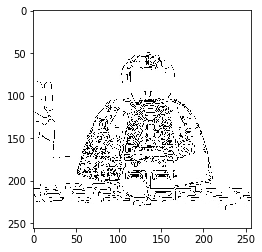

In [63]:
# print(X_realA_256[0][:,:,0].shape)
plt.imshow((X_realA_256[0]+1)/2.0)

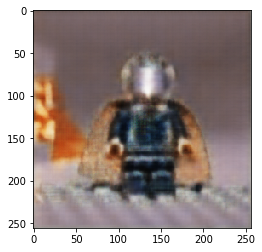

In [64]:
out = g_model.predict(X_realA_256)

plt.imshow((out[0]+1)/2.0)

In [65]:
discriminator.save_weights("./discriminator_weights.h5")